<a href="https://colab.research.google.com/github/forest416/3/blob/main/Copy_of_Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

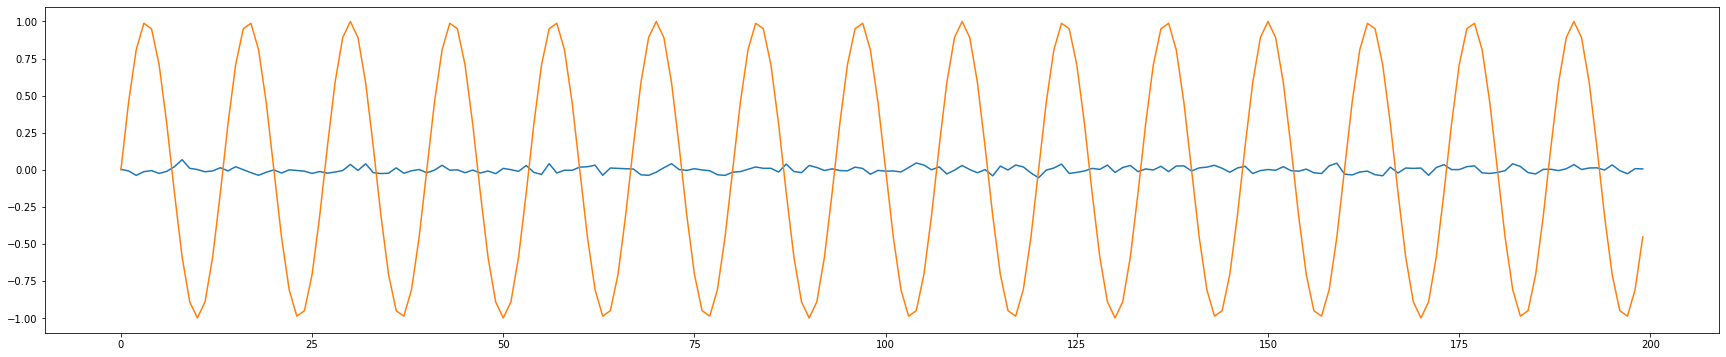

In [87]:
import numpy as np
import matplotlib.pyplot as plt 

siz = 200
cycles = 15
standardSine=np.zeros(siz)
#print(len(standardSine))
#print(standardSine)
standardSine[:]=np.sin(np.arange(len(standardSine)) * np.pi/siz*2*cycles)


sig = np.zeros((3,siz))
sig[0,:] = np.sin(np.arange(len(sig[0])) * np.pi/siz*2*cycles) 

rands = np.zeros((3,siz))
rands[0,:] = np.random.standard_normal(siz)/50
rands[1,:] = np.random.standard_normal(siz)
rands[2,:] = np.random.standard_normal(siz)

plt.plot(rands[0,:])
#print (rands)
#print (sig)
plt.plot(sig[0,:])


Show combine of sine and noise

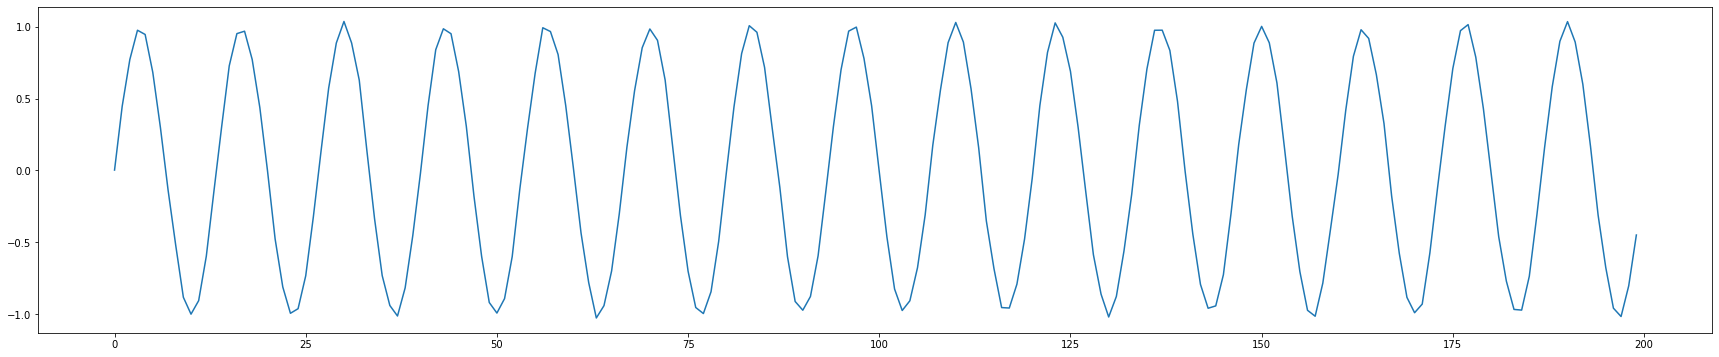

In [88]:
sig[0,:] = sig[0,:] + rands[0]
plt.plot(sig[0,:])

sig with std 0.3746349472871895
std with std 0.5000000000000001
HERE, ther are not the same!!


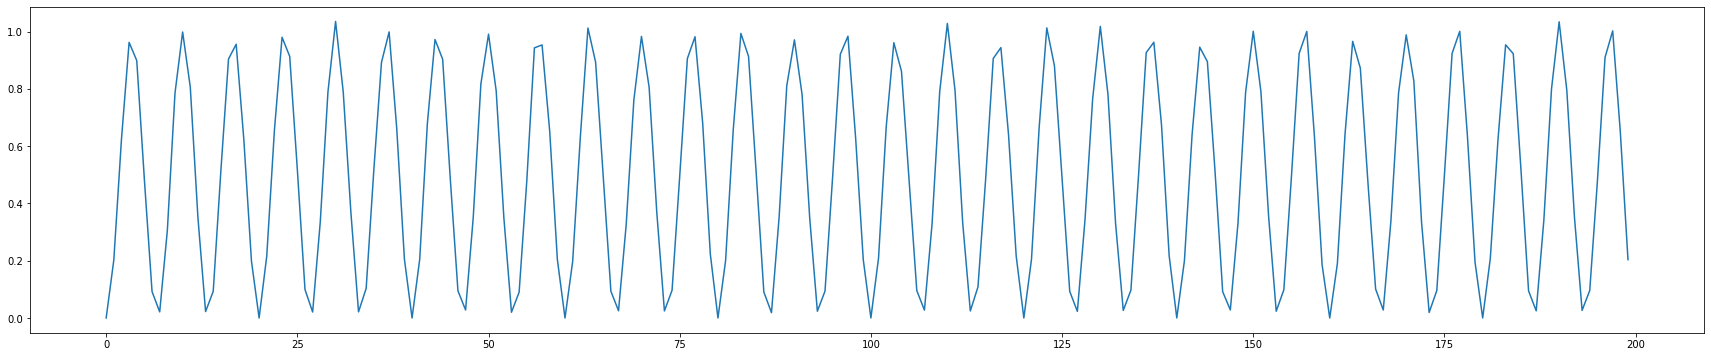

In [89]:
multi = np.multiply(standardSine , sig[0,:])
plt.plot(multi)
amp=np.dot(multi, multi)
print("sig with std", amp/siz)
print("std with std", np.dot(standardSine,standardSine)/siz)
print("HERE, ther are not the same!!")

Go by FFT way


[200]
(3476.497519305517-928.199890402166j) 8.99568995348606
199-201
(694.3750592409162-185.65385744704767j) 1.7969141564095281 -0.26125729994378233
(3476.497519305517-928.199890402166j) 8.99568995348606 -0.26090687077355634
(-1163.493177017908+310.1858016620474j) 3.0103276446675533 2.881053690623527
mag= 8.99568995348606 phase= -0.26090687077355634 ( (3476.497519305517-928.199890402166j) )
8.99568995348606 (3476.497519305517-928.199890402166j)
0.44917964458833176


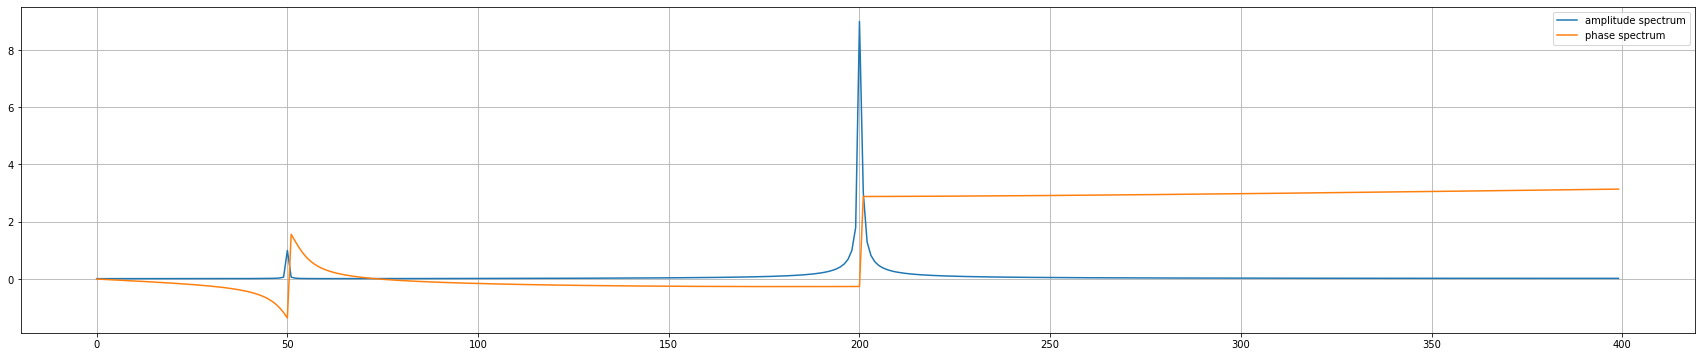

In [90]:
#ref URL:https://dsp.stackexchange.com/questions/72005/calculate-the-magnitude-and-phase-of-a-signal-at-a-particular-frequency-in-pytho

#number of sample points
N=siz
N=800
# sample spacing

T=1/cycles  # f=cycles
#
T=1.0/800.0 #f=800

x=np.linspace(0.0, N*T, N)
t0=np.pi/6
#t0=0
y1= np.sin(50* 2*np.pi *x) 
y2=10*np.sin(200*2*np.pi*x +t0)
y=y1+y2
#plt.plot( y1)

#yf=np.fft.fft(sig[0,:])
yf=np.fft.fft(y)

freq = np.fft.fftfreq(x.size, d=T)
index, = np.where(np.isclose(freq, 200, atol=1/(T*N)/2))
print(index)
mag=np.abs(yf[index[0]])
print(yf[index[0]], np.abs(yf[index[0]])*2/N)
print("199-201")
print(yf[199], np.abs(yf[199])*2/N, np.angle(yf[199]))
print(yf[200], np.abs(yf[200])*2/N, np.angle(yf[200]))
print(yf[201], np.abs(yf[201])*2/N, np.angle(yf[201]))
phase=np.angle(yf[index[0]], deg=False)
print("mag=", mag*2/N, "phase=", phase, "(",yf[index[0]],")")

print(np.abs(yf[200])*2/N, yf[200])
print(np.abs(173.627-46.213j)*2/N)
#plot
plt.plot(freq[0:N//2], 2/N*np.abs(yf[0:N//2]), label='amplitude spectrum')
plt.plot(freq[0:N//2], np.angle(yf[0:N//2]), label='phase spectrum')
plt.legend()
plt.grid()
plt.show()

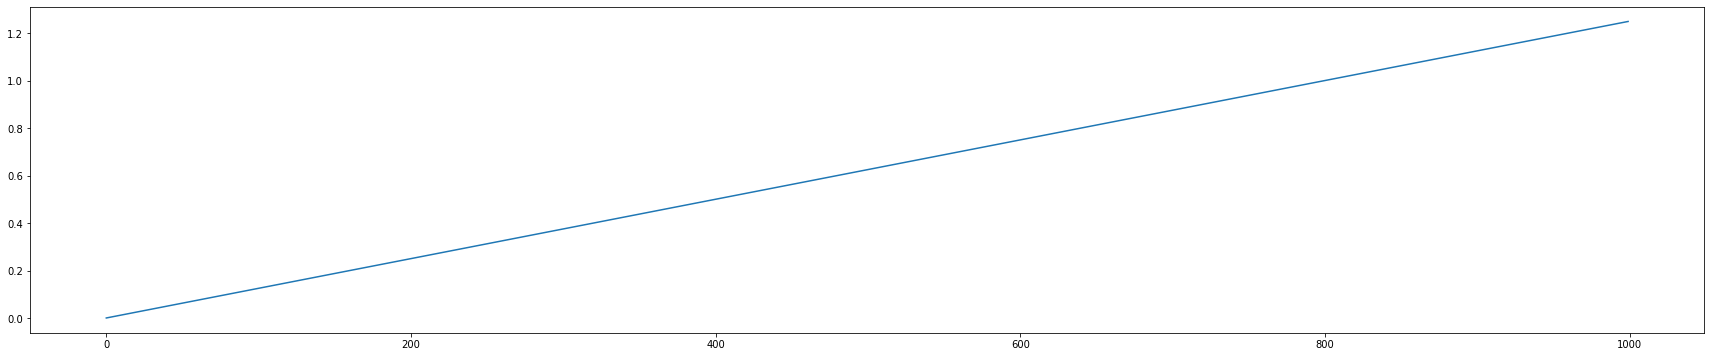

In [91]:
N=1000
T=1.0/800.0
x=np.linspace(0.0, N*T, N)
plt.plot(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


1.109976201754536 0.018791910815249783
1.0000153534618355 0.04739983832467618
1.8625242749878397 0.7797430000862197

1.0515212300764358 0.01888038302403921
0.9999176135777977 0.04448922613814041
1.3673386995735315 0.5417628835281986

1.0244915581474343 0.019060308462071705
0.9999319819503084 0.04315504434216302
1.1540281030825865 0.3360796282993417

1.0157437250072063 0.01924412947804615
0.999991106348247 0.04281460623928796
1.0946864061254318 0.24805053770861904

1.0113938403984088 0.01943174855169672
1.000061620759048 0.042719319593790134
1.0681035335184375 0.1998753150342815



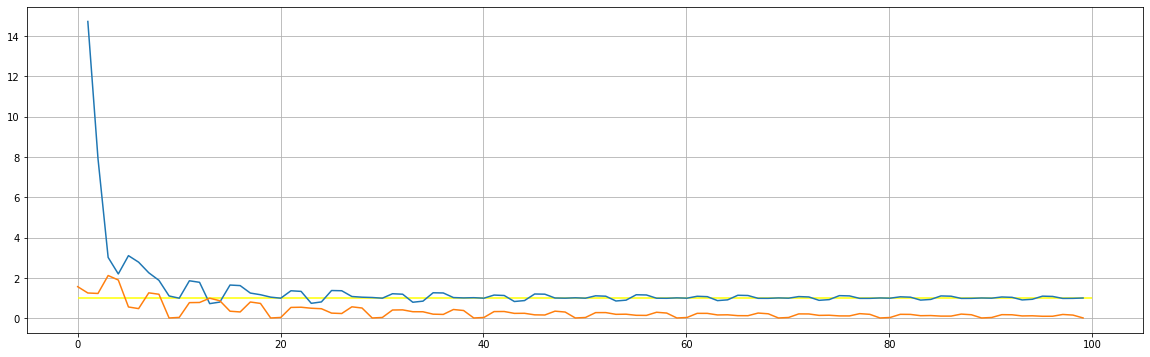

In [92]:
N=1000
x=np.linspace(0.0, 1, N)
f = 50
sig=np.sin(2*np.pi* x * f +.03 )  + 7*np.sin(2*np.pi* x * f/.2 )
pat = np.sin(2*np.pi *x *f) + np.cos(2*np.pi*x*f)*1j

clip=100
sigx = sig[:clip]
patx = pat[:clip]
mult = sig * pat
cs = np.cumsum(mult)
amp = np.abs(cs[:clip])*2/(x[:clip]*N)
ang = np.angle(cs[:clip])

plt.rcParams['figure.figsize'] = [20,6]
plt.plot(x[:clip]*N, amp)
plt.plot(x[:clip]*N, ang)
plt.hlines(y=1, xmin=0, xmax=clip,color='yellow')
plt.grid()
#print(sum, np.abs(sum)*2/clip, np.angle(sum))
# print( np.concatenate((x[:clip]*N//1,  (2*np.abs(cs[:clip])/(x[:clip]*N))),axis=0).reshape(2,clip).T)
for i in (10, 20,40,60,80):
  print(amp[i-1], ang[i-1])
  print(amp[i], ang[i])
  print(amp[i+1], ang[i+1])
  print()


using sig

49768


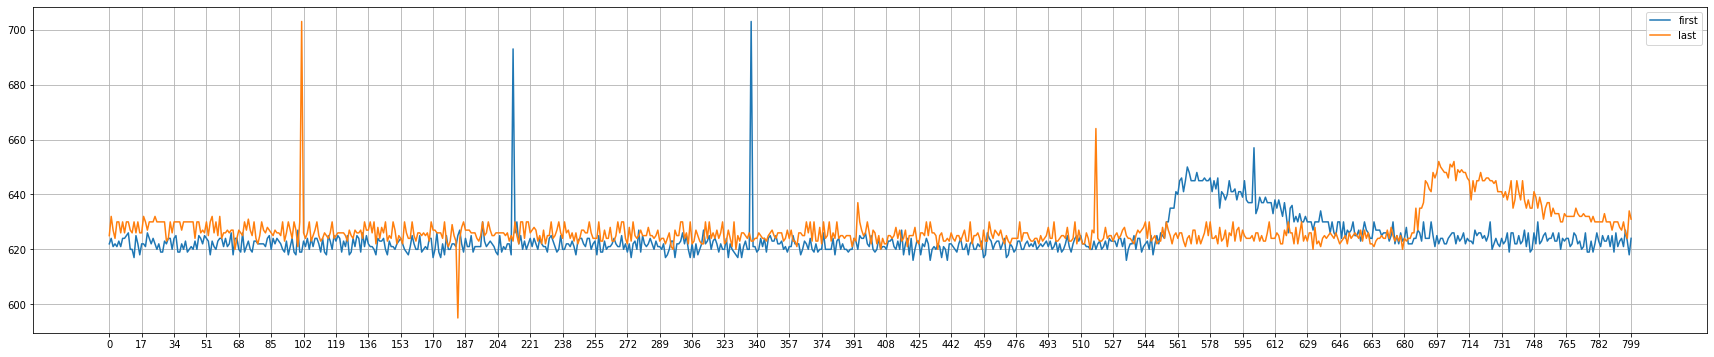

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# load sig data
sig=np.array([622,624,621,622,621,623,621,624,624,625,626,620,620,617,625,622,618,622,622,621,626,624,622,624,622,620,622,619,619,623,622,624,624,620,624,625,619,619,622,620,623,619,620,621,620,623,620,625,624,622,625,624,623,618,623,621,620,623,624,624,621,624,621,622,626,618,624,624,620,619,626,619,621,623,620,619,623,623,622,622,622,622,621,624,625,620,624,622,624,623,622,620,619,623,618,621,624,619,618,627,619,619,623,621,624,620,624,621,624,624,622,619,624,619,618,625,623,620,625,623,625,624,619,623,621,625,618,619,624,621,625,624,619,626,621,625,622,621,621,620,618,624,623,623,624,620,618,623,621,621,620,622,623,624,622,620,619,618,621,625,622,620,620,625,619,620,621,620,624,624,617,620,626,619,617,622,618,625,620,620,622,622,621,625,627,622,619,624,621,621,625,619,621,621,621,621,630,623,621,622,623,622,621,619,618,625,619,621,620,622,622,618,693,626,630,622,625,620,623,620,622,624,621,624,622,620,624,622,621,621,619,624,625,623,621,619,620,625,620,620,622,622,621,623,621,618,623,624,624,622,621,624,624,620,622,623,618,625,619,619,623,620,621,621,622,624,622,621,621,625,620,622,619,622,617,622,623,620,627,619,625,622,621,622,624,622,620,623,621,621,620,622,617,618,620,623,623,617,622,622,623,626,622,625,620,617,622,617,622,618,620,622,627,622,623,625,620,623,624,622,619,622,620,620,624,617,622,620,619,618,617,622,617,621,623,620,620,703,621,621,619,620,624,621,624,619,624,625,623,623,625,622,622,623,620,621,619,621,621,625,622,622,622,618,620,623,622,620,624,620,619,622,619,620,620,626,620,620,620,620,624,618,623,624,620,622,620,620,619,620,620,624,623,620,625,624,624,626,622,621,625,620,619,620,624,620,621,621,620,623,623,624,621,620,623,620,627,618,622,624,618,624,616,620,623,623,618,622,621,624,622,616,620,621,620,622,621,617,621,620,616,622,622,621,620,619,622,624,620,620,622,618,622,623,620,620,622,621,623,617,618,626,624,623,620,622,623,623,620,622,624,617,618,622,621,619,620,623,623,620,620,622,623,621,622,621,623,620,621,622,621,622,623,621,623,620,621,623,619,622,619,620,622,625,621,619,622,624,625,623,625,622,622,621,621,620,620,623,620,622,623,620,621,623,620,624,623,623,623,621,624,624,621,624,616,620,622,622,625,620,624,624,619,621,622,623,620,625,618,622,625,622,626,625,624,630,630,635,635,635,641,640,645,646,641,645,650,648,645,645,645,648,645,645,645,646,645,645,646,641,645,642,646,635,641,640,638,640,645,641,641,642,638,641,641,639,645,638,637,637,637,657,633,635,639,637,637,639,637,637,637,633,638,635,638,635,632,637,632,626,635,636,630,632,630,633,630,630,632,630,630,630,627,630,630,630,634,630,630,630,630,626,630,626,625,630,630,624,630,624,627,626,627,630,625,625,627,623,626,630,627,626,624,624,630,627,627,627,625,626,626,626,623,625,630,622,625,622,626,623,624,628,622,622,622,624,624,627,626,623,630,624,624,624,630,625,621,625,622,624,624,622,622,624,625,626,626,622,625,623,624,626,622,624,623,623,622,627,625,626,626,624,625,623,625,630,620,622,624,622,621,624,622,623,626,619,626,626,622,622,625,622,623,627,621,626,619,620,626,622,630,622,623,625,626,623,624,624,626,623,623,626,620,624,623,624,624,621,622,626,625,622,623,620,621,626,619,619,623,619,622,626,623,621,625,623,623,625,621,625,619,626,621,623,624,621,627,623,618,624,623,622,624,627,621,621,630,620,624,622,621,620,624,621,622,624,622,621,624,621,622,625,621,626,623,622,621,620,625,622,621,622,622,626,624,619,630,648,630,623,622,624,620,619,625,623,623,624,623,622,624,624,623,626,620,623,624,618,618,622,619,619,624,622,622,620,627,622,622,626,621,624,623,623,625,623,620,622,620,695,624,624,624,622,624,625,624,623,624,624,623,622,625,623,621,625,622,622,630,622,621,628,621,622,627,621,620,620,622,622,620,619,625,622,621,626,624,622,622,622,627,620,624,624,619,625,620,627,624,623,624,620,624,624,621,624,619,623,623,622,621,624,620,625,620,617,623,619,620,624,622,622,624,623,618,623,620,624,621,619,618,620,620,621,626,625,623,622,624,624,624,622,624,623,621,624,622,616,623,620,620,626,623,623,624,622,617,622,622,622,623,622,622,623,627,621,622,624,623,624,624,620,620,619,623,618,624,621,619,623,622,622,622,622,626,622,620,626,620,621,623,617,621,622,621,619,622,622,622,625,623,622,625,621,623,619,619,625,622,619,622,622,621,624,623,623,622,626,623,620,622,624,622,621,621,623,620,630,618,621,623,622,621,625,623,625,624,623,621,625,619,622,623,622,621,620,625,623,621,622,625,624,624,621,620,624,622,621,624,622,619,622,622,620,624,623,620,624,622,622,627,619,622,623,623,621,624,618,623,624,622,626,622,622,620,621,623,623,620,623,620,622,625,620,624,621,622,624,623,624,624,622,623,626,624,621,625,624,622,622,623,624,623,626,620,620,623,621,625,625,619,622,622,621,618,622,617,621,624,622,622,624,623,622,626,620,625,622,621,624,621,622,619,624,625,623,623,622,624,622,624,624,623,619,625,621,619,618,617,619,627,620,623,622,630,621,623,623,620,622,619,614,622,622,618,626,621,624,624,623,624,622,625,624,622,622,626,621,620,621,626,622,622,622,625,621,626,620,622,626,621,620,621,622,623,620,620,621,621,623,622,622,625,625,620,624,622,621,619,623,619,620,619,624,674,624,621,626,620,620,623,626,621,623,624,621,624,619,623,622,619,624,625,623,621,624,622,620,625,621,617,622,620,620,625,619,618,626,619,622,627,624,624,621,622,623,620,625,616,621,623,622,620,618,622,622,619,626,622,618,625,622,622,624,617,620,624,620,620,625,620,622,623,619,621,623,623,625,630,626,630,630,630,635,636,632,642,641,644,645,647,648,646,645,645,648,649,645,645,645,645,646,641,645,645,645,645,645,641,645,645,640,638,641,641,635,641,639,638,639,638,640,639,645,636,641,638,635,638,634,639,632,635,635,637,636,632,635,637,635,636,636,632,633,630,630,633,626,630,633,624,631,633,635,634,633,630,632,632,630,630,630,627,626,630,630,625,626,624,630,626,624,630,625,630,632,624,630,622,625,630,628,621,626,630,626,630,630,627,625,627,622,625,630,623,623,624,622,624,630,622,626,626,624,625,630,626,627,623,627,626,619,622,624,623,622,624,630,620,627,625,630,625,623,623,625,622,623,626,622,624,626,623,624,630,623,624,630,622,624,630,624,626,623,626,623,618,623,623,630,623,626,624,622,704,624,625,624,625,620,621,622,625,622,619,624,622,624,624,623,627,624,619,623,624,622,625,619,622,623,622,622,624,624,619,625,622,621,627,622,627,622,623,621,622,622,620,624,627,621,623,626,625,626,625,625,622,623,620,623,621,622,626,626,624,625,622,623,622,623,622,626,622,623,625,620,624,622,622,622,627,626,624,626,624,624,621,625,624,624,622,626,618,622,623,623,622,623,620,618,625,622,621,624,618,623,624,618,621,626,620,623,621,623,621,623,630,620,624,623,621,622,621,627,621,624,620,622,593,623,625,618,622,625,622,623,623,619,624,627,622,622,621,622,621,625,620,619,625,622,623,624,624,625,623,622,623,624,620,623,622,619,621,622,624,621,622,621,622,621,622,679,621,622,625,620,619,619,624,624,623,624,623,621,624,622,620,619,621,618,623,620,622,616,624,622,622,625,623,623,626,622,620,623,623,623,621,619,620,622,620,622,619,621,620,620,623,623,621,621,623,619,618,620,620,621,623,625,621,624,623,618,625,623,620,627,621,622,625,622,622,624,623,622,623,618,623,626,623,625,621,626,620,617,620,621,619,621,621,624,622,626,622,622,625,622,624,623,622,621,622,620,621,624,622,621,626,623,625,625,621,622,621,627,620,616,620,619,622,616,624,622,624,622,625,624,620,623,621,621,625,622,621,620,620,622,621,623,625,622,622,625,622,622,623,622,620,624,621,619,622,619,622,624,624,623,618,624,624,626,626,619,623,623,625,618,620,623,618,623,622,618,620,623,627,623,622,630,624,621,622,617,621,624,621,622,622,622,624,624,622,624,619,619,626,618,622,622,618,624,618,622,623,623,624,622,624,623,621,625,620,628,622,622,624,619,622,622,621,623,619,619,630,624,622,626,623,619,630,621,618,620,618,624,621,620,624,622,622,626,624,624,624,620,624,622,622,621,617,622,619,619,618,620,624,623,625,623,624,621,620,619,621,622,622,620,624,620,623,624,624,622,625,620,620,625,616,618,624,619,618,618,621,625,621,620,624,624,625,622,622,622,623,622,623,618,622,619,619,617,620,626,620,620,622,620,622,623,623,620,621,619,622,618,621,621,623,626,620,623,624,624,620,625,621,618,621,624,621,622,620,622,621,621,623,618,620,623,622,625,623,624,619,619,621,620,623,623,620,621,623,622,621,624,623,623,625,622,622,622,621,620,618,625,620,622,620,623,626,626,623,624,626,620,618,624,632,622,621,620,621,619,622,624,620,624,624,623,625,623,619,622,617,621,623,621,622,624,621,622,621,622,620,625,622,621,621,622,620,625,620,620,623,620,622,620,620,624,624,625,620,622,624,621,618,621,623,620,621,624,623,619,624,625,623,630,632,632,634,635,639,642,645,645,645,648,645,649,645,648,649,646,649,639,646,646,645,646,645,646,640,642,636,638,645,645,645,641,639,645,641,636,645,637,633,638,639,638,638,635,635,640,638,635,639,635,635,635,635,633,636,636,632,630,636,635,637,633,632,632,632,630,635,632,626,632,632,630,630,630,630,631,630,626,635,630,627,627,626,630,627,626,630,621,630,626,626,623,627,623,630,632,626,625,626,626,630,624,630,623,623,626,624,626,626,630,627,626,630,623,627,628,624,630,622,621,623,622,622,625,618,628,630,626,625,627,623,625,630,624,620,628,620,622,624,622,623,630,623,624,625,622,620,626,623,624,622,620,623,623,620,624,624,625,626,627,624,626,626,626,625,626,624,620,630,621,620,625,622,623,624,622,625,625,626,624,624,626,620,623,622,624,621,622,626,621,626,622,625,624,623,622,621,626,622,624,626,617,622,625,621,620,623,619,621,623,623,627,624,624,624,624,621,625,622,622,621,621,625,621,621,626,622,622,622,622,621,621,699,620,620,620,619,624,623,624,622,624,624,624,624,624,621,621,621,622,617,623,621,621,623,622,621,625,625,621,626,623,623,619,624,620,620,625,622,622,622,623,624,622,621,622,622,625,621,620,622,623,622,621,625,622,620,619,622,624,623,623,625,626,620,626,622,624,621,622,620,621,620,626,622,620,625,623,626,622,626,620,623,624,623,624,620,624,619,621,625,623,624,620,625,624,623,623,624,622,621,623,620,620,622,620,623,623,621,624,624,624,621,625,621,624,622,622,620,620,622,622,622,622,621,617,621,624,626,626,621,623,620,623,625,619,622,625,623,623,624,625,623,626,621,624,624,621,621,623,624,617,618,620,620,618,621,623,624,623,624,623,622,624,623,624,617,622,619,628,621,621,623,622,624,622,625,622,622,622,624,622,621,621,623,626,618,623,624,622,620,625,620,621,625,622,620,621,622,621,622,622,623,621,622,622,619,625,622,623,626,621,625,620,623,626,623,624,622,620,625,619,621,625,622,622,624,623,623,625,623,621,624,621,620,619,621,622,622,621,621,630,622,620,620,622,622,624,622,620,618,621,624,621,626,618,621,624,623,623,622,620,624,623,620,622,621,620,623,620,621,622,623,622,622,623,623,619,626,623,619,624,619,624,619,619,622,618,622,622,624,622,623,623,620,624,620,620,621,620,624,622,621,622,630,626,622,624,620,621,625,619,622,623,622,622,624,621,623,621,624,618,626,621,621,624,622,622,625,622,624,619,622,621,618,626,620,624,621,623,625,622,625,621,621,624,621,622,622,622,621,623,620,621,623,622,621,620,621,622,626,620,620,621,620,624,620,620,623,621,625,621,624,620,621,624,622,625,620,623,620,621,623,623,623,620,623,622,620,622,623,621,620,624,620,617,622,620,619,621,622,622,622,623,620,624,621,623,622,621,616,618,622,623,619,622,620,619,621,622,620,624,620,622,625,620,624,619,620,622,620,618,623,620,618,622,622,622,623,619,618,622,617,620,626,615,620,621,621,621,623,623,621,622,620,626,621,624,623,618,621,620,622,619,619,622,623,622,621,624,623,620,622,625,621,621,622,619,620,621,623,621,621,624,624,621,625,623,621,624,622,619,618,623,620,619,624,622,624,621,624,588,678,623,619,622,625,621,618,620,626,619,620,622,620,619,625,621,624,623,622,619,624,618,618,622,618,618,620,618,619,621,623,623,622,618,621,623,622,625,625,627,627,630,626,600,635,645,645,645,645,646,645,648,645,646,641,645,641,645,645,645,645,645,645,644,648,641,645,645,645,645,645,637,638,642,641,637,645,637,637,639,645,639,637,641,632,636,635,633,633,637,635,636,635,636,639,635,635,636,635,635,637,635,634,632,630,627,633,630,630,633,630,633,633,632,630,630,627,630,630,627,625,630,626,628,630,670,632,627,626,630,627,626,630,628,626,630,627,626,624,625,622,626,627,624,627,626,626,627,626,623,624,630,623,622,624,625,626,627,624,625,630,626,623,626,625,626,621,630,618,627,620,622,625,624,625,622,623,630,625,623,630,625,625,628,624,622,625,624,624,624,624,623,623,624,626,627,623,625,627,624,623,624,619,626,625,624,624,623,630,621,627,625,623,626,623,622,625,624,624,624,621,622,626,622,620,624,620,620,624,625,621,627,623,619,619,622,623,623,626,622,622,626,623,626,619,625,625,620,623,631,624,622,621,620,626,622,623,626,625,625,625,620,625,626,621,623,622,621,618,621,621,621,626,620,624,627,619,623,626,623,623,626,619,622,625,619,626,621,625,624,624,626,620,620,624,624,623,622,624,624,622,621,625,620,624,622,624,624,624,620,624,627,623,626,624,620,624,622,622,622,621,622,624,624,623,623,624,620,625,621,621,621,621,622,621,624,622,621,624,620,622,620,624,622,625,624,623,622,625,625,622,625,621,626,624,623,619,622,622,623,621,622,623,622,619,623,618,623,624,623,621,622,620,624,620,625,622,625,619,619,619,621,624,619,621,624,622,624,624,621,624,626,622,622,623,622,617,620,621,618,626,623,622,620,622,622,619,626,624,621,624,622,624,624,620,626,618,623,622,622,620,625,622,624,623,620,623,621,624,620,619,624,622,619,625,623,619,621,622,621,622,621,625,626,622,623,617,621,625,618,621,625,625,624,623,620,620,622,619,618,588,620,622,622,626,618,623,623,623,622,620,626,624,622,627,619,621,626,620,620,623,621,619,624,618,623,625,621,625,622,623,622,622,622,619,621,620,621,621,622,621,622,627,622,622,624,625,624,620,623,621,621,621,624,619,620,623,619,619,626,625,620,624,622,621,624,621,620,621,621,620,624,624,618,619,620,624,623,623,623,624,621,619,626,619,616,624,618,621,620,621,623,622,624,619,624,624,621,626,620,618,622,621,619,623,621,619,622,623,622,621,623,618,626,618,618,622,620,622,620,623,622,622,622,620,622,619,622,623,619,620,623,621,620,620,622,616,622,622,620,624,619,624,619,619,622,619,618,624,622,616,624,620,624,620,624,622,622,625,623,623,624,621,626,619,623,620,624,620,619,621,622,622,622,625,623,625,624,624,624,618,620,619,622,622,617,622,621,620,621,625,622,620,626,618,622,623,622,624,622,623,617,623,622,621,620,621,622,622,624,622,621,624,624,623,621,621,624,620,622,624,620,623,626,620,621,625,619,621,623,619,620,622,620,623,624,620,623,623,623,621,625,624,626,621,624,618,622,620,666,620,624,623,622,623,619,625,621,623,626,619,622,625,620,624,620,620,622,621,621,625,623,623,626,622,622,623,621,622,621,620,621,623,619,623,619,623,622,620,624,620,622,622,622,624,619,616,620,624,619,622,625,623,622,630,621,624,625,620,622,624,619,619,623,620,624,622,619,623,620,622,625,618,625,623,618,622,619,621,620,621,622,672,622,619,619,620,624,620,624,618,618,620,618,619,624,620,619,623,622,625,623,624,628,632,630,630,635,635,639,641,641,645,646,648,650,645,649,646,648,645,645,644,642,689,641,645,645,645,641,645,637,641,640,645,645,638,645,641,639,646,638,635,634,637,636,641,637,637,641,641,633,641,638,638,636,637,632,633,635,635,630,636,634,633,636,632,633,632,636,630,635,630,631,630,630,632,630,630,635,630,630,635,628,630,632,630,632,630,626,630,630,625,626,625,626,624,626,627,625,632,630,630,628,623,626,625,707,624,625,630,621,626,626,630,626,627,625,623,625,627,625,623,626,626,621,626,623,620,623,624,624,630,626,622,624,627,623,623,620,620,624,622,622,620,627,620,621,630,621,626,624,625,628,622,620,626,623,622,621,621,621,621,624,623,625,622,623,627,624,620,620,621,623,622,623,624,622,624,626,627,625,624,624,624,623,622,625,620,623,622,620,625,624,623,626,624,624,622,624,625,622,622,622,624,622,622,622,623,622,624,627,623,624,623,624,623,624,625,624,620,622,621,624,619,620,624,621,624,621,622,622,622,626,622,621,622,618,622,621,626,619,621,624,620,624,624,624,624,625,624,620,625,626,623,625,619,624,625,626,625,624,624,624,622,622,624,623,623,620,621,621,626,619,695,625,620,625,624,622,623,626,623,622,624,623,623,624,620,621,621,622,620,622,623,620,623,619,618,622,623,624,621,619,621,623,622,619,623,622,624,623,625,624,623,626,619,622,617,623,623,621,619,624,621,621,620,622,624,622,620,621,620,626,621,620,620,620,622,624,619,622,625,622,623,625,623,622,625,622,620,621,622,624,622,622,624,619,624,623,621,625,624,620,621,626,621,622,623,618,620,623,618,624,622,622,624,623,622,622,620,623,622,624,620,621,624,620,620,624,620,623,623,622,624,620,620,620,622,623,621,625,618,622,624,619,622,622,624,624,624,621,623,622,622,624,621,621,622,618,618,622,620,620,623,625,620,622,622,623,622,620,624,624,620,621,616,623,622,620,625,622,623,624,618,624,620,624,619,621,620,620,620,622,622,624,620,623,621,623,623,626,621,622,622,620,621,624,622,623,624,619,625,628,619,621,623,623,621,621,620,620,621,620,623,620,627,624,625,624,625,626,621,622,621,618,624,617,620,623,621,622,623,624,620,620,623,621,623,620,623,622,623,622,619,622,619,623,619,624,620,623,620,622,623,622,623,620,622,622,621,623,619,624,623,622,620,622,624,622,623,624,619,622,620,623,621,621,623,624,625,618,623,620,623,623,624,623,622,626,620,623,621,624,622,620,623,620,622,619,621,623,622,624,623,619,623,625,621,621,622,620,620,624,619,622,622,622,620,623,622,621,623,622,622,623,620,621,619,619,619,620,621,626,624,621,624,623,624,620,621,623,620,622,621,623,621,623,621,622,622,624,623,624,623,620,622,623,620,620,622,622,619,624,620,625,622,620,625,620,620,622,620,622,622,620,622,624,622,624,620,619,623,622,623,625,625,623,624,621,622,620,624,624,621,623,623,625,621,624,620,622,625,622,619,621,617,621,620,621,623,621,627,617,621,623,623,624,623,619,622,620,620,618,620,622,620,619,622,622,619,624,626,622,623,624,622,619,630,621,620,625,620,619,623,622,621,623,622,622,624,624,623,624,619,620,620,618,623,620,621,624,624,624,622,622,624,621,620,624,624,620,622,624,620,621,624,623,623,624,624,623,624,622,619,620,622,618,619,623,618,620,622,620,624,621,625,624,621,624,620,621,622,619,623,620,624,623,623,625,632,626,635,634,641,645,645,641,645,645,648,646,645,640,649,641,646,646,645,645,646,645,645,642,645,645,645,639,645,641,641,637,639,640,638,641,641,640,641,638,641,638,635,636,636,637,636,639,637,636,639,636,636,640,635,637,632,636,636,633,633,635,633,632,632,632,630,633,632,632,635,632,632,628,630,630,630,632,626,632,630,627,632,626,630,630,630,630,625,624,630,630,623,628,623,623,625,624,624,627,627,630,630,626,630,625,632,626,624,624,626,625,629,626,624,626,626,628,622,630,621,624,622,624,625,622,630,624,623,624,625,620,626,624,624,626,624,624,623,624,623,625,624,624,624,621,624,630,625,624,630,624,625,628,625,624,626,623,623,622,621,622,622,628,622,621,625,621,623,625,623,627,624,622,626,619,621,625,623,622,624,624,624,628,622,623,625,623,626,625,618,620,623,623,620,624,621,630,623,626,620,622,625,622,622,624,621,624,621,621,622,625,621,624,623,622,623,624,622,623,620,620,622,622,619,624,622,621,624,622,622,624,622,620,624,621,621,623,620,623,622,625,622,619,626,620,625,623,619,622,623,624,620,622,624,622,619,623,618,619,630,622,622,624,621,626,622,623,625,621,620,622,619,619,622,621,622,620,623,623,620,625,623,626,624,622,623,622,624,619,621,626,621,626,620,624,624,622,621,623,623,623,623,622,619,621,618,622,620,623,622,621,623,626,627,622,621,623,620,621,623,621,621,622,622,621,621,623,624,624,623,621,624,619,624,623,621,619,625,623,620,625,620,626,623,622,621,621,623,623,623,621,620,624,620,621,621,621,621,624,621,623,620,622,623,621,619,620,620,624,620,626,619,622,625,619,621,620,621,624,621,621,621,623,622,622,619,621,623,619,621,621,618,621,624,622,623,626,620,622,626,618,619,624,620,622,621,622,621,624,620,623,621,622,620,620,622,620,622,623,622,625,620,624,627,622,622,624,619,620,623,621,622,620,620,623,621,623,620,624,621,623,625,624,621,622,626,619,625,621,620,624,620,620,622,621,623,623,622,621,625,621,623,622,621,625,620,619,623,620,620,622,620,620,624,622,623,623,621,621,622,623,619,624,618,622,619,623,626,624,624,623,621,627,623,620,617,619,622,621,619,621,623,624,622,624,619,623,624,622,620,623,621,624,618,621,622,620,619,621,620,618,624,624,623,622,625,623,622,623,622,622,617,619,621,620,624,622,621,621,620,623,627,622,619,619,619,624,621,622,623,620,624,624,619,630,623,622,625,622,620,622,621,622,625,620,623,622,622,621,624,622,625,622,623,623,621,622,618,625,624,622,624,620,619,620,620,622,620,625,623,625,627,619,621,625,620,622,622,621,621,620,621,622,624,621,623,620,621,630,618,623,621,614,622,621,622,621,622,621,618,622,623,624,622,621,626,623,623,623,623,621,624,620,620,618,621,621,618,622,621,624,617,624,622,619,620,622,620,622,622,620,622,626,618,625,623,625,621,619,620,620,622,622,620,626,622,621,625,624,620,619,621,622,619,623,625,622,622,625,617,620,630,622,618,622,620,623,625,621,622,625,621,624,620,623,619,620,622,621,622,624,620,662,622,621,619,623,622,620,622,621,619,618,619,625,619,624,627,622,622,623,625,622,625,622,619,623,620,622,622,620,622,622,624,623,626,623,619,626,622,623,622,620,621,620,625,621,617,625,624,621,623,622,626,622,618,624,621,617,620,619,620,622,620,623,623,619,623,625,621,622,626,624,620,626,630,630,630,635,632,638,641,640,644,645,648,646,651,645,646,645,648,646,645,645,645,639,645,641,645,645,645,641,641,641,641,645,641,638,639,637,633,640,641,636,640,641,633,637,638,639,636,638,635,638,636,635,638,636,639,635,632,641,636,637,636,635,638,632,635,635,630,632,633,630,632,630,627,630,635,632,635,634,630,630,630,630,630,630,630,626,630,628,630,632,627,651,626,632,626,630,625,624,630,625,626,623,625,626,624,627,626,626,630,630,622,625,627,621,621,627,623,626,630,630,626,626,625,625,624,627,626,626,625,622,625,622,630,623,623,630,624,624,625,625,627,626,630,626,625,630,623,626,623,623,625,620,626,630,625,621,630,626,624,627,623,624,624,625,624,622,619,624,625,623,626,625,626,622,624,622,621,626,622,623,622,620,622,622,624,619,622,630,623,623,627,624,619,625,622,622,624,624,622,623,626,625,623,626,624,623,625,624,626,623,624,625,619,624,622,619,620,624,623,627,625,623,626,624,623,621,626,624,622,622,622,620,622,624,625,625,625,626,621,630,624,621,622,619,620,625,622,618,626,621,623,625,624,624,625,623,624,622,624,620,619,620,621,622,621,624,622,628,621,623,624,622,622,624,622,620,625,622,620,619,621,623,624,624,625,622,622,622,622,625,622,623,619,622,623,619,625,624,626,621,622,625,631,626,625,623,623,626,623,622,624,620,621,623,619,620,623,622,623,623,621,621,624,621,622,624,624,619,622,622,622,623,621,623,624,623,622,622,621,627,618,622,619,620,621,620,622,622,620,627,621,624,623,625,627,622,617,622,621,622,623,623,621,623,621,621,625,624,621,624,622,619,623,621,620,618,620,618,620,620,624,619,623,623,622,626,620,628,620,619,622,619,620,619,622,621,623,620,625,621,621,622,620,621,623,624,620,623,620,620,622,622,620,621,624,623,622,621,630,627,623,626,622,623,621,620,622,652,621,619,627,622,623,625,624,624,621,624,623,621,621,623,621,623,623,623,622,626,624,627,620,620,622,622,623,622,621,622,623,622,623,624,621,625,622,626,623,619,623,618,623,622,621,623,621,620,620,620,622,619,623,621,622,622,622,620,622,618,622,625,622,621,620,621,623,627,623,622,623,630,622,623,621,617,621,621,621,620,619,622,622,618,622,624,623,620,624,624,626,624,623,624,618,617,625,621,619,624,622,620,620,622,623,622,623,620,621,622,619,619,621,619,625,623,622,621,622,624,621,622,622,622,621,620,623,618,620,624,617,624,618,619,625,623,623,622,621,620,624,621,623,621,622,622,624,623,620,624,622,624,622,621,622,621,622,624,620,622,622,624,624,619,618,627,620,624,622,622,621,619,621,624,623,623,620,624,623,623,626,618,624,626,624,620,620,623,619,622,620,620,620,621,620,620,622,622,624,626,621,624,620,622,622,619,618,622,620,624,622,619,625,618,626,622,622,622,620,619,624,623,621,623,620,623,623,621,624,626,622,618,620,621,621,623,621,626,619,624,622,620,622,622,623,625,623,623,624,622,624,623,622,626,621,622,624,621,621,624,624,620,623,622,623,624,624,619,625,622,620,625,620,621,622,620,621,624,623,624,624,620,620,623,622,621,620,622,620,624,622,618,618,621,619,623,623,619,622,626,622,621,620,621,625,622,622,622,620,622,621,623,623,622,626,623,623,625,621,622,623,621,618,624,620,620,620,626,623,624,622,621,622,626,620,624,622,623,620,626,620,623,619,620,622,622,623,623,622,626,630,627,632,635,632,635,645,645,645,644,648,648,650,645,648,648,645,646,645,650,641,645,642,645,645,638,645,645,641,646,636,639,645,638,637,641,636,639,639,640,639,638,639,641,637,641,641,637,633,640,636,638,633,635,638,636,635,637,633,636,635,635,637,630,631,632,630,632,630,630,632,632,630,635,630,630,630,630,630,630,630,632,630,626,624,630,630,627,626,626,625,630,627,630,625,630,626,630,625,624,630,625,624,626,627,627,625,627,626,626,623,630,630,627,623,630,625,626,627,624,622,621,627,626,625,627,625,630,624,626,622,623,623,624,625,619,627,622,625,626,623,626,626,624,625,622,622,624,622,626,620,627,621,623,626,622,627,625,619,626,622,626,630,624,626,626,623,622,625,622,623,627,624,623,625,622,621,623,625,622,624,625,618,621,625,621,621,625,621,627,626,621,620,623,623,623,624,622,626,622,621,623,619,621,622,623,620,623,623,624,625,625,619,623,624,624,625,623,622,626,623,624,623,626,623,620,627,620,627,624,623,624,619,626,622,622,626,621,622,624,624,624,623,626,624,623,624,620,618,619,624,620,621,624,621,623,623,623,624,626,623,623,625,623,622,624,623,618,626,620,623,623,622,624,620,620,625,620,623,622,620,621,620,620,626,621,620,625,623,622,624,624,618,626,622,622,621,621,620,624,621,621,624,621,623,625,623,618,622,617,623,623,621,622,624,622,621,623,619,619,623,621,625,621,626,623,621,626,623,622,622,623,621,622,621,621,624,621,625,622,624,625,622,622,624,619,620,625,618,620,623,622,625,621,623,621,622,624,620,626,622,621,620,621,622,623,625,622,620,624,625,623,625,623,622,624,623,617,624,622,621,622,621,620,623,621,621,623,623,624,627,625,622,623,619,624,618,622,621,622,620,620,621,623,624,623,625,618,620,624,622,622,624,619,619,625,622,623,623,622,621,627,624,617,623,621,621,620,620,618,624,623,620,620,619,621,622,624,618,624,623,672,622,619,621,619,616,620,622,624,622,621,624,621,622,623,620,620,623,624,619,618,619,624,619,620,625,619,621,626,624,624,622,624,620,620,622,621,623,620,622,624,621,627,621,624,622,623,622,620,624,616,621,619,618,626,620,617,622,622,622,625,622,621,623,622,622,623,622,619,621,626,621,619,623,622,622,626,623,622,625,619,651,619,623,621,620,619,625,622,625,623,621,624,622,623,627,618,621,624,620,623,617,619,622,623,623,626,622,624,625,622,620,623,621,621,622,620,622,620,625,620,624,620,624,626,624,625,622,620,624,621,621,624,620,620,625,620,620,624,620,622,627,621,624,624,621,624,622,618,618,622,621,617,622,621,622,622,623,624,621,627,618,627,622,622,620,617,619,626,620,620,623,622,621,623,624,622,622,622,620,619,621,619,620,624,620,621,625,623,622,623,622,621,622,623,622,621,623,621,623,619,619,624,620,626,623,621,624,624,623,620,620,619,620,620,624,623,620,626,621,625,624,621,623,622,623,622,622,620,618,621,625,616,620,624,623,623,625,620,626,622,622,623,620,623,619,622,619,620,620,620,625,620,623,625,623,625,623,622,620,619,620,621,619,621,619,620,623,622,623,622,621,625,625,623,620,622,622,622,617,622,619,620,621,622,625,621,625,622,623,620,618,621,622,619,622,623,624,622,622,624,622,622,625,623,623,622,624,620,624,620,618,625,620,622,624,622,622,624,623,626,624,620,622,621,621,623,618,622,621,630,622,627,630,630,635,636,635,642,639,637,645,645,645,645,648,645,645,652,645,645,649,645,645,645,645,645,644,648,637,645,641,641,645,641,641,645,641,640,641,641,641,638,637,646,639,638,636,652,637,639,635,641,638,636,639,637,636,639,632,632,635,630,632,633,630,630,633,631,635,632,632,630,632,632,632,632,632,630,632,630,630,627,627,626,627,630,661,628,626,630,631,626,623,620,630,630,625,630,623,624,626,627,624,627,622,625,630,626,626,627,624,624,630,621,624,626,624,626,626,623,626,625,625,627,621,624,626,624,625,622,624,630,624,625,626,630,625,624,626,625,624,627,625,624,625,623,623,624,622,626,627,625,623,624,625,624,624,624,622,623,625,623,624,618,625,622,624,624,625,621,624,626,619,627,620,624,625,626,622,620,627,622,623,626,623,622,630,622,620,625,620,621,625,623,625,624,622,622,622,627,623,625,625,623,624,623,625,622,621,624,622,626,620,625,625,625,625,628,622,626,620,626,622,622,624,622,621,624,621,626,624,625,625,624,622,626,624,622,620,620,621,621,625,622,620,624,621,626,627,625,624,622,623,624,620,626,618,620,623,624,620,624,622,624,623,623,625,624,621,626,620,621,625,620,622,623,621,626,627,625,623,625,620,618,626,623,619,626,621,622,624,623,621,625,626,621,626,619,623,620,625,627,622,621,624,625,624,626,619,620,626,622,622,620,622,620,623,622,620,624,622,622,620,620,618,625,620,622,623,617,620,624,620,623,626,621,623,622,619,621,619,619,621,623,624,624,622,626,623,620,622,618,621,625,623,617,620,622,619,625,622,620,627,623,622,625,620,618,624,623,620,624,623,623,623,621,624,622,661,624,623,622,624,622,621,623,623,619,621,623,620,621,624,621,622,625,620,622,622,620,620,623,621,621,624,620,622,622,623,623,625,623,621,619,622,626,620,635,622,624,620,622,621,619,624,622,624,622,624,624,623,622,624,618,622,624,619,622,622,621,621,619,626,621,621,623,620,624,625,620,622,620,620,621,619,622,619,622,620,624,622,626,624,626,620,623,617,620,623,621,619,623,619,623,624,620,621,624,624,624,626,619,623,624,622,621,622,622,621,623,623,624,622,623,622,626,619,624,620,627,620,619,623,620,623,621,621,624,623,622,625,623,622,622,620,623,625,622,621,623,620,620,625,618,621,622,622,622,622,621,621,625,619,620,621,621,622,624,622,619,620,623,622,622,626,620,620,622,620,623,621,621,622,619,622,623,623,624,626,621,624,620,624,624,620,622,619,617,624,616,619,622,623,623,624,623,623,626,620,622,621,620,624,621,620,622,623,628,622,622,623,623,621,622,624,620,621,622,618,620,626,618,617,625,622,620,625,622,622,625,621,622,625,622,622,624,618,619,622,621,618,620,621,625,620,619,624,624,622,620,625,620,618,621,621,622,620,624,625,622,621,625,622,621,623,620,617,624,621,620,624,621,623,622,621,622,625,620,624,625,620,620,625,620,624,620,622,620,621,623,622,627,622,621,625,620,619,622,626,620,621,620,621,624,621,620,625,624,620,621,623,622,621,625,620,622,624,622,618,624,620,621,624,619,622,621,621,622,621,623,624,622,621,616,619,623,619,624,624,625,623,621,623,624,621,626,624,622,624,621,622,625,620,619,621,621,622,624,624,620,625,618,622,625,620,620,624,622,625,620,620,624,622,625,624,625,620,619,630,619,620,623,619,620,620,620,621,624,621,626,621,620,625,624,619,626,624,626,630,632,632,638,645,639,646,645,646,650,648,649,648,649,645,646,647,646,648,644,645,645,641,645,645,646,645,645,645,641,639,639,639,645,638,637,641,641,636,640,639,639,641,635,635,641,635,635,636,636,636,639,635,638,635,637,635,635,636,635,636,630,627,626,630,627,632,630,626,647,630,625,633,632,630,630,626,626,630,628,629,632,626,623,630,625,630,626,627,625,630,630,626,630,627,625,627,627,621,630,644,626,624,624,630,630,627,630,630,624,624,630,627,624,627,624,623,625,625,626,630,623,626,626,626,623,624,627,623,626,623,625,622,619,622,624,627,625,630,626,625,626,626,624,621,622,627,625,619,622,626,624,623,626,625,625,626,625,625,624,619,621,623,622,625,621,624,621,622,624,626,625,624,630,626,624,627,622,626,622,626,619,622,630,624,630,623,622,627,628,626,624,623,623,623,623,625,622,624,626,620,621,627,622,622,625,623,619,623,624,623,621,624,624,624,620,621,625,623,628,622,626,623,621,624,674,623,620,621,624,621,618,624,622,619,624,622,623,623,624,623,625,619,619,625,618,620,625,618,622,622,622,624,624,622,622,624,624,623,622,620,621,623,623,619,626,623,619,624,624,622,625,622,623,625,623,621,624,623,623,622,624,617,623,624,619,621,625,622,622,623,619,622,621,621,621,624,621,624,624,622,622,625,619,625,618,624,626,622,622,622,620,624,621,622,619,624,618,624,624,624,625,620,621,624,619,618,624,622,622,622,622,623,622,621,621,622,625,623,622,621,621,621,619,623,620,623,622,621,626,625,622,626,621,624,618,624,623,623,620,624,621,624,625,623,625,622,624,622,624,624,620,623,618,618,619,621,619,621,619,623,622,624,620,623,620,623,620,623,622,620,625,624,625,622,622,625,620,624,624,621,622,621,620,624,620,622,620,622,618,619,623,621,620,624,624,621,626,623,616,620,623,621,624,621,621,623,621,621,622,625,620,622,627,620,622,622,620,622,620,622,621,619,620,624,622,621,623,623,624,623,624,625,617,619,625,618,618,620,624,620,621,622,622,623,622,622,622,620,622,620,619,624,619,620,619,624,623,622,622,623,621,622,623,623,623,623,620,625,622,623,619,623,619,619,623,622,623,623,622,621,625,620,620,624,617,623,619,620,624,622,623,623,623,622,624,622,620,622,620,620,623,621,619,624,624,624,624,623,619,621,625,623,621,622,622,621,626,619,622,620,623,624,619,622,622,623,621,624,624,620,625,620,624,619,621,618,621,620,620,623,621,622,624,624,622,622,621,622,620,623,621,623,620,620,621,620,623,624,620,619,620,621,621,622,623,621,617,621,624,624,624,620,622,623,623,622,622,620,591,619,620,622,622,623,620,623,620,622,622,622,624,620,622,622,620,619,621,620,620,623,620,620,624,623,619,624,621,619,624,620,621,621,618,620,622,620,622,622,624,626,621,621,621,625,624,620,622,620,626,621,623,623,621,624,622,619,623,622,624,621,622,621,621,621,619,620,625,619,618,621,621,622,622,622,622,623,624,622,622,625,620,622,619,620,624,624,620,619,620,619,623,622,625,625,622,621,624,616,622,623,619,619,622,617,622,624,622,623,624,624,626,620,622,622,620,621,622,623,622,623,618,624,623,625,625,621,624,621,622,624,622,624,623,622,621,621,623,622,624,622,622,620,623,622,620,623,621,621,624,620,622,620,620,624,621,625,620,621,626,620,624,623,621,620,621,621,640,624,624,621,626,626,626,630,632,630,633,636,638,641,645,641,649,644,645,648,645,646,650,648,641,646,645,645,645,645,639,645,642,645,641,641,645,645,645,645,644,639,642,606,639,635,636,645,637,636,641,639,638,638,635,641,636,636,641,633,637,636,636,632,635,633,635,636,635,637,632,636,630,630,632,630,630,630,633,630,630,629,628,630,626,630,626,630,627,630,627,630,626,625,630,630,624,625,627,627,630,625,622,630,626,625,627,623,624,627,626,627,628,626,624,627,626,625,627,626,626,630,628,626,622,627,624,627,623,630,623,626,628,627,627,623,626,624,621,627,630,627,622,626,627,624,624,625,622,622,625,625,624,626,624,622,627,624,624,625,624,626,624,630,625,626,630,621,625,627,620,626,626,622,623,624,622,623,621,620,626,627,622,625,625,626,630,626,621,625,622,624,622,622,624,620,621,622,623,625,625,625,626,626,624,624,625,621,625,621,623,623,624,630,622,623,622,625,625,625,623,624,626,621,623,624,624,620,624,623,621,623,626,622,623,625,621,622,623,622,619,624,624,622,625,622,625,619,621,626,626,622,624,621,625,624,619,622,620,622,624,619,622,624,623,624,625,624,623,627,622,620,626,620,622,624,620,620,623,620,621,624,622,624,623,624,621,622,621,623,624,620,675,623,620,624,622,620,622,626,625,619,624,618,622,625,622,620,621,623,619,627,623,622,623,620,623,625,624,625,621,622,623,622,623,619,623,625,623,624,622,624,620,623,622,588,626,623,624,625,622,622,616,621,623,621,623,625,621,622,621,622,622,624,619,624,625,623,618,621,620,625,628,622,620,625,624,624,622,621,619,622,622,624,624,625,622,625,620,621,620,630,622,623,621,621,625,622,620,622,619,621,624,617,625,623,624,623,621,620,622,620,620,621,621,622,623,622,617,623,619,626,624,623,625,623,624,618,625,621,620,625,620,623,623,630,621,624,623,624,623,626,622,619,620,621,620,624,621,619,624,622,620,621,624,622,620,621,621,624,624,624,624,620,623,622,618,624,619,620,620,625,624,624,622,621,622,618,622,623,622,619,624,622,622,624,623,621,625,622,624,623,622,623,618,627,620,621,620,620,618,621,622,621,625,622,623,623,620,620,621,618,620,621,623,622,620,622,623,624,622,620,621,622,624,621,621,622,622,619,624,624,622,623,618,623,626,620,621,623,623,623,624,620,621,626,619,625,625,624,624,622,624,626,619,621,622,618,624,621,622,621,620,622,624,621,624,623,622,624,623,623,624,624,624,624,621,621,623,617,621,626,624,621,626,623,620,625,625,623,622,621,624,623,625,621,621,626,620,619,623,625,624,624,623,623,619,619,622,622,622,621,622,624,624,619,620,624,619,626,625,621,624,621,624,621,625,618,623,618,627,619,622,621,622,622,622,625,622,619,623,620,624,621,620,623,622,623,624,623,622,625,624,622,620,621,619,622,622,620,620,622,620,622,623,622,622,622,623,624,620,621,622,622,620,619,620,674,622,620,618,621,622,622,622,622,623,621,624,625,617,626,622,620,624,621,620,623,623,622,621,622,622,622,622,620,621,623,621,622,619,622,624,621,621,623,625,623,623,621,620,622,622,625,620,622,620,623,626,620,623,623,617,622,622,622,621,622,622,620,622,625,620,620,626,620,621,625,623,619,620,620,622,624,622,624,622,623,620,618,624,618,624,623,620,623,622,622,622,623,623,621,622,622,620,619,623,622,618,622,621,619,624,624,625,618,621,625,618,619,624,623,622,630,625,634,627,636,632,636,641,639,642,644,648,645,646,648,645,645,646,645,646,645,641,645,645,645,646,641,645,645,640,641,641,636,641,641,645,641,641,641,644,638,638,639,638,638,636,637,641,632,638,641,634,637,638,635,645,636,635,635,634,636,635,637,632,632,635,631,632,630,634,630,633,630,632,630,630,630,630,625,626,627,625,630,633,630,630,630,630,622,628,626,626,630,624,630,625,625,624,625,628,626,627,625,630,630,626,626,625,626,626,624,623,623,622,626,625,627,627,630,628,625,625,625,625,625,625,623,624,625,622,623,623,626,630,714,624,625,621,626,622,620,625,622,619,623,620,622,624,626,622,627,625,626,630,623,623,627,619,621,626,622,620,627,623,624,627,625,625,626,624,623,627,625,622,626,622,621,624,625,624,621,627,621,627,625,623,622,624,622,626,622,623,624,621,622,623,623,620,626,624,623,625,624,622,623,623,624,626,625,619,622,624,621,626,626,626,626,624,624,624,622,623,623,621,621,624,622,621,624,622,621,624,621,622,625,623,622,622,622,624,623,619,620,625,620,619,624,624,625,619,623,624,625,623,623,620,626,622,624,626,620,625,623,620,625,624,623,622,623,624,620,623,622,620,619,624,617,624,626,624,622,623,625,626,624,622,622,622,621,620,622,620,618,624,620,624,624,624,625,624,622,625,618,622,622,620,619,623,622,622,622,620,627,621,624,625,625,621,624,620,621,620,622,622,622,622,623,623,624,622,622,620,621,625,620,622,625,622,625,622,619,626,623,624,624,624,622,625,624,626,621,627,623,621,621,620,619,623,623,622,622,623,623,622,623,621,624,623,622,622,621,623,622,622,625,620,624,625,624,624,620,621,620,622,623,622,624,621,621,624,622,623,624,626,625,621,622,625,619,624,624,619,622,626,621,621,626,620,623,626,623,624,625,622,624,626,624,623,624,620,621,623,620,623,624,623,620,623,623,626,625,622,622,620,620,623,622,618,623,622,619,622,622,619,623,624,622,622,630,624,619,625,619,622,622,624,623,622,621,626,621,622,624,622,623,621,617,624,620,624,621,621,624,624,625,620,624,623,620,624,619,621,620,621,623,618,619,624,621,619,622,620,623,627,624,624,623,621,621,619,618,623,621,624,618,625,625,622,624,624,624,622,621,621,625,619,621,624,623,620,622,620,623,624,622,624,620,624,621,620,622,620,621,620,622,626,624,620,624,621,621,622,624,626,623,623,621,623,623,619,621,622,623,620,621,624,621,621,620,622,622,622,623,623,620,624,620,622,620,620,619,623,622,624,621,621,623,621,620,620,618,624,620,623,621,622,622,620,622,622,625,624,618,620,623,621,618,624,622,622,621,623,619,621,625,624,619,623,620,624,623,619,620,622,621,620,620,619,621,626,620,622,620,622,623,621,622,621,620,622,616,625,619,626,622,621,623,621,622,622,625,623,625,619,617,623,619,619,622,622,618,623,622,621,625,622,622,622,620,620,623,623,620,621,623,622,619,625,622,624,621,627,621,622,620,622,624,618,625,622,619,623,623,623,619,619,626,620,619,624,623,624,621,623,623,622,622,622,622,622,620,623,620,622,622,623,622,624,622,624,624,619,624,620,622,620,622,624,620,628,623,622,625,623,621,620,624,618,621,623,623,620,622,620,622,624,621,622,622,622,621,626,621,619,624,621,619,622,620,622,626,622,623,624,623,623,623,652,622,624,622,622,620,622,622,621,624,621,616,626,622,621,625,619,620,624,622,623,626,628,630,632,632,639,639,645,645,645,645,644,645,652,645,648,645,645,646,648,645,640,648,668,645,645,645,645,645,645,638,644,639,645,639,637,641,645,638,641,641,641,639,639,637,636,638,636,635,637,635,636,641,632,641,636,634,641,637,636,635,634,633,632,632,717,633,630,630,635,632,631,632,635,632,630,633,632,630,630,626,626,630,630,627,630,627,627,630,627,630,628,625,627,626,625,627,621,625,625,622,628,627,624,627,630,626,628,626,622,630,628,623,624,624,626,630,626,622,626,629,626,625,630,623,630,624,630,627,624,623,626,621,626,625,624,625,626,624,630,627,630,624,630,623,623,624,625,625,621,630,624,625,624,624,624,625,625,626,621,622,622,623,626,622,621,627,626,630,625,625,624,627,626,626,626,623,624,624,623,623,626,623,624,619,619,627,624,626,624,624,624,624,621,630,620,622,622,622,623,626,624,623,623,623,622,624,624,621,619,624,622,622,623,620,624,624,621,622,625,621,626,626,623,621,624,619,620,620,621,624,626,620,620,625,620,626,619,623,619,623,622,620,624,623,622,625,623,622,623,627,626,624,624,623,623,621,624,621,622,618,622,621,620,624,624,621,626,622,622,621,622,624,624,623,622,622,621,619,620,620,624,622,622,626,624,622,622,621,619,622,622,620,620,622,621,624,622,623,625,622,624,623,624,624,621,626,621,624,621,624,622,621,621,621,626,620,624,625,624,624,622,626,623,621,622,622,619,623,620,623,628,622,623,624,622,620,627,622,620,626,622,620,623,621,623,625,625,624,623,623,624,624,623,625,623,623,620,626,622,621,624,622,624,622,624,627,623,621,625,621,624,622,623,622,620,622,620,622,626,624,618,624,623,622,626,622,625,620,619,622,620,624,620,625,621,625,626,620,622,620,622,622,623,620,626,623,620,623,619,622,626,622,623,621,621,620,623,623,622,624,620,618,621,622,621,622,620,622,620,623,624,619,621,626,620,625,620,624,626,694,626,618,622,623,624,624,621,626,622,618,624,618,618,623,620,619,622,619,621,625,622,623,625,621,623,622,619,624,622,620,622,621,620,620,622,622,623,623,625,623,624,622,620,620,621,622,621,619,620,621,622,622,625,622,622,625,621,622,626,623,618,621,621,620,621,622,622,622,622,621,624,622,621,623,622,623,623,621,618,624,622,622,622,622,623,625,621,622,623,623,624,619,624,621,621,622,621,621,623,621,619,624,618,621,622,621,620,626,622,622,622,621,625,622,622,625,619,622,621,624,626,623,621,591,685,620,620,621,624,623,622,620,624,618,623,622,622,623,626,621,618,625,622,619,623,620,621,624,621,621,626,622,624,625,621,620,622,621,619,620,620,620,619,621,622,622,668,624,625,623,624,625,620,624,621,621,623,619,618,624,622,623,623,620,622,626,623,620,622,618,622,622,624,618,622,624,620,624,625,624,626,621,623,623,624,619,622,621,621,624,620,621,625,623,624,624,622,624,621,622,626,621,620,622,621,624,622,622,619,623,622,623,626,621,622,624,624,618,620,622,622,619,621,622,621,622,622,622,624,622,626,621,622,623,620,620,621,622,621,621,624,623,626,623,627,622,624,621,620,625,622,621,620,623,618,620,623,621,620,622,619,625,620,623,623,623,623,623,619,621,622,621,620,624,620,620,624,621,620,624,622,623,623,623,622,620,618,623,622,619,623,624,624,624,624,625,620,621,622,622,621,622,619,621,620,621,625,622,621,620,622,622,621,626,620,627,620,627,626,633,626,627,633,632,636,638,638,646,649,648,648,645,646,645,641,648,645,645,645,645,646,650,645,645,645,645,641,645,645,641,644,638,641,640,639,639,645,645,645,637,640,641,641,637,636,638,637,636,635,632,636,638,636,637,641,635,636,638,630,632,636,632,637,632,630,633,630,630,633,633,628,633,630,632,630,630,715,633,630,627,630,624,630,630,630,626,630,627,630,625,626,626,630,625,626,626,626,623,630,626,628,630,623,627,630,624,630,626,630,624,630,626,626,622,626,626,623,627,626,630,624,621,624,625,622,625,623,622,621,622,622,625,623,620,623,626,626,626,626,624,628,621,626,622,622,625,623,619,627,625,626,618,626,627,624,625,622,626,624,625,622,621,621,625,622,623,624,622,620,627,623,621,624,622,622,626,621,622,623,623,621,623,622,620,623,623,621,626,623,622,626,622,627,623,625,623,626,621,623,624,622,624,626,626,622,623,625,621,624,621,622,624,620,622,625,623,621,625,622,623,624,623,620,622,623,620,624,618,623,624,620,623,621,626,624,620,621,621,622,623,624,622,625,620,624,623,620,623,620,621,622,627,626,622,625,623,624,623,623,621,622,622,621,621,620,621,626,623,625,624,624,624,620,624,623,624,621,620,621,621,622,624,626,624,624,622,624,623,620,620,624,622,621,621,622,625,621,621,626,621,619,622,624,623,622,621,618,621,622,620,618,623,620,621,623,622,624,623,622,624,624,626,625,622,622,621,621,618,626,620,618,625,622,623,621,624,624,620,622,623,624,622,623,619,616,623,624,623,623,622,620,625,624,624,623,622,620,624,621,620,620,619,622,626,623,621,626,625,670,620,626,623,625,621,623,620,623,624,622,622,626,622,627,622,624,624,620,620,624,621,622,622,620,618,621,623,621,625,622,624,624,623,619,625,622,624,621,620,626,619,624,624,619,625,623,624,621,621,622,624,622,620,625,621,622,626,620,621,624,622,620,622,622,621,624,624,619,623,620,622,624,619,621,625,619,624,623,620,622,621,626,641,621,620,622,623,621,618,622,623,620,623,623,622,620,624,622,620,624,619,622,623,622,623,621,621,623,620,622,624,624,623,622,623,621,626,618,621,619,625,622,619,620,624,621,625,620,625,618,626,624,621,622,626,620,619,617,621,624,622,624,620,621,620,627,622,621,621,618,621,624,622,620,623,623,621,623,620,622,624,622,623,623,625,626,622,623,617,618,622,619,621,623,624,622,621,623,621,624,621,622,619,620,620,621,624,619,621,624,622,622,626,620,624,623,621,621,623,622,618,622,618,617,624,622,622,623,622,623,617,624,619,622,625,621,622,624,619,619,625,620,620,625,619,622,624,622,623,623,622,622,623,622,619,621,621,623,625,619,618,624,622,622,623,619,620,622,621,689,620,626,620,621,625,623,622,622,620,624,620,618,623,618,621,620,623,622,620,624,622,622,622,623,620,620,627,623,621,622,620,622,624,621,622,620,623,621,622,624,622,626,620,619,623,619,620,619,620,620,618,622,622,621,625,622,622,625,620,621,624,620,620,622,621,621,624,620,623,624,623,622,622,623,621,621,620,622,617,620,621,622,621,623,623,621,624,621,624,624,621,624,624,621,621,622,620,621,621,620,618,624,622,624,625,620,618,623,620,623,625,620,620,619,619,620,620,625,621,619,621,626,624,625,626,622,622,621,620,623,619,624,622,619,620,622,622,621,620,622,621,618,622,622,620,624,621,622,622,620,622,624,623,621,627,624,630,630,632,633,638,638,645,645,639,646,646,646,645,648,648,646,645,648,646,641,645,641,645,645,641,646,646,637,645,645,641,636,645,641,641,644,637,636,645,637,637,645,641,636,645,641,638,641,641,640,639,636,634,635,635,638,632,630,635,632,635,637,633,630,635,632,630,632,632,630,633,630,626,627,627,626,630,627,632,630,630,630,630,630,630,626,625,627,630,630,622,626,626,630,624,626,627,630,630,623,631,622,624,626,622,626,626,624,622,626,625,627,627,626,627,624,627,630,625,625,625,625,620,630,622,624,627,624,626,627,625,625,621,622,625,620,623,623,621,625,620,623,624,625,626,624,624,626,624,623,624,626,623,620,623,622,624,627,625,624,626,624,626,625,622,626,623,625,620,625,623,625,618,626,622,624,625,624,622,622,623,624,624,624,624,623,625,623,620,624,624,622,624,622,624,624,623,624,625,621,622,620,622,624,620,619,630,622,621,623,623,621,624,623,621,620,623,623,674,625,620,627,621,621,619,628,623,624,622,623,625,623,620,626,622,620,622,622,624,623,624,625,625,623,622,624,623,622,623,621,620,623,622,623,624,624,626,624,623,627,620,625,621,623,624,624,620,623,618,619,624,623,620,621,621,624,624,625,621,623,622,621,624,621,618,622,623,620,623,620,621,622,622,622,621,624,625,617,624,622,624,621,624,623,620,624,622,625,620,626,621,622,622,620,620,626,620,622,621,622,623,625,623,624,623,624,625,620,622,620,620,620,624,620,621,624,618,623,625,623,621,628,620,619,621,622,622,620,624,620,625,624,621,623,621,622,629,619,624,624,621,621,621,621,620,624,621,623,619,620,621,622,622,624,622,624,621,622,624,621,626,624,622,626,623,623,622,624,625,621,627,624,625,624,621,628,620,619,625,623,623,623,621,622,627,623,623,620,623,622,620,623,620,620,623,622,621,625,622,622,620,627,623,626,621,624,622,623,621,618,624,620,619,625,623,622,623,623,625,620,624,620,621,623,620,618,622,622,618,621,621,620,626,621,624,626,623,619,622,619,622,623,621,622,620,622,624,623,626,621,625,622,622,622,621,624,620,619,623,620,616,625,621,621,621,622,622,624,622,620,624,619,619,621,620,620,623,620,618,624,624,625,623,621,625,620,625,620,622,623,618,620,624,621,622,622,625,619,626,621,623,622,622,622,626,620,620,621,621,620,623,621,622,625,623,624,625,624,621,624,620,623,625,617,622,626,620,621,621,622,624,621,622,625,624,622,622,621,620,624,619,616,625,621,619,626,620,620,626,624,624,624,620,620,624,622,619,617,623,621,620,630,620,619,625,622,622,623,622,626,619,619,624,622,621,620,620,626,623,624,624,620,622,625,623,618,619,623,619,622,624,618,619,624,621,622,625,625,624,625,622,622,623,620,622,626,622,617,622,619,623,623,623,624,622,679,624,623,623,620,623,623,622,620,622,624,622,624,623,625,624,623,620,621,621,619,626,619,620,624,620,625,623,620,624,622,621,621,623,620,625,618,622,620,623,624,623,621,622,624,623,622,624,621,625,622,623,624,621,619,627,622,620,622,620,626,624,624,623,624,622,620,620,627,621,622,622,624,622,624,623,619,623,623,625,620,622,624,620,623,620,622,621,621,622,622,623,623,626,623,623,624,623,620,622,626,621,626,623,618,621,619,624,625,624,624,624,623,622,624,621,620,621,619,625,619,622,620,621,622,620,624,621,620,622,620,623,623,620,620,620,622,623,624,624,628,632,630,632,635,636,636,641,641,641,646,648,641,651,645,645,650,645,645,646,648,648,645,645,645,646,645,645,639,637,638,635,645,639,645,641,636,645,641,639,638,639,645,641,635,636,641,637,636,641,636,641,641,637,637,635,638,632,638,633,634,637,635,635,633,633,634,630,635,630,632,626,632,632,630,632,630,630,632,630,628,630,630,635,626,625,630,630,627,630,624,625,627,624,624,625,625,626,630,630,626,630,627,623,624,623,627,623,624,630,622,621,623,627,625,625,630,625,627,623,626,625,625,625,623,622,623,624,621,627,628,624,623,626,623,624,630,625,622,624,622,624,624,624,619,630,620,627,621,623,626,623,627,625,623,627,622,622,620,624,624,623,624,624,621,624,630,625,624,625,622,624,625,623,623,624,623,624,624,624,626,623,625,624,622,623,626,623,622,622,619,624,623,625,622,627,623,630,623,626,624,630,626,622,623,624,626,623,621,625,620,621,622,627,620,621,624,624,621,624,622,622,625,622,624,622,624,627,623,624,624,624,622,621,625,651,624,624,624,625,619,623,626,621,624,626,625,623,627,618,622,626,619,623,624,622,624,624,619,621,624,623,624,625,624,624,630,620,621,621,624,624,625,622,620,626,625,625,620,623,624,625,627,621,624,622,620,621,620,620,624,621,622,621,624,624,626,625,623,624,622,621,626,622,620,624,619,620,623,621,622,624,621,623,623,624,620,621,623,624,620,621,621,623,624,625,622,622,622,621,620,621,622,620,623,619,621,622,622,623,624,626,619,618,621,623,627,620,620,629,624,623,621,621,622,621,623,620,622,623,622,625,621,623,623,622,622,626,621,621,626,622,622,623,620,621,624,624,622,622,624,623,620,624,619,618,621,619,622,619,620,625,623,622,625,621,617,624,622,624,622,620,708,623,620,621,621,622,622,622,628,620,621,623,622,621,625,619,619,622,623,621,624,623,621,627,619,620,622,622,622,620,621,619,622,620,624,623,622,621,624,623,623,625,624,623,622,619,623,620,619,620,622,624,620,622,626,618,622,624,622,623,625,621,623,625,621,622,622,621,624,619,623,621,622,622,622,625,621,623,624,623,617,620,591,620,621,622,621,622,626,621,622,617,623,618,622,623,619,618,624,618,619,623,619,623,625,624,620,625,624,624,624,621,617,623,620,621,624,622,624,621,623,624,623,626,622,623,621,625,624,621,625,618,622,619,619,622,620,625,622,623,623,626,623,622,625,619,624,623,620,620,622,622,620,623,623,622,624,620,622,622,622,622,623,619,618,622,620,622,622,622,623,620,623,625,625,617,618,621,618,622,621,620,622,625,620,623,621,622,624,623,623,620,619,622,620,620,621,619,620,625,621,623,622,621,621,619,621,621,628,620,621,618,617,623,620,620,621,622,623,620,624,619,620,623,621,619,623,621,619,624,620,624,618,621,626,619,620,622,624,622,622,621,624,620,621,619,621,617,620,621,666,624,624,624,622,622,621,624,620,617,623,620,621,622,621,618,622,621,620,623,623,623,619,625,622,622,624,622,624,624,620,622,618,624,621,625,625,626,626,618,622,624,621,623,620,624,621,620,622,625,620,623,622,622,624,622,621,621,622,620,623,621,620,623,621,620,623,621,624,625,622,622,623,621,625,620,620,621,620,619,621,623,624,617,620,621,619,623,624,622,623,621,622,623,620,622,622,622,624,622,620,624,625,620,621,622,623,620,620,620,621,620,620,621,621,623,624,623,624,622,623,620,619,624,627,651,630,624,631,633,630,635,639,645,645,641,650,645,648,650,646,645,648,645,645,647,646,645,646,645,645,646,641,645,645,641,645,639,640,641,638,641,638,645,641,645,645,638,638,636,639,635,635,635,636,633,635,641,636,635,641,633,638,636,635,635,636,632,636,636,633,630,630,630,632,630,627,635,628,635,630,632,626,632,626,630,626,627,628,625,630,627,626,630,627,632,630,630,628,630,622,626,624,625,625,625,630,625,626,632,623,622,630,626,630,630,626,621,626,621,626,625,626,624,625,623,626,621,629,624,626,624,630,623,624,625,623,625,624,624,630,622,627,630,626,620,627,621,624,626,623,623,630,624,622,630,627,630,628,621,621,627,623,624,630,622,626,623,622,620,624,626,621,630,625,625,623,624,626,627,624,623,625,623,621,627,619,621,628,626,626,625,624,624,626,625,626,623,622,627,623,620,625,623,622,625,627,624,626,624,623,621,621,627,624,624,623,625,628,625,625,623,621,625,622,624,630,623,624,630,624,620,623,621,624,623,623,625,624,620,621,622,625,622,622,622,620,624,617,621,624,624,621,620,618,623,624,622,626,625,622,626,624,622,621,619,622,619,619,622,620,622,630,624,624,625,623,621,626,621,627,621,622,624,621,620,625,621,624,620,625,624,623,621,623,623,620,680,622,622,624,621,622,624,626,624,623,625,624,624,622,624,619,625,620,620,622,623,619,623,622,622,624,623,621,623,620,625,620,624,622,621,623,620,625,625,623,623,624,624,622,622,623,623,624,621,622,623,622,621,622,621,622,623,626,621,624,621,624,622,623,622,622,621,621,624,621,621,624,621,621,627,623,624,625,620,621,622,620,621,619,624,621,622,626,625,624,624,624,622,624,623,619,619,622,621,622,620,622,622,624,622,622,623,625,624,625,623,620,621,626,619,622,623,618,623,620,623,622,623,624,621,625,621,620,622,624,619,619,621,624,621,620,622,622,622,625,623,624,623,619,620,621,619,620,621,619,620,622,622,622,626,622,623,626,624,617,625,624,623,622,622,621,620,618,620,623,627,617,620,624,626,625,624,624,619,619,623,622,622,621,623,622,622,624,624,622,624,620,621,625,622,622,622,621,622,623,622,626,621,622,619,623,623,620,624,620,621,620,621,623,622,623,622,622,621,621,623,626,622,621,625,622,625,623,622,621,625,622,618,621,626,621,622,625,620,630,622,624,621,618,623,620,624,621,622,624,620,624,624,622,620,622,620,624,621,617,621,619,621,623,622,622,623,621,620,627,624,624,622,624,622,621,624,621,622,623,621,622,624,619,620,624,620,624,626,623,621,624,618,621,624,622,622,619,622,624,622,624,622,624,624,622,626,622,620,624,622,622,623,618,620,621,621,621,624,622,624,624,621,619,622,620,620,620,621,619,622,622,620,626,618,624,623,619,621,622,623,622,618,622,618,619,630,621,616,622,621,623,624,622,621,622,620,621,623,620,619,623,621,622,621,621,623,620,625,622,623,626,620,624,618,621,620,625,623,623,623,624,625,620,622,623,619,621,624,620,620,624,621,619,623,624,620,624,620,621,623,620,621,624,624,621,624,619,623,622,620,624,621,624,621,622,624,624,620,624,623,620,625,622,621,618,623,623,619,618,625,620,619,623,622,619,623,621,622,621,621,620,619,625,623,621,624,623,623,627,620,626,621,624,620,623,620,623,624,620,627,619,621,627,623,625,620,620,624,621,624,622,618,619,626,621,620,621,620,620,626,622,622,623,624,622,622,630,626,630,630,634,633,645,645,645,647,645,645,612,682,648,648,645,648,648,645,648,639,648,648,644,646,646,648,645,645,639,638,637,645,640,638,641,637,636,639,637,639,641,639,644,641,641,636,635,638,633,641,635,635,656,638,638,641,633,641,635,636,641,636,639,636,632,632,632,627,630,632,630,631,634,630,630,636,627,630,627,630,630,627,628,630,626,632,627,630,630,630,625,626,624,625,627,621,630,626,627,630,626,630,624,630,630,627,627,625,630,627,627,622,626,623,624,623,623,627,624,625,630,626,622,630,626,623,624,625,626,626,623,630,624,624,620,622,624,626,625,626,626,630,628,624,622,620,622,622,621,622,627,623,626,625,625,627,625,620,627,622,622,625,624,624,622,621,623,623,625,623,626,627,624,626,619,626,621,622,620,624,620,619,620,623,624,624,624,624,625,623,625,625,622,624,622,625,620,623,624,625,621,626,626,625,627,626,619,625,623,622,623,623,626,621,620,621,622,621,624,624,624,627,624,623,624,624,625,621,620,625,621,623,626,623,623,626,624,620,626,621,621,627,620,622,620,623,621,622,627,621,627,623,620,621,625,626,621,623,624,622,625,666,624,621,625,621,622,623,626,623,624,625,624,622,622,623,625,624,621,618,623,621,622,624,623,623,621,627,623,623,623,619,626,624,626,623,625,623,626,622,621,624,626,623,621,625,621,620,623,621,623,620,624,619,623,624,621,622,624,624,624,626,620,617,622,620,619,621,618,622,623,618,626,623,624,621,624,623,623,621,621,621,622,620,627,618,622,621,623,624,621,626,620,623,623,623,617,623,622,621,625,620,619,620,624,622,622,623,623,620,623,621,622,620,621,622,623,621,623,622,623,625,622,621,624,621,618,622,623,620,622,624,619,623,622,621,623,623,618,624,619,622,624,620,619,619,621,620,624,623,621,627,618,624,623,626,622,624,621,620,624,620,624,618,620,620,622,622,625,622,625,621,624,620,624,626,622,622,622,621,622,621,622,624,622,620,625,623,622,626,623,623,624,622,620,623,619,622,622,620,619,620,624,621,622,623,620,622,624,622,618,623,619,620,624,623,620,622,624,622,621,624,624,621,624,620,618,622,619,623,622,620,624,622,619,623,625,621,622,630,619,622,615,618,623,620,623,620,625,620,620,625,622,591,622,618,623,622,627,621,620,624,624,621,623,621,623,627,622,620,625,623,619,623,622,620,621,622,620,622,620,621,622,623,624,622,624,620,626,621,619,620,624,622,621,627,620,624,626,626,625,623,620,620,621,621,623,626,618,620,625,620,622,624,620,625,625,623,622,622,621,621,626,621,624,619,620,623,622,623,622,622,624,625,627,624,624,623,620,625,621,622,619,624,623,622,623,620,622,626,621,623,622,623,622,622,619,620,623,620,621,621,620,622,622,624,623,621,622,623,621,620,624,621,622,620,623,620,623,621,621,620,622,624,622,620,625,622,622,622,619,619,626,621,618,626,621,623,624,623,624,622,617,622,622,622,622,622,623,622,617,626,624,623,625,622,624,623,621,620,623,618,626,618,620,624,623,621,620,618,622,622,624,624,619,621,622,620,621,623,621,621,622,620,617,623,623,622,624,625,623,622,622,621,622,622,624,622,620,623,620,622,624,621,624,623,622,622,625,622,621,625,624,621,625,623,621,623,625,619,625,621,622,623,622,624,624,626,622,622,623,621,624,621,623,621,621,624,620,619,622,623,626,622,621,624,621,616,622,624,622,625,626,620,622,629,625,630,632,627,632,638,636,641,645,645,645,648,649,648,645,650,650,641,645,648,645,646,639,648,641,648,646,660,645,645,645,645,645,638,645,645,640,639,639,638,641,645,637,637,645,639,640,641,636,637,639,639,635,638,636,633,636,633,637,636,637,638,635,636,637,635,630,631,627,633,628,632,630,626,635,632,649,632,632,635,632,626,630,630,630,632,625,630,630,630,625,624,630,626,627,632,627,627,626,627,627,630,624,625,630,627,628,626,625,630,623,626,624,624,624,622,624,623,627,623,624,624,624,624,630,627,624,624,630,625,623,625,622,623,626,623,624,627,625,624,625,627,624,627,626,626,624,625,622,625,622,620,627,624,625,622,626,625,626,624,623,624,625,620,621,627,622,621,625,622,621,625,625,621,623,623,626,624,624,625,625,625,625,620,622,626,622,626,623,626,626,624,624,623,706,626,622,624,625,622,623,625,620,624,627,623,624,625,623,623,627,625,623,623,623,621,622,622,624,624,621,623,626,625,625,624,624,624,623,620,623,621,625,622,620,623,620,623,622,623,623,621,626,621,620,625,624,622,619,625,621,620,624,623,623,626,622,624,621,620,621,622,622,622,622,621,622,624,622,623,621,616,626,623,624,622,623,630,618,627,617,622,626,620,624,619,624,623,627,624,623,627,624,624,623,622,621,622,624,620,621,626,625,622,624,622,622,625,621,627,620,620,623,621,623,623,622,618,626,640,624,621,621,623,622,621,624,622,624,620,620,622,623,618,621,622,626,624,624,624,621,623,620,625,620,624,622,618,624,620,622,623,622,622,626,620,622,622,622,624,621,624,588,624,623,621,624,622,623,625,621,626,625,623,623,625,624,618,620,621,621,622,624,624,625,619,620,622,625,619,623,625,620,622,624,622,622,625,623,623,624,621,623,620,621,622,622,623,623,625,619,623,621,622,619,624,624,620,625,621,623,624,623,622,625,618,620,622,622,619,618,620,623,623,624,621,624,624,624,623,618,621,619,624,620,624,622,619,625,620,623,621,624,618,627,621,622,624,622,619,625,619,621,623,622,618,626,621,625,625,622,623,622,624,621,621,624,619,621,621,622,625,623,623,626,626,622,624,622,625,621,621,621,623,621,624,624,623,622,630,623,620,625,620,622,624,620,623,621,620,620,621,621,622,624,621,624,626,624,619,624,622,623,622,620,624,619,624,618,626,620,623,626,622,625,619,622,627,624,620,622,620,621,623,619,619,624,624,627,623,623,630,625,626,624,623,620,623,620,622,622,622,624,620,626,620,624,624,591,679,623,619,622,621,622,619,624,620,623,621,619,626,621,621,624,624,622,623,621,620,623,624,623,623,623,622,622,623,624,622,623,621,623,623,622,624,622,620,618,620,619,621,621,621,622,623,622,626,621,621,621,618,622,621,625,618,622,625,621,619,624,618,622,626,622,622,624,623,622,622,620,625,620,624,620,621,626,620,625,624,621,623,623,622,620,620,620,622,617,622,626,622,619,622,623,624,622,624,623,626,622,622,619,622,622,626,622,624,623,625,620,624,624,623,621,625,622,621,622,622,620,620,623,593,621,624,624,624,625,620,622,620,624,622,619,623,622,622,625,622,621,623,621,621,623,624,620,623,619,620,624,620,619,624,621,622,626,622,625,622,625,624,624,622,621,626,622,626,621,618,625,622,618,626,625,622,626,619,622,627,623,623,620,618,620,625,620,621,621,621,620,623,622,624,623,620,624,624,621,622,621,620,622,622,625,624,624,630,624,632,632,632,635,635,641,645,640,645,646,646,648,645,648,648,645,645,646,641,645,645,645,645,645,646,645,639,644,638,641,641,645,636,639,641,641,645,634,637,640,639,641,637,639,639,636,637,634,641,641,638,641,634,632,639,635,635,638,635,635,636,636,632,635,635,636,635,632,627,632,632,632,633,626,630,632,632,634,630,632,626,630,624,633,626,627,632,628,627,630,630,632,626,632,630,630,630,630,630,632,624,630,626,630,627,624,626,628,626,630,625,625,632,626,624,630,629,622,624,623,626,625,624,627,620,630,622,626,626,626,630,630,627,627,622,627,625,624,622,625,623,625,624,624,625,627,627,626,627,624,627,622,630,624,626,622,624,626,626,627,622,630,624,623,628,622,626,624,619,625,624,625,623,626,626,623,624,628,624,623,623,624,623,622,621,624,625,624,624,624,626,624,627,623,623,624,623,626,624,625,625,622,623,622,619,626,622,633,624,618,624,627,621,625,620,623,625,619,624,622,624,623,621,625,620,623,627,626,623,630,624,624,623,622,620,626,623,624,625,625,623,625,623,624,624,625,624,620,621,626,621,624,622,623,622,626,623,626,624,623,624,625,622,621,626,624,622,622,617,622,623,622,621,622,625,625,626,624,622,627,622,619,620,621,625,622,624,619,621,623,623,620,625,619,630,624,622,624,623,619,623,621,622,630,622,622,626,619,626,625,623,622,619,625,625,622,624,623,621,621,625,624,626,624,627,624,626,622,624,620,621,623,622,624,620,622,623,622,620,622,626,622,626,622,623,623,624,619,622,624,620,622,622,617,619,624,623,626,622,626,623,620,623,621,627,623,623,626,623,627,622,625,623,623,624,620,619,622,623,623,622,624,620,621,624,622,620,622,623,623,625,621,624,626,622,620,625,624,620,623,622,619,627,624,621,624,623,620,623,625,621,624,620,624,624,620,618,619,621,623,626,620,626,623,621,627,621,622,623,621,621,623,618,620,627,623,623,626,621,623,623,624,623,620,620,623,620,620,624,618,620,623,620,623,622,618,624,618,624,619,621,621,617,620,620,621,619,622,623,625,626,624,622,625,616,622,623,622,620,623,624,620,620,623,621,625,623,622,622,623,619,624,623,618,622,623,618,622,620,624,625,622,620,623,620,621,621,624,621,622,621,621,625,622,620,622,622,626,622,630,622,622,624,620,621,625,620,622,621,621,623,623,623,620,623,623,625,620,622,621,622,622,621,619,626,623,620,618,625,623,620,623,620,623,626,625,620,622,620,621,624,622,622,622,621,623,626,622,621,622,625,622,623,623,622,621,620,626,621,620,621,624,626,626,624,622,624,626,621,622,621,618,624,619,621,623,619,622,621,623,622,624,622,625,622,622,623,626,619,625,621,619,622,623,622,623,627,622,622,622,623,622,620,621,624,625,618,622,625,622,621,624,622,622,623,622,622,622,622,622,620,624,622,617,624,621,621,622,622,624,620,623,624,623,622,625,621,622,625,620,624,622,625,620,623,623,621,622,620,624,625,622,621,619,624,622,620,622,621,621,622,622,621,623,622,623,623,624,624,623,622,619,623,620,621,624,621,626,621,622,624,623,630,620,619,620,624,620,622,618,622,625,622,623,621,626,621,624,624,623,623,622,622,621,626,622,622,626,620,627,625,620,627,623,625,623,621,620,624,620,622,624,624,624,625,623,624,622,627,624,625,620,622,626,621,620,620,624,620,621,624,623,620,622,624,624,625,620,621,623,620,622,624,619,624,626,626,624,633,630,630,635,633,635,638,641,648,648,648,648,646,642,649,646,648,646,648,650,645,645,645,645,648,645,645,645,637,641,641,645,638,638,645,645,639,645,641,641,637,639,635,638,637,635,641,639,641,640,641,639,639,638,636,635,635,633,637,634,637,637,635,633,638,635,635,633,632,632,632,627,626,632,632,630,630,630,630,632,630,630,633,630,630,632,630,627,630,626,630,630,627,624,628,626,714,632,630,626,626,626,630,627,625,630,629,623,622,630,623,627,627,623,626,630,626,625,630,628,622,624,623,627,623,626,626,623,623,628,625,624,626,627,630,627,624,623,626,624,622,627,623,625,625,626,624,626,627,628,626,627,624,623,627,622,623,626,620,624,622,626,622,623,624,626,627,623,623,628,620,626,620,625,623,625,622,621,622,624,620,625,624,626,624,621,622,630,619,622,625,621,623,630,621,623,626,627,621,626,624,622,625,621,622,623,620,620,624,626,623,626,623,625,626,625,626,622,621,622,620,624,620,626,620,620,625,624,622,622,623,624,625,620,621,620,620,626,623,624,625,625,623,623,627,624,630,622,625,626,621,620,624,622,621,624,621,623,621,620,623,621,623,624,624,625,624,627,621,626,617,623,621,620,624,623,624,624,623,626,626,624,621,623,622,622,623,623,623,622,621,625,626,625,625,625,622,623,623,622,623,622,621,624,622,626,623,624,625,626,626,625,623,625,622,626,622,623,623,620,618,624,623,624,625,623,624,623,621,624,622,627,622,622,623,620,618,627,618,622,624,622,627,622,624,624,620,623,620,620,626,623,623,621,626,622,623,622,624,626,625,621,622,624,620,620,624,621,618,624,620,623,623,622,622,623,619,624,625,624,622,624,622,622,616,619,624,622,634,624,625,622,626,622,624,620,624,623,623,622,621,622,626,622,624,625,623,623,627,622,623,626,619,620,627,621,620,624,621,620,620,623,622,624,624,623,623,623,622,620,624,621,619,623,621,621,623,624,622,624,626,623,624,624,621,621,622,620,620,622,621,620,623,621,622,623,623,624,624,626,620,624,620,624,624,621,625,619,619,622,624,626,620,625,624,626,625,622,621,624,623,622,622,619,620,624,624,624,630,622,622,624,620,624,621,624,618,621,621,624,622,623,619,622,621,621,624,623,625,626,623,624,623,620,618,621,620,621,623,620,625,625,622,623,623,621,626,620,622,625,622,620,621,619,619,630,622,622,624,625,618,622,623,619,622,621,619,630,623,624,621,624,621,621,624,624,625,619,621,626,624,622,619,620,622,622,621,625,620,622,622,622,623,620,622,619,622,623,620,622,621,622,622,621,621,622,621,623,623,626,623,625,622,620,624,622,623,618,624,619,621,620,624,625,623,624,625,620,621,624,620,620,623,622,620,623,621,621,625,620,622,624,622,620,623,623,624,621,620,624,621,624,624,620,624,621,626,620,689,624,625,623,619,621,626,620,621,624,619,622,623,624,622,621,625,622,619,623,621,618,621,621,619,624,622,620,622,621,625,624,620,621,627,620,627,620,625,619,626,622,620,624,621,624,623,622,630,621,624,619,620,624,621,621,621,621,621,620,620,626,621,624,625,622,623,625,620,621,622,622,621,624,622,617,626,621,625,623,624,626,623,619,624,621,622,623,623,619,624,619,625,623,623,624,623,624,624,623,626,625,621,624,620,620,625,622,619,623,623,622,624,623,624,626,618,624,626,620,625,622,622,617,623,622,624,625,620,620,622,622,626,617,621,623,620,624,630,625,627,634,633,635,638,641,645,648,641,645,648,644,646,650,645,645,645,646,645,645,648,644,645,648,645,641,645,642,645,641,641,640,644,645,636,645,645,639,637,641,638,638,645,635,636,641,635,635,635,636,636,638,641,641,636,636,637,638,633,637,633,638,636,635,633,632,635,634,632,630,632,631,633,630,630,630,632,626,630,630,627,632,630,626,632,632,630,632,630,632,632,626,627,626,630,623,624,630,625,627,625,628,632,630,630,630,626,623,625,627,626,624,624,626,621,623,630,627,630,627,627,628,625,622,622,626,625,623,624,623,623,626,625,630,625,625,624,622,624,625,624,624,626,620,624,627,622,622,626,625,622,624,621,626,625,622,622,626,626,624,624,622,626,621,622,626,623,623,624,622,623,628,623,622,623,621,623,623,618,622,630,622,623,624,624,623,624,624,624,620,623,624,623,624,624,626,619,623,625,625,627,624,622,624,623,623,624,621,621,626,619,622,622,623,621,624,626,622,624,622,619,624,624,622,625,621,623,624,623,623,624,626,624,624,622,623,626,621,623,618,621,620,624,619,621,625,623,622,626,625,623,626,622,627,623,619,621,623,623,625,621,622,625,622,624,627,621,621,623,621,623,624,624,622,622,618,623,623,624,625,623,626,623,626,625,622,620,621,622,620,624,620,619,619,623,621,624,622,622,625,625,624,623,621,624,624,622,623,623,622,621,626,621,624,622,626,621,624,625,618,623,619,618,626,623,623,620,624,623,624,625,626,625,623,624,621,621,623,621,622,624,622,619,624,618,616,623,622,626,623,624,624,622,625,620,622,620,621,621,625,621,622,622,621,623,623,624,618,623,624,619,622,624,619,621,619,622,622,621,625,624,622,623,627,620,620,620,623,620,624,618,622,623,622,621,624,624,623,620,623,623,622,624,624,618,624,625,621,618,624,626,620,621,623,623,624,621,620,621,624,622,622,625,619,619,625,623,623,623,623,623,622,622,620,621,620,625,622,622,623,625,624,622,626,621,626,623,620,622,620,623,619,620,622,620,620,624,621,621,623,620,624,624,621,620,624,623,621,622,620,621,622,621,623,621,623,625,622,625,624,626,622,619,620,621,622,620,625,621,621,623,624,622,624,624,624,622,622,619,625,623,619,622,623,619,621,622,620,621,624,623,624,623,625,621,619,624,621,619,623,621,628,623,624,621,618,626,622,623,622,619,626,624,622,622,623,621,621,624,622,622,622,619,624,626,624,623,623,622,623,621,622,624,620,626,619,620,624,620,622,621,626,619,623,622,622,622,622,622,624,625,624,619,630,623,625,625,623,623,621,623,624,618,624,620,621,624,620,620,625,623,620,626,621,623,623,621,621,624,622,621,624,620,622,625,622,625,620,623,624,618,624,623,618,623,623,624,619,624,622,622,624,622,623,626,622,620,627,621,620,621,622,621,621,624,625,624,623,623,621,626,624,625,623,620,623,619,623,620,623,621,622,670,624,623,621,622,627,622,624,619,619,623,619,622,623,619,621,623,621,622,624,623,624,623,622,627,625,616,625,620,622,622,619,623,622,622,623,622,623,622,626,621,620,625,620,620,621,622,624,621,626,624,622,625,624,624,625,620,620,625,624,619,619,623,619,620,626,623,621,625,622,622,623,621,621,623,622,624,618,625,620,621,620,621,623,620,621,622,625,620,622,622,624,622,622,623,620,622,624,618,620,621,623,625,623,620,621,619,618,624,621,620,625,619,618,626,620,621,625,620,626,625,625,623,626,630,628,632,630,635,641,641,645,639,648,648,649,652,645,645,648,645,645,648,645,645,645,645,645,648,644,641,645,641,645,645,641,638,645,639,634,645,635,645,639,639,642,639,645,640,638,636,635,637,636,636,635,636,635,636,640,639,638,636,637,633,635,638,635,635,632,632,630,635,632,632,632,630,635,630,636,630,633,632,632,630,632,626,624,630,629,595,627,625,632,630,630,630,624,627,628,625,630,624,626,627,624,625,623,627,624,627,630,630,626,627,630,623,630,630,624,624,626,622,625,630,626,627,625,624,628,658,627,624,625,622,624,619,625,624,622,626,626,625,630,624,626,626,622,623,626,621,623,626,621,623,625,623,624,626,624,625,625,630,623,623,627,623,624,623,623,626,622,625,621,625,622,626,624,627,624,623,621,624,621,621,621,630,620,622,626,621,620,625,624,626,624,621,621,624,626,623,624,619,621,626,624,623,625,622,626,621,623,626,625,621,621,621,625,620,622,621,624,623,623,627,624,624,624,619,624,625,623,622,623,621,619,620,623,625,622,625,621,621,626,622,625,623,622,626,622,621,624,623,626,622,621,630,625,621,626,624,622,623,620,622,625,621,621,623,622,622,626,621,625,626,616,624,627,620,622,623,623,622,623,623,621,625,622,626,624,622,623,621,621,622,622,623,621,622,622,622,626,620,624,624,624,625,622,622,622,623,626,622,623,624,622,622,626,622,620,621,625,625,625,625,625,621,625,621,626,622,621,622,623,626,619,621,624,623,624,624,621,625,624,621,623,620,621,623,619,621,625,623,622,625,621,623,625,625,622,618,623,621,622,622,619,619,622,622,622,622,620,621,623,625,620,623,620,621,624,620,622,622,620,623,623,620,624,624,619,623,622,623,624,625,620,624,620,621,624,621,621,624,624,623,619,621,623,622,620,620,623,626,621,621,623,621,626,622,624,624,621,682,624,626,623,622,623,616,619,625,620,622,627,619,620,626,624,624,626,621,623,623,623,622,623,621,621,622,622,620,624,630,621,624,622,623,625,622,618,623,622,621,622,616,623,619,622,624,624,626,622,623,626,619,620,625,619,618,624,621,622,625,620,623,621,623,627,619,624,623,621,624,623,622,621,624,622,624,622,620,623,622,624,624,621,624,622,620,626,617,621,622,623,623,622,623,624,623,624,625,625,619,619,621,620,619,623,621,622,620,624,621,625,621,624,625,622,622,622,620,625,620,621,622,616,624,618,623,624,622,623,623,623,624,622,622,623,620,622,625,618,619,626,620,622,624,622,621,626,623,622,624,621,619,621,622,621,621,620,624,625,627,624,624,623,623,623,622,628,623,621,625,619,620,624,626,622,622,624,622,625,623,623,624,624,623,621,626,622,622,623,620,620,624,623,623,624,622,622,623,624,619,619,620,619,624,621,621,591,621,625,622,621,625,623,622,626,623,620,622,621,619,625,617,622,622,619,623,626,625,624,625,620,624,624,622,619,623,622,620,622,623,621,621,624,621,625,624,622,626,621,622,620,620,619,620,622,624,620,625,623,623,623,618,620,621,620,623,622,622,625,619,620,625,625,622,623,625,626,623,623,621,622,621,621,622,619,622,620,619,622,626,624,622,622,624,624,621,622,620,624,619,623,623,620,622,624,623,622,624,624,623,621,622,622,624,623,622,626,621,625,624,622,622,626,622,620,623,626,621,622,622,619,621,621,621,620,621,624,620,624,622,626,624,623,626,620,618,622,620,620,623,623,619,626,619,622,625,624,626,625,632,630,632,636,632,635,641,640,645,645,646,645,648,648,644,648,649,648,645,645,645,645,645,645,641,645,645,646,645,637,639,641,645,645,645,636,641,642,641,635,639,632,641,641,638,641,638,636,636,641,633,639,638,639,633,635,636,635,634,635,633,635,637,641,633,635,632,631,630,630,635,630,630,632,626,630,633,632,629,632,632,626,632,626,630,630,627,628,630,630,630,630,625,630,630,625,626,629,624,624,625,624,630,624,627,626,630,628,626,627,630,626,626,626,626,626,625,624,626,621,623,625,622,623,630,625,630,630,627,626,630,624,625,625,618,630,622,628,624,623,627,626,624,622,625,627,623,626,623,625,625,623,624,623,624,623,623,624,630,626,624,627,624,626,621,627,623,624,627,625,623,626,627,624,623,626,625,626,626,624,624,625,656,622,627,625,626,622,626,618,621,627,623,625,624,625,623,624,623,625,623,624,626,622,622,627,621,619,622,624,624,626,623,622,627,622,624,624,627,618,624,621,623,625,624,623,625,620,627,619,624,624,621,623,620,622,626,626,619,625,625,624,626,625,623,625,624,624,624,621,621,626,623,624,625,623,621,626,626,623,624,622,626,619,622,624,625,620,619,624,622,622,620,625,623,623,625,622,622,623,619,621,625,619,618,620,621,622,626,620,626,621,622,626,622,621,624,622,622,620,625,621,626,624,622,626,624,648,627,619,627,620,619,619,622,619,622,624,619,626,620,623,625,619,621,625,621,622,624,619,622,626,622,620,629,623,621,628,620,621,623,623,621,624,623,625,621,622,625,620,622,622,621,630,624,625,626,620,626,622,624,623,618,625,624,624,623,622,620,623,622,623,623,623,622,624,622,620,624,620,621,621,625,619,624,620,622,620,621,622,666,622,621,620,621,620,621,623,619,623,620,623,626,623,619,621,625,621,623,623,622,626,623,622,624,620,623,624,621,620,623,626,621,620,624,623,622,624,623,620,623,622,622,626,624,625,623,622,622,624,625,623,621,625,620,620,623,620,619,624,623,624,626,623,622,623,623,626,622,623,619,619,621,620,627,618,625,624,620,626,621,622,624,624,619,617,621,618,620,620,620,619,623,625,623,621,624,624,624,621,622,621,624,621,624,625,617,619,620,624,621,621,625,622,625,623,624,619,621,622,624,622,620,621,591,620,626,622,622,623,620,623,623,618,620,626,618,622,619,626,622,623,626,618,622,624,622,624,622,623,618,617,623,622,620,626,624,622,622,622,624,623,625,624,622,623,623,620,623,622,623,623,622,623,623,624,624,622,625,624,619,625,619,619,623,622,619,622,624,624,624,623,622,622,619,623,622,622,622,625,619,621,624,620,624,618,620,626,622,621,591,623,624,625,620,621,621,624,621,622,624,621,619,623,623,623,625,622,621,624,623,620,620,620,621,624,622,619,624,627,623,623,621,622,625,621,626,622,623,624,619,624,621,623,625,621,621,626,621,622,621,623,623,622,622,624,616,624,623,626,619,621,620,623,624,626,622,624,623,622,621,621,620,620,624,621,623,626,620,623,624,622,620,625,621,618,624,622,621,622,624,621,617,626,620,623,627,624,624,627,623,623,623,623,622,624,620,620,623,621,621,626,624,619,623,623,622,626,623,621,621,623,621,624,620,623,620,626,620,630,622,625,625,623,620,621,622,619,618,624,624,622,620,620,622,624,624,626,621,624,620,622,624,621,620,622,622,622,625,622,623,624,625,622,623,620,624,617,622,623,622,620,625,622,621,626,623,626,625,630,632,632,635,635,635,645,637,646,646,648,646,645,649,648,649,645,648,648,649,639,645,646,639,645,645,645,645,642,645,641,638,645,639,636,641,641,638,641,645,638,636,636,639,641,641,637,638,640,638,639,638,638,637,637,637,636,637,634,638,635,636,638,633,638,635,637,626,630,635,628,632,627,627,633,625,632,630,631,630,630,632,630,630,632,630,630,627,626,630,632,630,625,630,626,627,632,622,628,630,626,626,627,624,630,624,627,627,628,625,623,630,624,627,626,625,630,626,628,625,630,624,626,626,624,625,623,630,628,626,630,625,624,627,625,630,622,623,626,623,626,624,630,627,625,626,624,627,624,627,622,624,624,704,621,623,624,630,628,623,625,625,625,627,630,626,625,624,624,622,630,626,624,626,623,622,627,623,622,626,627,627,624,624,625,622,624,622,622,623,626,623,624,628,625,709,630,625,626,622,625,621,625,621,623,624,623,626,626,625,626,630,625,623,626,619,624,630,624,623,625,621,623,625,622,622,624,625,624,623,625,624,625,623,624,626,622,625,619,624,625,624,625,624,622,623,625,626,622,624,622,623,624,624,620,625,623,626,626,624,626,627,624,626,625,621,623,626,622,620,627,623,624,622,624,627,625,623,638,622,621,623,623,623,623,624,624,621,626,624,625,623,623,626,621,624,625,625,624,627,623,620,622,621,623,625,622,624,624,624,624,624,624,621,621,624,620,624,626,619,676,621,622,621,627,622,622,624,622,620,620,622,622,623,627,622,627,622,624,621,630,623,623,627,622,621,623,619,624,621,623,626,623,618,624,621,626,623,626,623,624,625,621,623,618,625,622,621,628,622,621,622,624,623,624,621,621,625,620,622,626,623,618,625,623,621,625,623,622,623,623,622,624,622,624,624,618,626,622,624,621,619,623,620,624,624,620,625,622,623,624,624,627,625,619,622,623,620,621,623,625,622,624,626,622,624,622,624,626,619,626,623,621,625,622,624,623,622,624,622,625,622,623,622,622,626,620,624,624,623,621,623,627,620,623,626,622,621,628,618,620,624,623,623,621,620,617,624,622,624,623,622,623,625,621,623,626,620,622,624,621,623,620,624,620,624,625,620,626,620,626,624,621,622,625,622,622,625,620,619,621,623,622,622,622,625,625,623,620,624,618,620,623,625,624,625,624,625,620,624,624,625,623,623,624,626,624,620,624,620,622,625,621,619,624,623,624,630,626,624,624,627,622,622,624,621,622,624,622,624,626,624,624,625,625,625,627,623,622,623,622,618,620,623,626,622,624,624,624,626,620,623,623,619,625,620,624,622,622,623,620,625,621,621,625,624,620,624,622,622,624,620,619,623,622,619,622,623,619,625,622,622,621,622,627,624,625,621,623,620,620,624,618,623,621,622,627,624,624,624,624,625,623,621,624,620,621,621,619,620,623,621,630,630,620,624,624,624,622,623,623,623,621,624,620,622,624,621,619,623,623,622,623,620,623,625,623,626,620,622,619,622,622,620,621,624,622,623,624,624,624,623,619,624,621,621,623,621,622,623,623,624,626,622,625,625,623,624,622,623,619,622,623,622,624,650,620,622,622,624,620,622,623,624,621,623,623,622,624,622,622,622,622,626,623,621,625,624,624,618,623,622,620,621,624,620,619,623,622,622,625,622,620,625,624,624,624,658,620,624,619,621,621,620,624,625,622,626,622,623,630,620,619,623,624,617,622,620,622,626,622,622,626,622,620,626,624,619,622,622,621,625,622,625,623,626,621,625,631,628,633,632,635,641,639,638,645,645,644,648,645,648,646,646,648,648,649,645,646,639,645,641,645,645,641,645,645,636,640,645,646,645,645,645,648,641,645,641,641,641,641,640,641,636,638,636,635,641,640,639,633,636,638,637,636,638,641,632,634,636,638,635,633,635,635,632,633,632,634,630,630,635,627,630,633,626,632,627,630,632,632,630,628,632,630,632,630,630,628,626,630,627,626,630,630,623,630,630,626,630,630,630,630,630,630,625,625,627,624,625,630,625,625,626,625,625,626,625,624,629,626,638,624,624,624,630,622,627,624,623,630,624,625,627,623,621,624,625,624,624,624,624,622,625,625,624,624,625,624,627,625,621,627,624,623,624,623,627,624,626,623,623,623,623,626,703,622,630,626,623,626,623,623,626,619,621,626,622,624,623,623,625,627,626,623,626,622,622,624,623,623,625,625,630,625,630,623,624,624,625,630,625,627,622,620,624,623,707,628,622,627,630,626,623,623,625,624,622,626,623,622,625,621,623,625,624,622,627,624,621,625,622,626,624,623,626,619,621,626,624,625,619,624,624,624,625,623,627,624,623,620,620,624,621,621,621,625,623,624,623,625,625,624,622,627,622,623,627,624,622,624,622,621,627,621,622,626,623,624,623,622,623,624,625,626,622,624,623,624,626,622,622,620,622,623,624,625,625,624,624,626,618,621,625,622,622,624,624,626,624,624,623,623,625,620,619,622,620,622,620,624,623,624,626,621,626,625,624,624,623,624,623,622,620,627,618,624,623,619,622,624,625,623,623,625,621,624,619,622,623,623,620,624,622,621,624,621,624,624,619,623,623,622,624,620,623,622,621,622,619,621,693,624,624,621,621,622,625,624,618,621,623,621,620,623,618,620,626,622,623,622,620,624,623,624,630,620,623,626,621,622,625,618,617,624,624,625,622,622,626,621,622,623,617,626,622,625,619,622,625,619,625,621,627,622,623,624,624,624,620,622,622,623,625,624,621,623,624,628,625,626,623,622,625,620,621,624,621,624,621,620,622,621,622,622,623,624,630,624,622,624,625,625,619,622,624,625,621,624,624,623,627,623,622,622,623,623,627,622,620,621,620,623,622,622,623,618,621,626,623,625,622,622,626,620,626,622,620,622,621,620,622,624,626,622,623,625,623,624,622,624,620,622,624,621,624,618,621,622,621,623,630,622,623,623,621,625,623,622,622,626,620,621,621,621,621,625,625,620,623,623,625,624,623,622,619,621,623,622,624,622,626,624,623,624,620,625,625,619,623,623,623,624,620,621,625,624,620,626,622,626,625,625,623,622,625,621,622,622,620,622,619,623,622,623,621,627,624,620,624,626,623,623,622,624,621,622,622,619,622,622,623,621,620,621,622,623,620,624,620,620,623,623,624,619,622,622,625,626,624,626,623,624,623,620,625,620,618,622,622,618,620,622,624,627,624,621,623,623,624,619,620,623,620,627,624,623,623,622,623,624,620,623,623,623,623,622,623,618,624,622,624,621,623,626,624,626,622,626,626,625,621,619,621,620,622,623,619,620,622,623,621,623,623,623,622,624,623,622,623,623,623,620,621,624,622,626,620,617,627,623,626,624,624,623,622,627,678,624,623,619,623,620,623,626,625,626,623,624,623,623,624,622,622,624,620,623,624,620,623,626,623,623,623,623,625,624,620,622,619,623,620,619,622,619,626,622,621,624,620,624,623,622,623,622,623,622,620,619,622,621,622,625,624,623,630,621,621,626,623,626,620,622,622,623,624,625,625,631,630,633,635,638,645,641,645,645,645,644,645,649,646,646,639,648,645,645,651,646,645,648,641,645,646,645,645,645,639,646,639,645,645,641,641,641,645,635,645,641,638,641,636,639,637,637,645,636,639,652,636,640,635,633,636,641,632,635,636,635,639,636,636,635,632,633,633,632,633,631,635,630,627,632,630,627,632,625,626,630,630,626,630,630,630,630,630,632,624,631,632,630,627,626,624,626,626,627,625,632,624,632,630,623,627,624,622,626,624,624,630,624,624,627,625,625,627,627,626,630,624,626,623,626,625,624,626,624,624,630,622,627,627,626,625,624,630,624,630,622,622,626,625,622,623,630,626,623,627,628,626,621,630,624,624,623,624,630,623,624,621,630,623,626,627,630,622,630,625,626,621,623,629,625,625,623,624,624,624,626,622,626,627,622,623,627,627,621,621,628,625,622,623,623,626,630,621,627,626,626,624,625,622,626,624,619,624,626,622,624,625,620,626,624,622,624,627,621,624,624,700,626,621,623,626,623,623,627,625,624,624,627,630,626,626,621,629,622,623,622,623,626,624,623,627,621,627,625,623,626,623,619,630,622,623,623,621,626,621,624,622,625,626,626,624,624,624,624,624,624,623,619,624,620,624,625,620,623,626,624,623,630,623,624,625,624,620,625,617,624,624,622,627,623,625,625,623,623,623,628,623,618,622,622,623,624,621,627,625,624,621,626,623,625,625,623,619,624,620,624,624,623,622,625,623,622,624,625,624,626,624,623,622,624,623,622,622,625,622,624,622,621,623,625,623,624,624,623,624,626,622,622,621,623,622,620,625,622,624,624,624,621,623,622,621,623,621,624,620,619,622,624,620,623,627,623,624,621,625,624,622,622,625,621,623,620,625,622,625,620,623,621,624,623,623,624,620,622,624,622,622,625,618,621,624,619,622,624,622,624,626,622,622,624,622,624,623,622,620,624,620,625,621,622,622,622,624,625,622,624,624,623,619,622,622,624,622,624,625,624,624,624,624,623,626,620,618,627,621,624,621,624,622,622,621,622,626,624,625,622,624,624,623,624,624,623,621,623,624,622,622,625,619,620,624,622,623,624,627,622,622,623,619,622,625,618,618,625,621,626,621,622,623,626,620,622,624,619,621,624,617,624,620,623,624,620,622,623,625,622,625,625,622,624,621,620,622,621,621,624,625,624,625,626,622,624,623,621,623,624,622,621,622,623,621,620,623,625,626,624,620,625,621,621,622,623,625,622,624,622,624,623,624,625,621,623,625,618,623,624,625,626,623,622,621,622,625,620,618,622,620,619,624,625,619,627,620,623,623,620,622,624,622,620,621,621,621,625,623,624,622,627,622,621,625,650,622,621,621,622,623,624,621,622,624,625,623,621,630,620,622,624,622,620,625,618,621,624,622,624,621,623,623,624,622,622,627,622,621,624,620,624,623,626,623,623,623,624,625,624,627,624,620,622,623,621,618,625,621,624,624,617,622,623,621,624,620,621,621,622,620,624,622,622,621,619,624,623,621,624,624,627,623,626,624,624,621,621,625,624,618,623,620,621,621,627,622,622,625,622,624,626,624,620,625,624,619,625,621,622,622,625,620,625,623,623,630,622,624,624,621,620,622,621,626,623,630,624,623,627,619,623,623,624,624,624,620,620,623,622,623,627,625,624,621,623,626,622,625,622,623,625,625,621,624,623,625,625,626,624,621,625,622,621,622,623,627,621,625,622,621,626,621,620,625,621,622,624,623,624,622,624,626,624,623,626,624,626,630,631,632,637,638,641,645,645,645,651,648,650,645,650,641,648,645,646,651,646,646,646,646,645,645,645,644,645,645,645,638,638,641,639,644,645,641,645,645,641,641,642,637,641,641,637,636,641,638,635,638,640,637,637,638,635,639,635,637,635,635,640,632,635,630,632,630,632,637,633,627,649,630,630,630,630,630,632,635,630,627,630,627,632,632,626,632,630,632,630,627,630,632,630,626,632,626,627,629,626,630,624,626,627,627,623,626,630,627,623,630,624,626,624,625,623,626,623,630,625,630,628,626,626,623,623,625,623,626,627,625,630,627,627,623,622,627,625,625,626,625,626,625,625,627,625,627,622,623,626,623,629,626,625,630,626,624,625,626,623,624,626,623,620,630,623,625,626,624,624,627,624,624,626,625,624,625,623,622,624,622,626,622,625,625,622,625,622,627,622,624,626,621,627,617,623,623,627,624,625,624,622,625,623,624,624,625,625,623,622,624,622,622,623,626,620,624,626,621,626,623,624,624,626,624,622,624,621,624,621,625,626,623,625,656,623,624,624,622,620,621,622,621,623,621,623,626,623,623,627,624,624,627,621,621,625,622,622,622,621,626,628,621,624,623,621,625,627,625,621,623,623,624,619,622,622,620,623,622,625,623,621,624,625,626,624,622,622,622,622,624,621,621,620,622,622,626,620,623,623,624,622,625,620,622,623,621,626,621,622,627,624,625,624,624,624,623,624,622,624,622,624,619,622,621,622,623,623,622,623,620,624,624,621,626,624,623,623,624,623,620,622,621,623,623,625,625,625,621,624,623,622,622,623,623,623,621,623,591,687,622,624,624,624,624,625,621,625,622,623,620,624,621,621,623,621,622,622,623,624,627,626,620,622,626,624,622,624,622,622,625,620,623,621,623,626,623,626,623,619,622,620,624,623,621,623,621,621,623,627,623,626,626,625,624,622,622,622,622,623,621,624,623,622,620,624,622,625,623,623,622,622,623,622,625,621,622,619,624,621,623,624,622,621,621,621,622,622,620,626,623,622,624,621,622,623,623,622,625,622,624,628,625,624,625,624,623,627,620,622,624,622,621,625,623,623,626,620,626,624,624,624,620,622,624,625,620,623,623,622,626,619,621,623,623,630,620,622,625,622,621,622,620,620,624,622,623,626,620,622,625,622,623,623,624,624,620,621,625,624,625,622,624,623,623,630,622,624,621,622,621,619,622,626,621,621,625,624,625,620,623,624,621,625,623,621,622,620,622,623,619,624,619,624,618,621,625,622,630,621,621,620,624,621,623,636,619,622,622,625,621,626,621,620,627,624,623,624,622,624,625,622,619,621,620,623,619,626,621,626,624,622,622,623,623,626,620,621,621,622,625,620,620,622,624,624,623,622,624,703,626,622,622,627,620,624,622,621,622,622,622,622,622,625,624,622,626,621,620,622,623,624,619,623,620,621,625,622,624,623,622,624,621,622,626,620,627,618,620,620,621,652,626,624,623,621,622,624,625,621,623,624,619,619,624,621,619,625,622,623,626,624,621,626,624,623,624,623,621,625,620,620,624,623,620,625,622,625,622,623,624,627,618,622,623,622,622,621,621,623,626,626,619,624,622,623,623,624,626,619,623,622,624,620,622,622,619,623,623,622,624,626,625,622,625,624,621,620,623,621,625,620,622,624,621,621,625,623,626,622,621,622,624,622,625,626,620,623,623,621,622,626,619,624,625,620,624,623,622,622,625,622,621,623,619,623,621,623,626,623,622,624,626,622,625,625,622,630,624,625,633,631,635,641,641,645,645,648,645,646,648,650,649,645,646,645,648,645,648,648,645,648,644,645,645,645,645,641,645,638,639,641,645,636,645,641,638,641,642,640,645,638,639,632,636,638,638,637,637,639,641,636,638,637,635,637,641,641,633,638,635,636,635,633,630,632,630,633,636,630,632,634,630,633,632,635,630,632,630,630,630,628,630,630,630,630,629,632,630,627,632,626,630,627,627,627,630,627,627,630,630,626,624,626,626,630,627,626,626,630,626,626,626,624,627,622,624,626,626,626,627,628,626,626,625,626,626,625,625,625,630,624,626,624,621,630,626,627,627,626,623,628,630,627,623,627,625,623,624,626,624,630,627,625,627,630,623,626,630,630,620,622,627,624,630,627,627,630,625,623,626,626,624,626,626,621,622,626,624,624,630,624,625,626,625,622,630,626,624,630,624,624,625,622,623,623,623,622,624,624,620,626,624,626,625,625,622,623,630,619,621,626,622,625,623,624,626,625,624,624,626,630,623,625,624,623,621,623,625,624,622,626,623,624,625,624,624,626,624,625,622,622,623,626,620,623,627,620,625,620,627,622,626,622,627,623,625,626,620,622,623,622,622,630,620,625,625,626,626,626,623,620,626,622,619,623,622,625,621,623,624,626,621,622,626,623,623,624,618,626,623,628,622,620,622,625,622,623,625,621,621,628,627,623,621,622,625,621,623,625,620,622,627,622,621,627,625,620,627,622,624,626,623,625,621,621,623,621,620,621,620,624,622,627,621,624,627,625,621,626,621,619,625,621,623,624,627,624,625,620,624,626,624,621,622,623,624,618,622,624,623,626,624,619,626,623,627,623,623,624,623,624,621,624,618,620,621,621,622,624,623,624,624,625,619,624,623,620,620,621,621,622,621,621,624,623,620,623,625,624,623,624,621,623,620,623,625,619,623,621,625,622,621,624,624,625,625,620,622,619,622,624,619,623,623,621,625,622,622,623,622,624,621,622,622,627,621,623,623,618,623,622,620,622,624,621,622,623,624,624,621,626,620,619,625,620,626,619,625,624,623,626,624,622,623,623,623,623,621,622,623,619,619,620,621,625,624,624,623,625,621,622,626,622,622,623,620,623,621,624,622,624,621,623,626,624,624,624,622,624,624,621,622,623,622,622,625,620,625,621,625,622,621,624,626,622,618,623,623,622,622,622,625,621,622,625,625,622,623,622,623,622,620,623,619,622,626,618,704,623,624,620,624,625,622,619,626,621,622,620,624,619,622,623,624,617,624,624,622,622,625,624,623,621,622,621,626,621,620,623,622,624,625,620,622,622,622,621,624,624,624,620,625,622,622,617,623,622,622,627,621,624,630,625,623,625,623,622,622,624,621,624,620,622,619,621,622,623,622,622,623,622,626,623,626,621,626,619,622,624,621,620,622,623,622,620,623,622,621,626,621,622,623,622,623,621,626,623,625,625,621,626,622,626,621,624,622,619,621,620,622,624,621,623,621,621,625,622,622,620,622,626,623,624,621,625,621,619,627,622,620,624,618,625,622,623,623,623,623,626,625,624,622,622,618,621,624,623,624,626,622,626,621,621,627,625,621,625,620,620,621,626,617,620,621,620,591,624,622,626,624,619,624,619,621,621,620,621,624,623,620,624,624,623,622,622,624,621,621,621,621,622,619,621,624,625,626,621,623,624,623,622,627,621,624,622,625,620,626,622,626,622,625,624,626,621,623,625,620,622,624,622,619,624,620,621,620,621,622,623,624,624,624,624,623,630,624,630,627,630,632,634,641,635,641,645,648,649,646,648,648,648,645,649,646,645,648,645,649,641,646,646,645,645,645,645,645,645,639,646,636,640,645,636,641,641,641,639,641,641,639,636,635,645,641,638,638,637,636,637,636,636,637,641,635,637,641,638,635,638,637,632,632,632,632,633,632,632,635,630,632,630,630,632,629,627,632,632,627,630,630,628,630,630,630,630,630,630,630,632,627,630,628,630,624,627,627,624,625,626,630,626,627,630,626,630,626,630,630,626,630,626,626,630,624,626,630,626,627,626,627,628,626,630,627,632,627,630,630,630,623,622,627,624,630,626,623,630,629,630,626,626,627,623,630,625,624,624,625,617,626,628,627,624,624,625,627,624,625,625,624,626,624,622,627,623,627,630,623,627,627,628,626,630,626,622,625,625,625,624,624,626,624,626,622,624,624,630,627,625,630,624,622,624,624,622,626,625,624,627,623,624,626,626,626,627,630,626,622,626,623,624,624,623,628,625,626,624,627,627,630,626,626,627,624,620,624,624,624,626,624,620,626,625,626,625,621,626,627,627,624,626,625,627,624,627,624,624,626,624,622,626,626,626,625,626,626,627,621,622,624,622,630,623,622,624,626,627,624,623,624,624,626,623,625,625,622,622,624,622,623,624,623,624,622,623,626,625,620,623,624,624,624,621,630,622,626,623,624,626,618,626,624,626,622,625,622,630,623,622,630,622,623,623,623,630,624,626,627,624,622,624,625,625,622,624,624,620,624,625,624,624,627,625,625,624,627,622,624,626,621,626,621,623,622,621,627,622,630,624,627,628,621,624,626,624,621,622,620,621,626,624,623,625,621,622,623,624,623,625,620,624,624,622,621,624,622,618,623,623,623,626,624,627,622,624,623,622,625,621,625,624,624,622,621,625,626,623,624,624,624,626,625,620,621,624,620,624,626,621,620,630,620,624,627,623,626,625,624,630,621,624,623,622,620,712,625,622,626,624,625,624,626,626,623,626,625,624,624,624,621,622,619,620,624,621,626,621,623,626,621,624,622,621,623,627,620,617,624,625,630,622,626,625,627,624,624,624,620,620,624,624,623,621,623,626,623,630,621,624,625,622,623,626,624,623,627,621,622,623,619,620,623,622,626,627,624,624,619,621,623,622,622,620,624,622,619,624,621,623,621,620,625,623,625,623,626,621,622,620,622,623,623,620,620,625,625,621,624,626,621,625,624,620,623,621,623,620,620,627,620,626,624,625,624,626,622,623,624,623,616,626,621,621,627,622,618,619,621,623,626,628,622,625,630,623,620,624,621,622,625,624,621,625,623,624,624,623,623,626,625,622,625,622,627,624,629,622,622,621,623,626,624,630,623,622,623,625,623,624,622,622,622,622,623,621,624,625,622,624,623,624,626,622,625,626,624,621,624,620,621,626,621,624,622,626,624,625,625,627,620,624,593,623,624,624,621,624,626,624,622,624,626,623,627,623,621,622,625,621,621,622,624,627,620,621,626,624,624,625,623,622,626,622,625,621,623,624,622,625,624,626,622,623,623,621,626,623,625,626,622,624,620,623,621,621,626,623,624,623,624,622,627,623,623,626,623,620,623,623,624,628,618,623,623,624,620,625,623,625,622,628,621,624,621,621,623,620,624,623,621,623,623,625,627,626,624,626,624,624,625,621,622,620,623,620,626,625,623,627,624,624,625,623,624,624,621,626,622,621,622,622,624,622,626,622,622,628,623,622,624,622,627,621,623,623,626,620,621,626,620,622,624,623,625,630,630,626,634,630,632,636,635,638,645,645,645,652,648,651,648,648,650,648,646,645,648,645,648,645,678,644,648,648,645,645,646,645,645,645,645,638,645,645,639,641,641,638,645,645,641,640,645,636,639,641,637,645,636,636,639,638,635,637,635,635,639,637,637,637,637,636,631,635,630,630,633,630,630,635,630,630,632,632,630,632,635,630,630,630,632,630,627,630,627,623,630,630,627,630,630,630,630,627,630,622,627,625,625,630,627,626,631,630,630,626,630,632,630,624,623,628,627,630,630,625,626,627,622,626,630,624,627,630,627,624,629,630,630,630,623,624,630,623,626,630,625,626,625,626,622,628,624,630,630,672,627,626,630,626,621,620,627,630,624,625,630,624,626,624,624,626,622,627,623,625,626,623,621,625,624,628,627,625,626,632,622,626,626,623,630,622,626,622,624,626,624,630,626,627,623,628,624,624,630,622,622,626,618,630,627,626,622,624,626,626,625,623,623,624,626,624,622,625,626,623,625,626,624,630,622,626,625,630,626,626,627,624,625,618,627,620,622,625,622,630,623,623,624,625,626,628,623,630,621,624,626,623,622,626,621,626,627,624,624,623,625,625,624,627,620,624,622,621,626,624,625,625,623,625,622,628,623,624,626,621,617,623,627,622,622,626,625,623,625,624,625,630,626,626,630,622,622,624,622,622,626,623,624,626,624,622,621,625,624,626,623,621,625,624,623,624,621,621,621,625,625,622,625,623,625,624,621,627,625,625,618,623,625,622,621,626,624,624,630,624,625,625,624,621,623,624,622,623,623,620,622,624,623,626,622,622,624,625,621,625,621,620,624,622,626,626,623,624,621,624,625,624,621,625,622,624,625,626,622,623,622,622,623,622,619,624,625,624,627,621,623,622,620,623,621,624,621,623,622,622,622,622,623,625,622,626,625,625,624,620,625,621,622,624,621,620,623,620,623,623,624,624,624,623,625,626,620,621,625,618,625,619,619,623,620,626,620,624,622,623,624,626,622,624,622,624,622,625,622,623,625,625,622,623,623,624,624,623,621,622,623,622,624,623,618,624,622,622,626,626,622,623,622,624,621,624,626,622,623,620,621,621,622,624,591,626,623,625,623,624,623,622,618,623,620,624,620,620,624,627,625,622,625,623,625,622,623,617,623,620,622,623,623,623,629,626,630,627,622,620,622,624,621,626,622,622,624,621,622,624,620,625,624,624,623,622,622,627,624,622,624,624,621,625,621,622,621,626,625,625,626,623,627,624,624,626,621,625,621,623,623,622,626,624,624,622,624,626,624,624,624,621,623,624,621,624,622,624,621,626,621,623,624,624,621,626,624,622,623,621,623,617,621,620,622,624,623,621,625,625,621,627,622,626,624,619,621,623,624,623,622,627,624,621,624,624,626,625,623,624,622,624,620,622,625,622,621,624,622,624,625,623,625,630,624,624,624,623,622,621,618,624,623,621,621,628,623,624,624,624,622,625,620,622,623,622,624,619,621,623,623,623,625,624,623,626,623,623,624,620,621,623,621,625,623,620,623,630,623,620,625,622,622,626,623,626,621,625,622,621,624,656,623,626,626,626,620,622,622,622,622,622,624,620,622,622,619,626,622,621,621,624,624,627,622,624,623,620,623,624,619,623,622,621,621,626,619,627,624,626,621,623,625,622,627,624,621,625,623,620,619,624,623,624,625,623,627,625,626,623,620,624,620,621,623,622,623,623,624,623,621,621,624,626,622,626,622,618,624,625,624,623,622,621,626,624,622,623,630,626,630,630,632,630,633,631,637,645,639,645,645,645,646,651,648,648,649,649,646,645,648,645,648,641,641,646,645,649,645,648,645,645,645,645,648,640,639,640,645,638,645,641,639,645,638,638,641,638,639,641,641,641,641,633,638,634,635,635,638,635,635,638,636,637,641,636,635,638,632,632,632,630,633,630,632,636,632,635,630,635,635,632,633,635,630,630,632,630,627,630,627,632,630,630,630,630,627,630,630,630,627,630,624,626,627,628,630,630,630,630,630,627,630,625,627,624,630,626,627,622,626,623,624,630,624,628,625,623,630,630,630,630,624,625,624,622,625,623,625,626,626,625,625,627,625,626,627,630,622,625,630,622,620,627,624,628,621,630,623,625,626,699,632,625,630,628,630,620,625,625,625,622,624,625,626,622,623,624,626,625,625,622,624,626,624,628,623,624,623,622,626,626,625,626,627,624,626,624,623,626,624,626,622,693,624,624,623,622,627,627,626,627,625,626,626,624,622,624,624,624,625,624,623,625,624,626,623,623,625,625,626,625,623,624,624,626,623,622,625,623,624,625,626,628,623,627,624,622,625,625,624,624,621,622,627,622,622,626,621,622,624,623,626,625,623,626,623,625,620,621,621,627,630,621,624,624,623,626,623,630,623,626,623,622,622,624,623,630,621,622,630,624,624,622,625,622,624,625,622,622,626,624,624,627,621,624,625,623,621,627,622,624,625,622,621,628,625,623,626,621,620,622,624,625,626,622,620,620,693,621,630,621,622,624,624,624,621,623,622,626,626,621,624,625,624,628,620,622,619,622,624,622,624,627,624,622,626,623,621,626,625,624,623,620,625,622,623,621,626,625,620,630,623,621,629,624,626,624,623,627,621,623,630,622,620,624,621,625,623,623,624,627,624,623,625,622,624,625,622,622,624,620,622,624,622,626,627,625,625,624,626,619,622,622,622,622,621,622,624,622,626,623,623,624,625,624,625,619,626,622,621,623,624,622,627,624,625,625,623,624,626,625,625,619,623,626,618,626,621,625,625,623,626,621,625,624,624,626,623,621,623,622,623,626,623,626,623,625,623,622,625,624,624,630,625,622,624,624,623,623,623,625,621,625,621,624,621,626,622,625,623,625,621,623,626,620,627,622,618,625,623,626,622,627,625,624,620,624,618,623,625,624,619,625,622,622,624,624,624,624,625,625,625,624,623,628,623,626,623,627,623,626,623,626,620,626,623,621,625,620,621,625,621,620,626,622,619,622,627,622,623,626,623,622,626,626,621,622,621,622,622,621,622,622,624,626,629,625,621,623,624,618,623,623,625,622,628,623,624,624,623,623,625,625,623,626,624,625,624,624,623,626,623,622,622,620,623,625,622,622,623,625,624,626,624,622,627,623,621,625,620,621,626,625,627,624,625,623,624,630,622,625,623,618,623,622,624,623,626,625,624,624,623,625,624,624,621,625,620,626,626,621,623,625,624,624,621,623,626,626,625,626,624,623,625,624,625,622,623,628,621,624,622,625,623,624,622,624,623,625,627,623,625,625,622,619,625,621,626,623,622,625,623,625,627,624,622,621,622,622,630,622,621,626,622,622,623,623,623,622,626,622,623,625,626,626,623,625,620,623,626,622,622,627,624,624,620,627,624,624,626,623,621,626,622,622,623,623,622,622,624,625,627,625,624,622,623,625,621,627,623,622,624,626,622,624,624,626,625,630,627,622,624,625,623,624,618,625,622,624,625,622,624,621,623,626,621,625,623,624,626,624,625,621,621,624,624,626,626,630,627,632,630,635,635,636,641,638,648,641,649,645,650,648,650,652,646,649,648,648,645,646,645,649,645,648,645,645,650,645,648,639,645,645,645,642,645,641,641,645,638,639,644,638,641,638,639,644,704,640,636,641,641,639,638,640,636,633,637,637,638,635,641,639,637,634,633,633,635,630,632,635,630,630,630,630,632,635,632,633,630,630,635,630,632,626,630,632,627,630,632,628,633,630,630,634,630,632,630,626,632,630,630,630,630,628,631,626,623,630,624,627,627,630,626,628,627,625,632,630,627,627,627,625,627,630,630,627,630,623,628,630,628,626,625,630,627,626,626,630,623,626,630,627,630,630,624,627,630,627,625,630,625,626,624,622,627,627,627,625,627,627,630,625,624,630,623,630,625,627,626,625,630,666,630,628,624,632,630,627,630,630,622,626,632,628,627,627,627,625,623,626,625,626,630,625,625,626,627,625,630,622,623,627,625,628,624,630,625,626,630,625,627,628,624,667,630,622,630,624,623,626,627,626,626,630,626,623,627,626,627,626,626,626,624,620,624,627,625,625,627,627,627,627,623,628,630,623,625,627,624,630,625,627,622,626,626,621,626,623,626,625,625,624,626,628,627,625,623,625,623,624,625,622,624,626,621,625,625,625,626,627,625,623,623,624,621,626,623,626,625,623,630,623,624,626,625,595,623,630,626,620,623,618,624,626,622,624,625,627,625,624,625,623,625,624,624,622,626,623,624,627,624,624,626,626,625,627,622,625,625,626,625,621,624,624,622,621,625,624,626,626,622,621,625,624,625,622,623,621,623,624,625,626,623,624,626,623,623,627,624,622,625,620,622,624,623,623,624,622,623,626,624,624,630,623,626,623,622,625,623,626,624,625,622,624,623,623,620,625,624,625,627,622,625,626,622,624,625,623,619,625,622,623,626,626,622,621,625,624,625,623,625,622,620,624,624,624,621,622,622,624,624,623,624,626,622,623,624,622,624,623,624,623,624,626,625,625,625,621,625,624,623,621,621,626,623,621,621,624,619,623,626,623,626,626,626,625,625,626,624,623,622,623,626,624,620,622,621,626,625,623,622,625,623,626,622,625,624,621,622,619,622,623,624,624,623,626,624,622,621,624,622,623,623,622,623,623,623,623,624,623,623,626,625,624,623,622,626,624,620,624,623,620,622,624,623,622,630,623,620,623,622,624,626,626,623,624,618,623,623,623,620,624,623,624,627,621,621,626,625,622,625,622,623,622,624,624,619,622,625,621,630,623,625,622,625,621,624,620,623,621,625,621,623,626,623,620,626,625,625,624,620,624,630,624,624,624,622,625,621,622,622,622,625,624,623,626,625,624,656,625,623,622,625,620,623,622,625,621,623,623,626,630,626,624,622,624,623,622,622,622,626,623,624,626,618,621,629,625,626,625,621,624,625,622,624,624,624,621,622,623,624,626,626,624,624,625,626,625,625,620,624,618,621,628,622,621,623,622,622,624,621,622,623,624,619,621,622,624,625,623,622,623,622,624,622,621,623,624,626,620,622,620,622,624,624,622,623,624,624,625,621,626,626,622,622,624,624,620,620,625,624,622,624,624,623,620,621,624,624,626,630,622,624,624,620,625,624,624,621,625,623,623,624,639,626,624,622,624,625,622,627,621,624,624,622,622,625,624,624,630,623,624,626,622,622,625,623,625,626,622,624,626,619,622,626,625,624,625,626,630,624,623,623,624,620,623,620,626,624,619,625,624,624,626,624,623,619,622,624,622,621,622,623,622,626,624,622,630,627,630,632,630,632,638,638,641,645,646,645,646,648,649,651,648,650,650,645,648,646,648,648,646,645,650,645,646,645,645,640,645,645,645,645,644,645,637,645,641,641,645,638,639,645,638,639,641,638,639,638,641,641,637,636,636,639,637,638,638,656,638,639,637,641,634,635,635,635,637,633,630,627,635,630,630,632,627,630,636,630,630,632,630,632,632,632,630,630,630,630,632,626,627,629,628,632,627,630,630,630,630,630,630,627,630,624,625,632,627,625,630,630,630,626,628,630,627,630,627,627,627,626,630,627,628,630,630,625,626,627,630,627,627,630,624,630,626,630,625,625,623,626,630,626,630,627,627,630,626,626,623,623,626,621,624,627,627,629,630,630,624,627,625,626,631,623,625,627,625,626,627,623,621,627,626,623,624,626,627,624,623,622,626,626,694,630,624,622,627,622,627,630,625,625,628,625,624,627,624,626,625,624,622,630,626,626,622,630,625,625,624,627,625,627,628,624,624,625,627,623,624,629,623,625,624,623,630,626,630,622,622,624,625,622,624,624,624,622,625,618,624,620,624,625,626,625,623,627,622,624,624,622,624,622,626,623,627,623,624,626,626,627,625,627,626,691,625,624,624,626,622,625,622,624,624,626,627,623,626,625,624,630,623,621,626,622,627,623,625,627,625,625,630,627,628,621,627,623,624,622,625,625,621,621,624,630,627,630,624,630,624,630,623,621,624,627,621,630,625,623,624,624,623,627,626,626,624,622,626,627,623,625,624,622,626,621,623,624,621,625,627,625,626,627,624,624,627,623,621,625,623,624,618,626,626,620,627,625,622,627,624,626,624,622,626,622,626,622,623,620,627,626,621,626,628,625,625,620,621,623,622,624,625,621,622,626,621,626,624,622,624,628,625,620,623,621,624,622,625,623,630,624,623,625,623,625,626,626,626,626,625,624,623,626,625,620,623,623,622,625,625,623,627,625,626,627,626,625,625,623,622,627,622,622,626,624,623,622,622,626,630,627,624,622,626,622,622,623,622,623,625,625,620,623,624,623,622,625,625,625,624,622,624,623,622,625,622,623,624,624,630,624,624,626,626,622,624,620,627,621,623,625,624,624,624,626,630,624,623,626,626,627,625,623,626,620,623,621,623,624,624,623,630,622,622,624,623,623,627,624,622,627,622,624,622,624,624,622,624,622,626,622,630,624,626,622,624,625,622,625,623,624,625,625,622,621,627,622,624,625,625,624,622,618,626,623,623,623,624,625,624,622,630,621,624,626,624,623,626,624,624,621,624,625,624,623,621,625,627,624,624,625,621,625,622,626,625,623,622,625,622,623,627,624,626,626,623,624,622,624,625,622,623,625,622,624,626,621,623,626,623,626,621,624,628,622,620,621,625,625,625,627,623,623,625,622,622,624,622,625,624,624,623,622,624,621,625,622,624,623,624,621,624,624,624,624,626,622,624,623,623,626,620,664,624,624,624,624,625,623,626,630,626,627,622,623,626,621,620,625,624,623,627,626,622,630,625,623,625,620,622,624,622,621,626,624,622,625,618,624,623,625,622,622,626,623,625,624,625,624,622,624,623,620,624,622,622,622,623,626,630,625,624,626,624,623,622,626,624,623,626,621,624,626,626,626,625,623,630,626,622,626,625,622,624,622,620,624,623,621,627,626,626,629,622,626,625,630,623,624,622,625,626,623,622,622,627,625,622,625,625,626,624,624,628,623,626,622,623,623,622,623,623,624,624,622,624,622,624,622,624,618,624,624,626,623,624,630,624,630,632,635,637,638,641,645,645,645,646,646,645,650,648,646,654,645,648,651,645,648,650,646,646,645,646,645,645,693,641,641,649,610,645,641,644,645,641,645,641,645,641,639,638,641,638,645,638,637,641,637,641,645,641,635,640,636,635,636,636,637,641,636,639,636,631,632,636,633,635,633,634,632,635,630,632,635,632,632,632,635,632,631,632,632,631,632,627,632,630,632,630,626,626,630,631,632,627,630,630,630,632,627,626,626,630,627,630,626,630,624,624,631,627,626,628,630,627,630,625,625,625,630,630,627,630,624,626,626,630,630,627,630,630,627,628,630,625,625,627,627,624,627,625,627,628,621,627,630,623,626,627,626,625,625,626,624,625,624,622,627,627,630,630,627,628,626,630,630,626,630,624,623,626,622,628,626,627,624,630,627,630,625,626,630,626,626,624,626,623,623,626,626,625,625,627,622,622,625,626,630,626,623,622,624,622,624,623,630,626,624,626,626,627,627,626,625,627,623,623,626,624,623,625,624,626,623,630,626,625,626,625,626,626,626,624,623,624,622,626,620,630,627,622,624,630,622,627,623,626,626,623,626,626,625,622,623,623,626,626,624,627,626,624,626,628,625,624,626,622,623,626,625,626,624,626,625,623,625,628,623,624,595,627,624,628,625,623,625,625,624,626,626,625,623,626,623,627,626,619,623,626,624,624,630,624,622,625,623,622,627,620,626,630,626,624,624,624,624,621,622,625,625,622,627,626,626,621,624,626,626,624,624,624,623,624,623,622,623,624,625,625,624,630,630,624,624,623,621,624,624,620,622,624,621,624,623,623,620,625,620,624,626,622,623,622,630,622,621,626,620,625,620,624,622,626,623,627,623,623,625,622,621,621,622,622,622,622,624,624,624,625,626,624,624,626,622,627,620,621,624,622,626,623,624,624,626,624,621,627,624,622,625,622,625,624,627,622,623,626,619,622,625,625,625,626,625,627,623,621,624,620,625,623,621,618,625,624,624,626,625,624,624,621,626,622,625,623,620,622,622,627,622,620,626,620,625,625,627,622,625,627,623,623,623,624,621,624,623,624,624,622,627,625,625,626,630,626,626,622,622,620,622,627,621,622,627,626,620,625,624,626,625,626,626,626,625,619,624,624,621,623,630,622,622,624,623,620,624,625,626,627,623,622,625,622,618,625,622,623,627,623,624,630,624,630,623,621,625,622,623,660,620,625,620,626,625,624,630,624,627,627,625,630,623,624,621,623,624,624,626,621,622,630,624,624,624,623,625,627,626,626,624,621,622,626,622,624,621,624,622,630,626,622,627,622,621,625,622,623,623,625,625,619,623,624,622,625,625,627,622,622,621,622,623,626,622,623,623,619,630,618,624,624,624,624,624,624,624,625,623,625,622,623,625,620,620,630,621,624,623,624,624,624,623,625,625,621,625,619,623,625,623,622,623,625,624,624,624,624,630,624,625,625,624,626,623,624,622,624,626,627,625,623,622,624,625,624,625,622,621,625,622,623,620,622,623,624,625,625,625,626,630,622,624,630,621,621,626,621,623,625,620,622,626,624,621,624,622,622,624,624,624,623,622,648,622,626,620,623,624,623,624,621,621,624,621,621,627,621,622,625,621,621,627,624,624,626,625,625,625,623,620,626,622,628,620,626,623,623,624,620,620,624,625,626,622,626,626,621,624,625,626,630,623,620,622,627,623,626,623,627,625,627,623,619,625,623,623,623,620,620,625,621,625,626,622,626,627,625,626,621,623,623,623,628,620,622,624,628,627,724,632,633,635,644,644,645,645,648,648,650,648,648,648,648,649,648,646,645,649,648,646,646,648,646,645,646,645,645,645,645,645,645,645,664,641,645,641,645,720,641,645,638,645,635,637,635,641,645,638,639,645,639,641,636,639,636,641,636,637,639,636,638,636,634,632,638,633,635,636,632,630,630,630,634,630,632,630,630,630,633,630,599,632,630,630,633,632,632,632,627,630,627,630,630,626,627,630,627,630,630,627,630,630,624,627,630,626,624,627,630,630,632,626,630,630,630,630,630,627,626,627,626,628,628,705,630,624,623,630,624,627,627,629,626,624,630,630,625,630,625,630,626,626,628,624,627,630,627,630,625,624,622,625,626,627,630,626,624,626,624,630,625,627,630,630,627,627,593,630,623,624,621,624,626,626,630,622,625,627,627,627,624,624,630,625,627,624,627,626,623,623,623,625,626,626,627,624,622,632,625,630,627,627,622,625,626,625,625,622,624,625,623,624,622,627,627,630,624,630,624,630,626,623,626,623,630,625,622,630,625,624,630,627,624,630,627,622,623,622,624,627,624,624,628,626,630,624,625,627,646,624,621,627,626,624,625,622,630,624,626,629,624,625,628,627,624,624,623,624,626,622,625,621,624,625,624,624,624,627,624,630,624,622,628,624,627,623,626,625,624,630,622,630,624,625,630,626,630,630,626,623,625,624,622,622,626,624,619,630,624,625,630,625,626,627,619,624,622,622,624,624,624,621,626,624,630,625,627,630,630,630,624,625,626,626,619,622,626,625,625,625,624,623,624,625,630,623,625,627,625,623,630,621,622,625,621,623,623,626,627,630,625,626,626,623,624,624,622,622,625,622,626,624,626,626,624,622,626,630,624,623,624,626,619,623,626,622,626,626,625,624,625,625,626,627,623,620,625,622,621,624,622,622,622,626,627,623,623,624,625,624,630,620,624,626,623,624,626,622,621,624,627,630,624,625,624,630,624,622,625,620,621,624,624,623,622,622,622,623,623,627,627,624,626,624,626,623,624,626,624,627,621,619,626,625,623,626,623,626,624,625,623,626,622,621,625,624,622,625,621,622,625,626,624,625,624,624,625,624,624,626,624,626,626,621,622,624,625,630,624,624,623,624,626,624,623,621,621,623,622,625,621,621,626,624,624,625,630,620,623,625,622,621,622,623,619,626,622,624,630,626,625,625,622,625,627,623,623,624,623,625,621,624,628,625,622,622,625,627,625,626,624,626,624,623,625,622,625,622,624,622,624,624,624,623,626,625,626,625,624,625,627,625,624,623,621,625,627,621,623,630,623,625,628,624,626,626,627,621,626,623,624,627,624,625,624,622,626,625,630,623,625,622,622,622,623,622,623,622,625,625,625,621,626,625,624,626,618,622,625,623,622,627,622,618,621,621,623,624,624,622,624,624,624,625,624,625,621,623,630,621,625,622,622,625,624,624,623,624,622,626,625,622,628,621,623,623,623,621,623,623,622,624,626,625,626,626,624,624,623,623,624,622,622,626,621,625,624,627,623,625,622,626,624,624,621,623,622,623,620,625,624,623,624,622,626,622,626,625,624,624,623,621,626,620,630,619,626,625,624,626,622,625,626,624,708,624,624,622,591,626,620,622,624,627,623,625,625,623,623,627,622,622,622,623,626,620,622,630,624,620,626,621,624,626,625,624,624,624,624,624,623,624,628,619,621,623,622,623,621,626,624,626,628,620,621,623,626,624,622,624,619,623,626,621,622,625,622,624,626,621,625,625,622,621,627,620,626,630,625,632,630,633,638,633,645,641,645,648,646,646,650,651,651,645,648,649,648,645,648,646,650,645,646,648,645,645,645,648,641,645,645,645,642,645,637,641,645,641,641,645,641,645,638,637,638,645,641,636,639,703,641,641,659,639,637,640,637,636,637,637,635,638,639,637,645,630,635,635,635,632,633,633,634,630,633,633,632,632,632,632,630,630,630,632,632,630,632,632,630,633,630,630,632,626,627,630,630,635,630,630,630,630,628,630,630,630,630,626,624,626,627,625,626,630,627,630,632,630,630,632,630,623,628,623,627,625,626,624,626,627,626,630,624,628,624,626,626,627,625,627,627,624,628,623,626,630,625,630,632,630,626,632,626,627,625,623,624,630,626,627,632,625,628,625,630,630,627,630,630,624,624,627,624,626,627,623,623,622,626,630,624,625,626,626,625,624,626,623,620,627,624,625,628,627,626,624,630,630,630,622,626,622,628,623,627,620,622,626,625,630,626,625,626,624,627,625,625,622,623,630,625,622,628,625,624,624,626,624,630,624,623,625,630,624,624,627,621,623,626,624,623,630,622,622,624,627,625,625,630,626,625,623,628,625,626,623,627,622,621,624,634,626,625,626,627,630,623,630,622,623,626,625,625,625,625,625,627,625,625,627,623,626,628,625,623,625,621,622,626,621,624,626,626,625,623,623,625,626,627,624,624,625,622,625,623,622,623,623,630,623,626,626,626,624,625,625,625,626,622,623,625,622,622,625,627,623,624,626,625,627,624,620,628,626,625,623,624,624,624,623,624,622,628,626,622,627,624,621,624,622,625,622,622,624,626,623,622,626,624,623,626,622,628,624,626,621,623,623,622,622,624,625,624,626,624,626,624,624,626,626,626,626,620,622,622,621,621,626,623,627,625,624,624,622,625,626,625,625,624,623,621,622,622,622,620,623,624,624,624,624,626,625,624,630,623,619,627,624,623,625,621,621,619,630,624,623,623,621,626,622,622,626,620,622,620,625,622,625,630,625,622,624,626,622,624,621,621,624,622,625,625,621,622,627,622,622,624,624,624,626,620,626,622,621,630,621,658,621,622,626,623,621,628,623,624,624,625,623,625,622,624,621,626,621,620,620,624,623,626,623,626,630,624,624,623,623,623,626,623,622,622,624,626,622,625,626,625,630,625,628,620,620,624,623,624,623,620,621,622,624,624,625,622,630,623,624,626,624,622,623,621,623,626,621,620,624,622,625,625,624,624,630,622,623,625,621,621,622,625,621,622,626,620,624,622,624,630,624,624,627,625,623,626,620,622,623,622,629,617,622,626,624,624,626,624,625,626,622,619,623,621,624,624,621,625,622,625,623,626,621,626,622,624,623,624,624,622,623,626,621,627,622,624,622,622,624,625,622,622,623,619,622,626,622,624,623,623,624,625,624,620,630,624,624,626,624,618,625,620,626,625,625,624,623,628,625,624,621,623,630,623,623,624,626,620,622,621,623,624,624,623,630,626,623,625,624,623,626,622,621,625,622,620,619,624,627,627,625,624,625,624,626,626,624,624,620,626,620,620,625,623,624,624,623,626,625,627,624,626,620,622,626,622,620,625,620,620,622,624,621,625,622,626,622,624,624,624,624,624,625,622,620,628,622,626,623,630,626,626,620,593,625,624,619,624,621,625,622,626,620,625,624,626,626,624,625,630,623,622,624,623,623,624,624,630,621,626,626,623,627,625,623,628,625,630,625,624,621,619,627,622,618,622,622,619,625,623,627,621,626,622,621,624,627,621,624,627,626,627,630,630,630,632,635,635,645,645,645,645,645,648,648,646,648,653,650,652,645,650,645,646,648,650,640,645,641,645,649,641,645,645,641,641,645,645,645,645,641,641,645,641,639,641,636,638,637,639,639,641,641,639,636,636,641,641,637,637,641,636,638,635,635,633,637,633,637,635,637,637,635,630,635,631,632,630,630,630,630,632,630,633,630,634,630,632,632,632,632,625,630,630,630,632,630,624,630,630,630,632,630,625,626,628,628,627,632,630,624,626,630,626,627,624,630,630,626,627,630,627,630,624,627,624,625,630,623,626,630,624,626,630,625,622,632,624,626,632,623,625,623,625,630,622,630,624,627,630,650,632,627,626,632,624,627,627,626,627,625,627,626,623,627,626,624,626,626,630,630,624,626,630,625,624,624,622,626,625,626,627,625,627,625,624,626,624,625,622,621,624,621,625,624,628,622,625,630,630,625,625,623,624,630,622,624,625,624,626,621,625,622,623,625,624,625,630,621,623,630,624,623,624,623,628,623,621,625,626,626,666,626,622,627,626,624,627,622,626,621,624,623,623,630,624,622,625,627,624,627,623,626,627,623,628,623,623,625,624,622,630,625,622,630,628,625,626,624,630,622,624,623,624,628,683,626,624,623,624,624,622,625,627,623,625,630,626,624,623,624,626,624,622,625,621,624,627,624,624,627,625,625,624,622,624,625,623,626,622,620,626,626,625,625,622,625,624,630,622,623,630,622,624,622,624,626,625,624,623,623,630,625,625,625,624,622,625,622,624,626,624,625,623,623,624,624,626,625,624,630,622,627,621,627,624,623,624,621,626,621,621,623,625,626,624,624,624,624,626,622,622,622,622,623,622,623,623,626,624,625,624,626,627,622,626,624,624,624,627,620,621,624,623,622,626,621,625,625,626,678,626,626,624,624,622,619,623,622,624,626,626,623,623,625,626,621,626,623,624,627,625,623,622,623,624,626,622,623,624,622,630,624,620,624,626,623,623,625,623,623,625,620,626,627,628,624,622,624,625,625,624,619,626,624,626,623,621,623,624,625,625,624,623,622,622,625,622,624,621,624,624,623,621,624,624,624,624,626,621,624,640,623,627,621,625,622,622,620,623,630,625,627,627,625,625,624,627,619,623,626,622,620,624,622,622,625,622,625,623,624,625,624,622,625,626,623,626,621,623,623,626,622,621,624,704,623,625,622,623,623,619,626,623,618,624,622,620,623,623,623,625,624,626,622,628,626,625,621,624,623,623,626,619,621,626,622,626,624,624,625,622,623,622,622,624,624,622,625,619,621,624,623,621,627,622,625,625,626,622,625,627,623,621,626,620,621,622,625,622,624,626,624,625,626,626,624,630,622,626,622,623,627,620,626,624,625,626,624,627,591,627,624,630,624,626,624,625,622,622,625,623,623,626,625,626,627,623,624,624,623,625,624,623,623,622,619,622,625,621,622,626,626,627,623,624,623,622,621,622,626,621,627,620,621,626,625,622,624,625,626,625,623,626,620,624,625,624,619,623,625,626,621,623,625,626,621,627,624,623,626,622,621,626,623,630,624,623,624,623,624,621,625,627,622,622,627,624,624,626,627,622,626,621,627,626,625,624,625,626,621,630,622,622,624,624,621,623,623,622,623,625,627,623,622,624,624,623,623,621,621,623,624,623,626,624,625,625,624,626,624,626,621,624,626,624,621,625,623,620,625,622,623,624,625,626,625,623,624,624,620,622,624,624,626,622,623,624,627,625,626,627,624,623,622,622,622,621,622,623,625,623,627,630,630,630,632,635,635,636,648,645,648,649,646,648,653,645,645,654,646,645,649,648,648,650,646,648,646,646,645,645,646,645,640,639,645,646,642,645,645,646,641,645,645,646,636,637,641,638,641,645,637,638,641,640,636,641,638,638,641,639,635,635,637,636,639,632,641,633,632,636,635,633,637,634,630,631,635,630,597,630,630,632,626,630,630,632,632,635,635,635,635,632,630,630,632,626,626,626,627,630,630,630,626,632,624,630,630,627,630,625,625,623,624,628,630,630,631,630,630,630,630,625,630,622,624,623,630,625,627,627,625,627,630,631,627,630,624,627,630,625,627,630,624,626,630,624,623,630,625,627,630,626,630,624,626,627,624,630,625,628,710,622,625,626,627,627,626,627,630,623,623,626,626,624,623,625,623,630,625,624,625,624,623,628,625,630,630,627,624,630,621,626,625,624,624,624,626,624,623,625,626,625,668,628,625,627,624,623,617,627,626,623,626,626,622,624,626,625,630,626,626,622,627,626,625,630,624,624,627,624,623,625,623,626,630,627,627,625,623,625,624,627,626,626,624,626,625,626,622,626,623,627,625,624,630,624,623,626,624,622,622,623,624,624,630,626,627,625,625,627,620,623,625,626,625,625,625,630,622,624,627,627,625,629,630,624,626,624,621,630,625,622,627,626,622,624,624,625,626,630,624,625,622,626,623,625,625,623,626,624,626,630,625,626,626,625,622,630,625,623,625,622,626,620,620,624,627,697,626,625,622,626,623,628,626,622,625,626,620,624,623,623,626,624,622,624,626,626,625,630,623,626,625,624,626,623,623,624,625,623,623,624,626,620,627,625,676,621,626,624,620,619,624,622,623,622,630,626,624,627,625,624,627,622,624,624,622,622,626,622,620,630,625,624,624,623,624,624,624,623,623,626,621,624,620,625,623,625,620,627,672,624,622,622,624,624,622,625,623,623,626,623,622,622,624,620,627,621,622,626,626,624,623,622,620,627,622,623,626,620,622,621,623,622,627,621,624,624,625,622,622,623,640,624,622,626,619,624,622,627,623,624,630,620,626,627,620,624,623,621,625,626,623,624,623,626,619,622,625,625,625,620,624,624,622,625,621,622,627,625,623,627,625,623,626,591,627,624,625,621,626,622,623,628,624,624,630,623,622,627,625,623,626,623,623,625,623,624,630,623,627,623,621,630,624,626,625,624,625,622,624,626,622,624,620,620,622,623,623,625,625,625,623,626,624,624,624,625,623,626,623,622,621,622,623,626,623,625,627,627,624,630,625,622,630,620,627,625,624,625,624,624,622,624,630,625,625,624,626,625,625,624,627,622,624,624,621,625,623,623,626,627,623,624,625,624,625,621,623,626,623,625,623,624,624,625,626,623,629,621,622,622,623,626,621,626,624,621,627,621,625,625,623,624,622,625,626,621,624,623,621,626,630,624,622,625,624,623,624,623,626,623,623,622,627,624,623,625,622,623,624,626,626,624,626,623,623,623,627,626,625,618,625,626,623,626,624,626,623,622,624,626,623,626,624,626,625,624,620,622,623,621,627,624,623,627,625,622,630,624,626,624,627,623,626,621,623,622,623,619,624,624,625,628,622,625,621,624,623,624,623,625,627,619,622,623,621,627,626,622,623,626,623,624,625,620,624,624,623,627,627,624,625,628,623,626,623,625,627,624,625,627,625,622,627,624,627,620,620,623,626,621,626,628,623,625,626,625,625,625,620,622,624,624,623,623,623,623,630,624,621,626,625,626,621,623,625,623,623,625,622,627,632,631,634,633,635,637,639,645,646,646,648,650,648,649,651,649,648,646,648,650,648,650,646,648,645,645,648,645,646,645,641,642,645,645,645,645,645,645,645,639,645,640,645,640,645,638,637,637,641,645,638,641,639,638,639,639,641,633,637,639,636,636,638,638,635,635,636,635,632,635,636,634,630,633,626,630,632,632,630,630,630,630,634,632,633,632,630,635,626,632,630,631,630,632,630,627,627,630,625,632,630,630,630,627,627,626,630,625,630,627,626,630,626,623,626,625,630,630,630,630,630,628,625,630,624,630,625,627,630,622,630,626,630,632,630,630,626,630,630,623,627,628,627,624,630,624,626,630,627,626,630,626,630,630,625,624,630,625,625,630,620,626,630,627,630,626,625,626,630,630,630,629,630,630,625,627,626,627,624,626,623,626,623,626,624,627,630,625,630,627,625,626,630,623,624,630,623,622,630,625,623,630,624,626,624,623,630,624,624,630,624,628,697,628,630,622,630,625,625,626,630,626,626,630,625,623,624,626,627,626,624,628,630,630,625,627,623,624,630,623,622,624,622,625,630,623,625,625,623,625,625,626,625,625,624,627,624,622,626,623,626,628,624,630,625,625,627,623,623,624,621,626,624,626,623,621,624,623,623,624,625,628,626,626,626,625,626,626,624,624,622,626,622,626,626,623,626,625,623,625,624,624,627,625,624,622,625,626,624,626,623,624,627,625,621,623,625,626,625,624,624,626,623,622,630,626,624,625,624,626,623,626,627,624,626,626,625,630,620,624,626,618,626,624,630,625,625,627,622,624,626,626,623,625,622,627,620,620,630,623,625,626,624,626,624,624,626,626,624,623,622,624,627,621,625,620,625,622,627,626,623,624,625,623,625,621,626,624,622,627,621,622,624,624,623,623,624,627,626,620,623,628,624,624,627,622,622,624,623,630,623,624,624,625,625,622,627,620,624,626,624,622,632,630,624,624,622,630,623,623,623,622,624,625,624,624,625,622,625,626,622,622,626,623,623,627,622,621,626,625,624,626,625,624,623,623,623,623,624,625,624,626,712,620,625,625,629,624,621,624,627,624,624,624,624,623,626,627,622,623,621,622,626,624,622,624,623,622,627,621,625,624,623,624,626,623,625,627,621,624,620,626,622,624,624,626,620,630,623,626,622,626,625,623,627,622,621,625,623,621,630,624,625,624,624,623,625,626,623,626,624,626,622,624,621,624,626,626,625,621,624,628,623,624,626,625,623,622,622,627,626,624,626,630,625,625,625,624,622,626,623,624,627,623,622,624,622,624,625,622,623,628,625,624,630,625,624,619,622,626,621,626,620,621,625,625,627,623,626,627,627,626,624,627,623,626,623,622,624,624,624,626,622,622,630,625,625,626,621,626,626,624,622,625,624,624,624,620,624,622,624,628,624,625,627,625,624,624,621,627,620,626,624,625,625,623,624,624,625,626,627,624,624,624,622,622,624,626,621,623,623,628,622,625,623,626,630,626,624,626,622,626,623,625,624,623,624,619,622,624,625,626,624,621,627,626,624,622,630,620,622,624,619,624,626,625,624,630,627,622,626,622,624,627,622,623,624,623,624,626,623,626,625,627,624,624,625,625,619,624,624,623,624,624,624,622,624,624,626,624,625,624,626,624,623,625,622,630,620,621,623,621,625,626,622,625,623,624,623,630,624,628,627,623,627,622,622,626,626,622,624,624,626,624,630,626,624,624,623,627,622,626,624,622,630,623,625,626,625,621,627,622,623,624,624,627,624,624,625,630,626,630,632,630,632,641,640,645,645,645,646,651,648,649,646,648,644,645,648,650,651,644,648,652,649,650,645,648,648,645,645,642,639,641,645,645,641,646,641,645,646,640,638,639,639,638,641,639,637,638,638,636,638,637,645,641,641,635,636,641,637,638,638,636,636,633,627,636,633,633,635,634,630,637,632,632,635,627,627,632,630,626,635,630,632,635,630,632,630,630,630,630,632,630,630,630,630,627,630,630,632,626,630,630,630,630,633,630,626,624,626,628,630,630,623,630,630,627,627,630,624,628,632,624,625,635,626,624,630,623,623,646,626,630,625,627,630,625,626,630,626,628,624,626,630,630,626,626,626,626,626,630,626,630,627,630,630,626,626,630,627,626,630,623,627,627,626,627,630,624,625,628,626,624,630,625,630,626,627,623,624,626,626,624,626,627,630,630,626,626,627,628,624,627,623,625,630,627,625,630,624,626,627,626,626,630,626,623,627,625,620,624,626,624,626,630,625,626,630,621,630,624,626,630,624,626,623,626,624,630,623,630,625,624,626,627,627,627,626,626,625,624,624,625,624,625,626,630,625,630,624,628,625,630,623,630,621,623,630,625,630,626,624,691,626,624,624,624,625,625,626,628,623,626,625,625,625,622,623,624,623,624,630,624,625,630,623,621,630,623,625,624,620,626,630,625,626,622,624,622,625,624,620,627,622,624,624,620,620,624,625,626,624,623,625,630,625,623,627,625,625,626,623,623,626,620,626,625,622,624,625,626,622,624,625,624,627,622,625,623,624,624,625,630,622,623,627,625,624,630,620,624,623,624,619,625,622,623,624,622,622,624,622,625,625,624,625,626,625,625,625,624,621,622,623,626,624,626,626,621,622,626,624,625,630,623,623,626,625,623,623,624,623,627,621,626,622,627,623,623,621,624,624,623,619,623,622,625,625,621,626,626,623,622,624,626,630,624,623,625,622,626,624,630,624,625,624,626,624,621,622,624,624,626,624,625,623,622,621,623,630,624,623,621,623,626,625,630,624,622,625,624,623,624,622,623,630,625,623,624,624,624,624,624,622,625,622,626,622,625,620,626,625,626,624,623,626,623,624,627,625,626,626,625,623,625,623,623,624,622,624,624,624,620,624,623,626,626,624,622,622,624,622,622,622,623,625,624,624,622,625,626,623,687,623,624,624,625,622,619,630,626,627,625,624,622,625,627,622,625,625,620,623,622,623,625,624,623,622,621,626,626,625,627,626,623,625,622,627,620,622,626,622,630,620,625,628,626,627,622,623,630,626,622,622,623,622,623,623,621,626,622,623,626,624,624,623,625,624,625,624,626,629,621,622,627,621,624,630,620,627,626,622,619,626,624,624,622,623,619,623,622,623,624,620,622,627,626,625,623,627,626,625,625,621,623,626,624,624,623,619,622,626,623,625,626,623,625,625,621,625,622,622,619,626,619,624,621,623,624,626,628,626,624,625,625,622,624,623,622,624,624,624,624,626,626,624,625,626,625,624,620,623,626,622,623,625,623,621,630,624,626,630,625,623,626,624,623,625,619,624,624,625,626,622,622,627,622,624,626,624,626,626,624,625,627,624,621,626,622,623,630,626,625,626,626,623,627,622,619,624,628,624,625,622,625,627,623,624,626,625,626,626,624,627,621,627,626,623,622,624,622,626,623,622,630,626,622,625,624,623,628,623,626,624,623,626,624,622,624,624,626,627,623,627,624,626,626,626,623,623,624,620,620,622,622,625,620,626,624,627,624,627,627,625,630,630,627,632,630,635,636,636,641,645,645,648,649,645,648,651,650,648,648,648,649,651,649,648,645,645,650,648,648,645,687,645,645,645,637,645,640,639,645,641,645,637,645,638,639,645,640,641,645,638,636,645,638,638,645,638,632,645,641,641,641,638,637,640,637,636,640,632,632,632,633,632,631,633,635,636,632,630,630,635,632,632,630,630,632,632,632,630,632,630,630,632,630,630,630,630,630,630,630,630,630,630,632,627,630,632,630,627,632,630,627,630,630,624,628,625,630,628,630,627,626,626,626,630,626,627,631,625,626,630,625,626,630,621,624,630,628,624,630,626,627,630,630,624,630,630,628,630,630,623,630,627,622,627,623,627,627,630,626,627,630,632,626,626,623,630,625,630,623,626,630,623,630,630,626,630,627,627,630,626,626,630,627,630,630,627,626,625,626,630,630,629,627,627,622,627,631,627,623,626,621,626,626,626,626,626,626,625,626,625,624,624,625,627,627,623,628,625,621,627,620,627,630,626,624,625,628,623,627,625,625,630,622,625,627,624,626,627,626,622,626,632,630,622,624,623,624,620,625,626,627,625,630,624,627,625,624,625,626,623,624,623,620,622,624,620,624,624,627,621,623,627,625,630,626,623,626,627,626,627,624,620,626,622,630,622,624,630,626,624,625,625,622,626,626,623,624,627,622,624,626,624,624,630,625,622,626,626,626,625,626,622,624,623,622,626,624,627,627,626,630,627,625,628,625,625,624,625,626,623,625,630,620,624,624,625,624,622,627,626,625,622,625,621,623,630,624,621,626,626,622,625,627,624,630,625,624,630,622,627,623,622,625,623,619,627,626,627,622,627,623,630,624,627,625,621,625,623,620,627,622,623,627,625,625,627,624,623,627,625,624,624,621,620,626,623,622,621,624,626,626,624,623,626,626,624,624,622,623,623,623,627,623,622,625,626,628,621,627,624,626,622,626,624,626,623,622,625,624,623,622,621,627,626,626,626,626,630,630,626,626,630,624,622,627,624,622,629,623,624,622,627,622,630,625,626,624,625,630,623,621,626,624,625,627,622,624,627,625,625,627,626,630,622,622,626,624,624,627,626,627,622,624,625,625,622,626,622,623,624,624,670,622,623,621,626,628,622,625,630,626,625,630,624,623,625,624,625,624,624,624,629,625,626,626,627,626,624,627,624,621,625,624,627,622,621,624,621,623,630,625,622,625,627,624,623,624,626,627,623,627,623,624,624,623,627,628,627,626,627,623,624,627,621,625,626,624,624,620,621,625,625,623,624,627,625,624,625,624,620,622,624,621,623,627,623,622,625,630,625,625,621,627,625,623,624,626,623,621,625,621,624,625,623,623,630,626,627,626,625,624,626,623,622,623,622,622,626,621,626,623,621,624,623,625,626,627,621,622,622,624,623,622,626,621,624,624,624,625,622,623,627,626,626,627,621,624,626,622,620,625,623,626,627,621,621,630,626,630,623,624,630,623,623,624,624,627,624,706,627,623,624,625,626,623,627,626,627,621,627,622,622,624,622,621,625,626,624,626,625,625,625,624,620,625,624,624,624,624,623,627,625,627,624,622,630,624,624,620,624,621,623,622,629,622,622,630,621,623,623,622,623,626,625,620,627,624,626,622,621,625,624,622,626,622,624,628,625,619,624,623,625,627,622,623,622,624,622,627,624,621,625,626,627,625,630,628,630,622,626,622,619,626,623,620,627,624,625,627,626,623,626,624,624,625,623,624,622,621,622,622,624,623,623,624,625,626,627,625,630,627,627,627,632,631,635,636,637,645,645,648,645,648,648,648,650,648,648,649,645,649,649,648,641,648,645,646,648,648,648,648,645,645,645,645,648,640,641,645,641,638,645,641,641,645,641,644,641,638,645,636,640,639,639,638,639,640,638,638,641,639,639,639,638,639,637,636,635,635,633,635,633,632,632,632,630,634,630,630,632,630,632,630,630,628,630,631,630,630,630,635,627,630,632,630,630,628,630,630,626,632,630,630,630,630,630,630,630,627,632,630,625,630,630,630,631,624,626,627,624,630,626,626,630,630,627,632,626,716,632,630,630,627,624,632,624,626,627,630,630,625,627,627,630,630,630,628,627,625,630,626,625,627,625,623,627,630,630,625,627,630,627,624,627,627,627,626,687,626,630,622,630,627,630,625,625,624,630,630,631,630,626,623,626,625,627,628,627,630,630,624,626,626,630,627,625,628,626,623,627,626,627,627,622,627,626,626,626,630,630,626,630,624,630,625,626,626,630,621,626,624,622,623,630,625,626,626,625,630,625,627,625,624,621,630,621,624,624,630,623,630,630,630,626,630,630,626,623,627,625,623,626,622,627,627,625,628,626,626,627,626,627,626,622,627,625,624,626,625,626,630,627,626,630,627,630,626,624,624,626,627,624,622,625,624,624,626,622,627,627,624,623,625,625,627,622,624,625,622,626,625,627,624,624,627,630,626,624,630,624,626,623,625,626,621,624,628,622,620,626,624,627,624,625,630,625,624,630,622,626,623,622,624,622,625,624,620,626,624,627,630,622,625,630,624,622,624,620,626,627,624,623,627,624,625,630,626,624,626,623,624,626,623,623,625,623,622,627,622,624,627,626,630,630,624,621,629,624,622,623,621,623,626,626,623,622,623,630,623,624,624,622,626,625,623,625,625,618,626,624,622,627,624,624,627,626,622,624,622,624,624,623,622,622,623,624,628,624,623,624,626,630,624,621,630,624,624,623,624,625,625,623,626,624,630,624,624,624,622,624,624,624,623,626,620,623,626,623,625,630,627,624,625,624,630,626,624,623,626,621,623,627,618,625,625,630,626,630,625,627,624,627,627,624,624,627,622,623,627,620,620,625,624,627,626,624,624,622,626,624,618,625,621,622,625,621,628,623,626,624,632,622,622,624,624,622,622,623,623,622,624,622,624,630,623,622,624,624,623,626,626,626,623,621,622,625,624,620,625,625,625,630,626,625,630,623,626,623,627,624,621,625,624,624,623,627,593,620,624,626,627,626,625,622,625,624,626,622,623,621,622,624,623,624,624,625,624,630,624,624,625,624,624,624,622,621,628,620,622,626,625,626,630,624,627,628,624,624,627,620,622,624,624,626,621,622,630,624,626,627,624,625,627,623,626,623,624,627,622,625,624,623,624,627,626,630,626,624,626,624,622,624,622,622,624,624,624,596,624,630,622,623,626,625,622,624,624,625,625,622,619,627,624,624,624,623,622,626,625,625,626,623,623,626,622,624,624,622,621,625,621,627,630,626,625,626,626,621,626,622,626,624,625,623,621,627,622,624,622,630,624,623,625,626,623,625,620,622,626,624,622,625,623,620,626,624,624,630,619,624,625,624,630,622,621,626,622,623,626,625,622,623,624,626,621,625,624,625,623,622,624,624,624,623,627,623,624,630,626,626,622,626,624,623,625,622,626,620,623,624,626,627,630,626,627,626,628,624,624,624,623,623,622,626,618,624,617,625,622,624,624,623,627,627,621,622,628,621,621,625,622,621,626,624,623,626,624,623,625,625,627,630,624,625,630,630,634,635,637,639,645,645,648,646,652,648,654,648,645,651,648,651,648,650,645,648,644,648,645,648,645,648,645,645,645,641,644,645,645,644,645,641,639,639,645,645,642,641,645,641,639,641,645,638,636,635,641,636,638,637,639,641,638,636,639,639,638,637,636,632,633,635,635,630,635,633,630,632,630,632,635,632,630,632,630,630,630,633,632,633,630,630,633,630,633,630,631,633,632,630,627,630,630,629,625,632,622,632,630,632,632,632,627,630,630,626,630,630,626,630,630,630,624,632,626,626,628,630,632,630,630,630,627,627,630,630,626,627,626,627,630,626,630,627,630,630,626,627,632,630,627,626,630,627,626,625,628,626,630,627,630,626,630,626,626,626,624,623,625,626,621,626,626,623,625,630,624,630,626,671,624,625,626,630,623,625,630,624,626,625,630,626,626,627,624,630,628,630,624,626,623,624,626,626,626,626,626,624,626,622,627,630,626,630,626,625,628,620,623,626,623,624,626,623,625,628,628,627,624,624,630,621,625,626,626,625,626,624,627,625,630,623,630,626,627,625,624,622,627,621,622,627,622,623,630,626,624,630,626,626,625,625,625,630,627,624,622,624,625,622,626,623,624,623,624,624,626,624,626,630,627,623,624,622,622,626,626,624,626,625,625,630,627,626,627,624,626,623,625,630,623,623,625,626,626,628,624,650,628,627,626,625,627,630,625,622,624,626,630,626,624,630,626,625,625,622,624,624,626,621,624,623,624,625,624,630,626,623,624,625,625,626,625,620,626,623,620,624,625,622,630,625,625,625,625,630,622,624,627,622,624,624,626,621,621,625,622,624,625,630,621,622,630,623,624,627,620,623,627,626,621,630,622,625,622,626,628,623,627,625,641,627,621,624,626,622,624,621,630,622,623,627,627,626,623,624,628,625,626,627,626,625,622,622,624,624,626,624,624,626,625,623,630,629,625,626,624,620,626,622,623,630,621,630,623,625,626,624,623,624,626,625,624,622,624,630,620,625,624,626,623,626,621,626,630,623,626,623,625,623,622,623,622,625,627,623,628,622,626,626,626,689,625,627,630,622,626,621,625,625,623,625,623,626,627,625,628,622,624,626,624,623,622,623,623,627,622,619,625,624,624,626,627,626,622,622,624,624,622,624,620,624,627,625,622,630,622,630,622,624,624,623,624,626,626,624,624,623,626,623,624,624,621,625,623,624,628,623,627,619,625,626,623,623,625,621,628,625,627,627,626,629,627,622,630,620,626,627,624,621,621,623,624,626,622,623,624,625,625,625,624,623,627,623,625,623,624,624,623,626,625,623,626,624,623,626,628,623,625,624,624,626,620,621,630,624,624,622,623,630,626,625,626,624,621,624,628,622,625,623,624,623,622,622,625,625,625,626,625,621,623,626,624,622,624,621,622,624,623,623,623,625,626,622,622,625,628,624,622,626,623,626,622,620,626,623,620,625,625,626,624,630,624,622,627,622,626,627,620,621,630,623,622,623,622,621,626,626,622,623,622,623,623,623,623,623,626,624,626,624,624,621,624,625,626,627,628,622,622,621,623,625,626,626,625,624,624,625,623,630,621,622,625,622,625,625,626,625,622,624,623,625,630,624,625,627,626,620,624,623,623,623,622,625,628,622,626,624,626,627,625,625,623,625,622,623,624,621,624,624,622,625,625,623,630,625,628,624,625,622,624,627,624,624,624,622,622,623,624,623,625,625,626,626,623,626,624,624,623,626,622,624,624,620,624,625,624,625,627,625,626,627,630,625,626,627,630,633,635,637,641,645,641,645,648,649,666,646,650,649,646,646,648,648,645,648,642,698,645,645,650,646,648,645,645,648,639,641,637,645,645,645,641,639,645,637,640,645,641,641,639,638,645,638,636,638,638,637,639,636,639,641,641,641,645,639,638,641,636,636,638,630,635,630,633,633,632,632,633,633,632,630,630,632,633,630,630,632,630,630,630,629,632,630,632,632,632,630,635,630,627,630,630,630,627,630,626,627,630,626,632,626,630,626,630,630,628,632,630,626,627,627,624,630,624,626,630,626,632,630,627,627,630,625,630,625,624,623,625,624,630,625,630,626,630,626,630,625,627,625,626,626,630,628,626,626,622,627,623,630,630,624,626,627,630,630,630,625,624,625,624,630,624,630,630,624,626,630,624,630,630,626,630,625,627,623,628,626,625,623,630,624,625,625,626,626,630,624,626,626,624,624,621,623,624,624,628,626,630,627,625,627,624,625,626,626,626,625,625,622,625,624,625,627,625,624,628,625,627,626,625,625,626,625,626,626,624,627,624,624,625,625,630,626,627,630,628,624,625,623,623,630,623,624,623,624,628,625,627,622,625,625,626,625,630,620,628,625,625,625,623,624,625,622,624,622,626,621,627,626,621,627,620,622,624,627,624,625,627,626,624,626,625,624,627,623,624,623,623,621,630,622,624,623,624,625,628,630,624,624,624,624,625,622,627,624,624,621,626,624,624,624,625,626,626,630,628,625,626,626,622,623,622,625,626,625,628,625,622,626,627,623,622,630,623,623,628,621,623,625,623,625,623,626,630,620,624,623,678,626,626,625,621,623,630,618,624,622,626,627,624,630,624,625,627,622,626,630,625,623,627,625,623,625,624,621,626,623,625,623,624,626,626,627,626,625,624,621,624,626,621,620,625,622,630,625,624,625,624,626,623,626,626,622,621,627,624,622,624,627,626,626,622,627,619,623,624,627,620,622,624,622,624,626,622,622,628,623,630,630,630,624,624,622,626,624,626,623,622,623,626,625,626,625,626,624,624,625,624,627,623,625,626,621,626,623,628,623,624,626,622,622,630,624,620,629,622,622,627,622,622,627,623,630,626,626,622,630,624,624,623,624,624,627,622,622,628,620,621,623,623,625,626,627,627,627,626,626,623,630,621,624,624,621,624,630,624,622,624,624,624,626,626,627,630,624,624,626,621,623,620,630,625,623,626,627,624,626,626,625,620,626,623,623,626,625,628,621,626,624,626,626,624,625,624,625,624,625,620,624,623,624,623,625,622,624,626,624,624,687,622,623,622,626,621,624,624,626,624,622,625,625,623,627,626,626,626,625,620,625,623,621,624,621,624,627,622,624,626,625,623,626,625,629,632,623,624,621,624,624,625,621,621,623,625,621,628,625,624,622,621,625,625,622,624,624,624,622,625,623,627,625,622,625,623,626,624,626,625,622,623,626,621,623,626,626,626,626,624,625,626,626,625,624,622,624,628,624,622,624,623,626,626,623,625,627,630,624,624,627,626,623,626,621,622,624,624,626,625,624,623,626,625,623,623,622,628,622,627,624,622,626,622,625,625,624,628,624,622,625,624,625,630,625,624,627,622,624,626,620,622,625,623,625,622,625,628,623,624,621,625,622,625,622,622,626,622,624,624,625,623,625,626,624,623,625,624,624,624,620,626,624,625,625,627,622,626,624,626,624,627,624,625,626,623,625,628,622,623,623,625,626,624,622,626,624,626,627,621,624,626,623,622,630,620,619,627,622,620,627,620,626,625,626,627,626,628,633,630,632,637,633,638,645,645,649,650,648,649,652,648,648,649,646,651,650,646,645,651,648,645,645,648,648,645,648,665,646,645,645,645,639,639,645,641,641,643,645,645,641,645,638,641,638,645,636,639,639,639,637,638,639,637,641,636,636,640,638,639,641,639,638,633,637,632,630,628,635,627,634,630,633,634,635,630,630,631,632,630,632,630,630,632,627,630,635,630,630,630,632,630,630,630,632,627,626,632,630,630,630,626,632,630,632,627,630,630,626,630,630,625,631,627,630,630,622,624,621,630,627,627,627,630,626,630,627,628,627,624,626,630,626,626,629,630,626,632,630,630,630,625,630,630,626,625,630,626,627,626,626,630,630,628,626,623,628,628,626,625,626,624,630,625,625,623,627,626,630,627,630,624,625,626,627,626,625,628,627,623,627,623,625,624,627,625,624,626,630,626,625,624,627,625,626,630,625,652,626,625,630,626,624,625,630,626,621,630,623,625,625,625,625,625,627,627,624,622,624,630,627,630,627,625,625,625,626,628,621,626,624,630,630,624,625,630,625,628,626,626,630,624,622,626,622,624,624,626,624,630,626,630,630,622,622,630,627,626,625,627,627,624,623,625,625,630,625,628,624,630,630,625,624,623,625,624,624,624,623,595,626,620,624,627,625,627,622,630,626,630,623,626,630,624,618,623,625,624,626,625,630,626,624,626,623,626,627,624,624,622,624,625,624,625,630,627,626,624,630,623,623,625,624,624,627,623,623,628,623,630,627,623,625,622,627,624,626,624,624,630,620,624,624,624,630,625,625,628,626,626,625,625,627,624,627,622,622,628,621,624,630,623,624,626,624,626,624,626,630,625,626,624,623,626,623,625,625,624,622,627,625,626,624,623,627,625,623,620,621,626,624,625,627,623,630,623,627,626,625,625,624,627,624,623,626,623,626,622,622,625,626,620,622,626,625,625,630,624,624,625,622,623,626,621,624,624,623,626,623,624,625,627,623,627,624,630,624,622,625,627,622,624,626,624,623,628,621,626,624,626,626,622,630,624,624,623,624,624,625,622,625,625,622,622,623,625,627,624,624,626,630,622,627,624,622,621,627,624,624,625,624,626,626,623,626,622,623,627,622,624,623,620,624,626,625,626,625,628,621,625,624,623,625,622,621,624,619,626,627,624,626,621,630,624,624,624,626,626,624,623,624,624,626,622,625,624,624,628,622,626,626,626,624,625,623,627,621,626,623,623,624,621,625,624,627,627,625,628,624,624,624,624,623,621,623,626,622,624,624,626,625,624,625,630,623,625,626,622,622,621,623,625,621,622,624,623,623,628,622,623,630,622,623,623,624,623,625,624,624,624,623,624,630,625,625,623,626,624,625,626,624,624,623,627,626,623,630,622,623,625,625,626,622,627,621,593,624,624,624,624,623,623,622,625,627,625,624,628,626,625,627,624,623,626,622,620,623,622,624,623,622,625,625,626,627,623,625,624,623,625,624,623,625,621,627,626,625,624,625,627,626,624,630,623,622,626,624,624,626,621,630,624,625,630,622,625,626,626,625,626,625,626,619,621,625,624,626,626,623,623,623,630,625,625,624,624,624,626,626,623,623,626,623,624,624,624,626,626,625,630,626,625,630,625,624,630,623,622,623,627,624,623,626,624,625,625,624,626,622,625,621,624,625,624,625,626,623,624,627,625,593,625,625,624,624,626,630,624,624,625,626,624,627,624,627,622,622,626,624,621,625,623,617,625,622,621,623,624,624,624,627,621,624,625,623,624,624,626,630,627,632,628,636,632,639,639,645,646,649,645,649,650,652,649,650,646,646,646,645,649,645,645,648,645,646,648,649,648,641,645,645,645,639,641,645,639,638,644,645,641,645,641,687,645,641,645,638,640,637,639,639,635,637,641,636,639,641,640,638,636,639,638,636,638,635,636,636,636,633,637,635,635,635,630,635,635,632,634,636,630,630,632,630,630,630,632,632,630,632,632,635,633,630,633,630,630,627,628,630,630,630,626,632,630,624,626,632,630,630,630,630,630,626,630,630,627,630,628,626,630,627,630,631,625,626,632,626,628,630,630,630,627,624,630,624,622,630,626,630,627,630,630,627,630,630,625,625,628,624,625,627,630,624,632,624,625,626,632,627,630,624,623,625,625,622,630,624,628,630,626,627,630,626,625,624,626,625,628,623,623,626,621,621,626,622,624,629,628,626,627,626,627,627,625,626,623,625,628,624,622,626,624,630,630,626,623,630,624,622,627,624,627,622,626,630,622,625,624,623,624,626,627,630,626,624,630,625,624,625,624,626,630,624,622,622,626,623,628,627,630,630,630,626,627,625,622,624,628,624,626,624,627,625,625,630,623,626,624,624,627,622,623,626,627,630,625,626,630,627,625,625,630,630,623,627,626,622,628,625,627,624,632,624,630,624,627,630,626,625,626,626,624,623,630,621,623,623,626,623,630,627,626,625,625,625,626,627,624,621,625,623,623,626,622,623,626,627,626,624,630,623,623,625,624,624,630,627,628,623,622,625,624,622,625,626,628,622,626,623,624,630,627,623,626,626,624,625,626,624,626,627,626,624,630,625,624,627,622,627,622,623,624,625,624,624,626,625,624,630,625,630,622,625,622,623,625,624,626,625,625,621,626,623,627,626,626,625,624,624,625,625,624,625,625,624,630,624,626,623,627,625,625,626,624,623,623,627,622,620,627,622,622,625,625,627,622,625,628,618,625,624,630,621,624,625,625,625,628,625,622,626,625,626,624,620,625,630,622,626,626,625,623,625,623,625,626,625,628,630,622,625,627,622,624,626,621,622,621,626,619,630,623,624,625,625,624,626,626,625,620,624,624,625,623,626,623,625,624,625,627,625,622,627,622,624,626,627,622,623,623,623,626,625,620,624,624,626,628,625,624,630,624,632,624,630,623,622,624,621,626,623,625,630,623,622,625,622,624,627,622,623,624,620,624,625,622,625,622,625,627,626,623,622,627,625,619,624,622,624,626,623,624,626,624,627,626,626,628,627,630,627,625,623,626,625,630,621,624,621,625,623,620,624,626,626,630,624,626,624,630,623,621,630,623,630,625,626,626,624,624,622,626,623,627,620,620,625,622,623,627,624,625,625,623,630,622,623,626,624,630,623,622,626,623,623,630,623,628,626,630,626,622,626,626,624,625,625,624,630,623,622,626,623,622,621,627,626,624,630,623,630,622,621,623,626,623,624,626,625,622,626,622,625,630,630,630,626,626,624,621,620,623,622,622,627,622,620,628,625,627,626,624,627,623,625,626,624,624,626,627,622,622,624,625,627,625,625,630,625,626,625,626,622,627,624,623,625,620,625,623,625,625,625,630,623,627,621,624,621,624,626,623,625,622,623,625,624,626,625,626,625,626,625,621,625,621,626,622,624,620,625,620,622,630,630,623,625,622,625,626,627,621,625,624,624,630,626,626,623,627,627,626,624,625,627,625,630,626,622,624,622,660,624,626,624,627,626,628,627,621,627,625,621,624,621,624,627,622,622,625,625,623,623,621,626,625,625,626,627,623,623,630,630,630,632,635,635,642,645,645,650,650,651,652,646,645,652,646,648,648,650,648,651,651,649,650,646,646,648,645,645,641,645,645,645,645,645,644,645,639,645,645,641,645,638,639,644,640,637,641,637,636,638,636,639,636,641,634,635,638,641,639,638,641,635,638,638,634,630,641,632,630,633,635,632,636,635,632,632,635,630,632,635,630,630,632,630,632,632,630,633,633,630,630,630,632,626,628,626,625,630,626,630,630,630,630,632,628,630,626,631,627,630,630,630,630,630,628,627,630,625,630,630,624,627,630,630,628,626,626,624,627,626,625,630,630,630,630,628,630,626,630,630,624,630,625,626,631,624,625,623,625,632,625,626,630,630,626,630,627,630,630,625,625,630,625,630,628,624,625,627,626,630,630,624,630,624,626,624,630,624,630,626,624,630,624,624,628,632,626,625,627,624,623,626,625,627,628,625,623,626,624,624,630,626,626,630,626,630,625,623,622,626,625,626,630,624,624,623,627,624,622,627,627,624,626,624,628,624,626,625,625,626,624,626,630,630,626,629,622,624,627,625,624,630,625,621,628,625,624,625,624,623,626,627,627,625,626,627,624,624,624,624,626,624,626,630,626,623,623,627,624,624,627,625,626,626,622,630,623,626,623,622,625,627,626,627,626,625,627,623,626,630,624,623,626,626,626,624,623,625,626,627,624,624,630,626,626,626,625,619,627,625,624,630,625,625,622,624,626,624,625,626,620,623,624,623,626,626,622,624,626,626,626,630,626,626,628,626,627,623,624,630,620,623,626,662,622,623,621,622,625,625,627,622,626,624,624,627,622,621,624,624,623,630,630,625,626,626,626,626,625,625,624,626,622,622,626,621,623,626,623,624,626,625,626,625,626,620,623,623,624,625,623,624,624,626,626,624,621,625,625,626,630,623,622,622,624,621,630,622,621,625,625,622,627,624,624,627,624,625,624,624,624,621,624,627,622,623,624,625,623,624,626,624,625,625,624,627,623,623,625,622,622,621,623,623,626,622,623,625,624,622,622,625,626,626,624,622,624,622,624,623,630,625,624,627,628,626,625,627,622,625,622,625,624,625,624,624,630,626,627,630,623,627,624,626,625,624,620,623,626,622,625,626,626,630,624,625,630,622,625,623,624,623,625,627,626,623,620,625,624,623,624,626,625,623,628,625,627,623,625,622,623,622,623,624,626,627,624,630,624,627,622,630,624,621,626,623,624,630,623,624,625,627,627,630,624,623,630,622,626,628,624,624,622,626,622,621,624,622,626,624,625,622,624,621,626,623,624,622,625,626,620,624,622,627,622,625,625,622,630,623,623,625,626,624,624,624,627,624,626,626,626,625,626,624,626,626,625,625,623,626,625,625,626,627,628,622,623,625,626,624,625,623,627,627,622,625,627,622,622,626,623,627,624,630,624,625,625,624,626,627,630,623,626,622,622,626,620,625,625,625,630,624,625,627,626,625,622,625,624,622,624,623,622,624,626,623,630,625,624,623,623,625,623,624,622,630,624,622,625,624,624,627,624,626,624,626,630,624,622,624,624,621,623,624,627,626,625,625,627,623,625,624,630,623,626,625,624,625,624,625,623,624,625,622,624,630,624,625,624,625,630,625,623,630,626,622,624,625,625,626,625,626,627,630,624,627,623,627,623,626,623,625,623,623,624,625,625,625,624,626,623,621,627,620,628,625,626,626,626,624,623,622,632,627,626,625,626,625,627,623,704,630,624,625,622,624,625,627,626,623,624,626,627,625,628,625,630,625,624,626,630,630,632,637,636,639,641,645,648,648,648,652,650,650,644,651,645,651,648,648,649,648,648,652,648,648,648,645,645,646,641,644,645,639,640,645,645,641,641,646,645,645,639,645,640,636,638,637,641,641,639,638,637,638,640,641,639,641,641,641,638,641,638,636,633,639,635,639,635,635,632,636,632,633,634,635,635,633,632,630,632,630,630,635,631,630,632,633,630,632,636,632,635,630,630,629,632,627,630,632,627,626,630,627,630,626,632,630,630,632,627,625,627,625,628,630,627,625,627,627,630,627,632,630,630,627,627,630,626,626,630,627,624,630,626,627,630,625,626,630,625,627,624,630,630,623,625,624,626,626,625,630,630,630,628,630,625,626,624,623,630,630,624,627,626,624,627,625,626,627,630,630,630,630,624,627,623,630,626,625,622,627,625,625,628,626,630,628,625,627,625,626,627,624,624,624,623,624,623,627,630,627,632,630,628,626,625,624,623,624,624,626,622,620,624,627,626,624,624,627,626,627,630,629,624,626,623,626,624,624,624,626,627,625,628,627,626,626,624,624,626,624,623,630,626,624,627,624,626,630,625,625,627,623,626,630,624,623,630,622,624,624,625,624,630,624,624,626,625,625,627,625,627,625,622,627,623,626,624,621,624,626,626,627,630,630,627,624,625,623,624,630,624,625,626,623,623,625,624,630,624,625,624,625,626,622,625,625,622,624,630,621,624,626,626,626,630,626,627,625,626,624,624,623,624,622,630,623,621,625,620,626,627,623,624,630,625,623,626,623,626,627,620,622,626,625,623,627,622,623,626,625,624,622,626,626,622,627,623,625,630,623,624,625,626,622,623,626,624,624,622,626,624,622,624,624,621,624,625,625,627,625,625,626,624,623,627,624,623,630,624,620,625,625,626,623,625,624,624,626,626,626,624,625,624,619,625,623,625,625,623,623,626,624,628,624,624,623,627,623,623,624,620,622,626,623,625,623,624,623,621,624,627,624,626,627,625,618,623,624,624,622,625,625,622,625,623,624,625,626,624,623,623,626,624,625,626,623,622,626,624,623,625,625,626,624,624,624,625,624,627,623,622,626,624,623,626,621,623,629,626,624,622,621,626,623,621,627,623,622,624,624,625,626,626,625,627,630,621,626,625,625,623,625,626,623,627,625,622,630,622,624,626,623,624,627,625,627,627,621,622,620,654,624,626,623,625,627,625,630,627,626,627,624,626,627,623,624,624,627,624,625,627,629,628,623,624,626,624,627,626,626,626,626,624,623,626,627,624,630,626,624,623,627,624,626,625,619,626,623,623,622,623,625,624,627,627,626,624,626,623,624,624,625,624,624,624,620,621,627,625,624,625,622,626,625,626,624,627,623,623,627,624,623,626,631,622,624,623,622,624,626,623,626,620,624,622,627,622,625,627,623,623,630,622,624,625,625,627,625,630,624,624,625,624,621,627,619,626,625,626,623,626,624,706,622,626,626,624,626,622,623,623,626,628,624,627,626,626,626,624,626,623,627,624,623,625,624,623,626,623,629,625,625,626,624,626,623,627,620,625,627,622,622,624,622,620,624,624,627,625,625,625,622,625,621,624,623,623,625,622,621,625,624,621,626,624,626,627,624,622,630,626,624,624,627,623,620,624,623,627,624,626,626,624,625,625,623,624,624,624,621,625,622,628,624,625,626,630,626,624,626,626,626,630,627,630,622,625,625,622,625,626,624,626,625,627,627,625,620,625,624,623,624,622,622,624,623,620,623,624,625,685,622,628,624,627,624,624,625,626,622,625,632,626,633,635,637,639,648,645,645,651,646,650,649,652,649,650,647,645,652,645,648,646,645,645,648,645,645,645,645,646,645,645,640,645,645,645,641,645,648,641,639,644,641,645,641,639,641,636,641,639,639,640,638,639,641,639,638,641,638,641,639,641,637,636,638,636,636,635,632,637,636,634,635,634,635,635,632,632,630,635,631,626,630,630,632,633,632,632,632,632,632,632,630,632,622,630,630,627,627,630,630,628,633,627,630,630,630,630,630,630,624,704,630,625,630,626,630,630,626,632,630,630,630,625,630,630,632,627,623,630,624,628,630,626,625,630,625,627,626,630,627,630,625,626,626,623,626,627,627,630,625,628,630,622,625,623,628,626,627,622,627,624,622,625,627,624,627,630,626,627,630,628,626,624,626,627,624,625,625,626,630,628,626,627,630,630,630,630,623,622,627,624,626,630,625,623,623,630,622,627,630,628,627,626,625,630,626,630,622,627,624,624,630,623,625,624,627,630,623,627,630,626,622,624,624,626,625,625,627,630,622,628,626,627,630,627,626,626,623,630,622,628,625,626,624,621,627,626,630,627,630,630,623,624,627,626,626,624,624,630,626,624,622,622,623,630,622,627,624,627,627,626,623,627,622,624,624,622,624,622,625,626,627,626,630,626,624,624,626,624,625,626,623,626,627,625,625,626,625,626,630,626,626,622,625,624,625,626,624,621,626,628,624,624,624,622,627,625,627,625,626,627,619,624,623,623,625,626,621,626,626,624,630,624,623,626,622,624,624,627,625,622,626,624,620,623,626,625,630,622,627,626,625,623,624,624,626,620,624,626,625,626,623,624,630,621,626,626,626,625,626,624,627,625,624,624,626,624,627,626,624,624,624,626,627,624,626,625,624,622,627,624,625,625,624,625,630,620,627,624,629,628,623,620,623,623,627,624,627,625,630,626,627,626,625,622,625,626,622,625,630,624,621,626,626,627,626,630,624,622,627,624,627,623,624,623,623,625,623,623,626,624,622,625,623,625,628,630,624,624,626,628,623,625,620,627,621,623,626,624,622,628,625,625,626,622,621,630,622,624,626,624,622,627,623,623,625,627,627,625,630,630,623,626,622,624,627,622,621,622,626,628,625,626,630,625,630,630,623,625,627,624,623,624,622,624,624,624,625,627,625,626,623,626,625,623,622,622,624,627,623,628,623,625,623,625,626,625,629,622,625,660,626,625,630,625,623,623,623,627,625,624,625,624,626,624,625,625,623,622,622,622,623,627,624,622,627,623,626,626,625,624,624,626,621,627,624,623,625,623,623,624,620,620,625,624,625,622,622,621,624,624,624,622,625,624,624,626,624,623,627,626,622,626,625,625,624,622,630,623,622,626,622,625,630,623,624,624,624,626,625,624,623,624,624,630,627,624,627,621,622,626,624,630,623,627,624,624,624,624,625,626,621,626,620,623,625,622,625,623,623,624,625,626,622,626,627,623,625,623,623,626,622,627,626,625,625,620,627,624,625,622,622,623,622,627,622,624,630,623,626,626,626,627,626,623,625,626,624,622,626,622,624,627,623,621,623,624,630,622,623,626,624,624,630,625,622,625,624,627,624,624,626,624,630,623,624,624,625,626,627,626,624,622,627,622,620,624,625,621,626,624,626,627,624,627,623,624,625,624,625,624,622,630,624,623,625,626,624,626,624,628,624,623,627,621,627,623,622,624,622,628,630,626,626,630,627,625,627,623,625,628,623,620,626,621,624,624,622,630,625,626,624,624,625,623,623,623,622,628,622,630,628,635,634,632,638,638,641,645,645,648,645,646,649,648,646,652,648,648,650,644,649,651,649,648,648,645,646,648,641,644,646,641,639,645,641,641,648,641,726,644,637,641,641,638,638,637,641,638,636,634,638,645,641,639,645,645,639,639,641,638,636,639,635,637,637,635,634,639,637,636,639,635,636,635,635,633,632,633,630,631,636,633,630,635,630,632,632,632,632,636,632,632,630,632,632,630,630,632,630,630,632,630,630,630,632,632,630,630,625,628,630,630,627,630,630,632,626,630,630,628,630,627,626,630,628,632,627,624,630,624,626,630,625,630,630,630,630,626,627,630,625,627,627,624,627,625,626,630,625,628,630,630,627,630,627,626,627,626,627,626,623,624,623,621,627,627,624,630,626,628,627,625,630,625,624,627,626,619,627,626,626,625,625,625,630,625,630,630,626,626,630,624,624,625,623,623,630,622,623,626,625,626,630,625,623,630,626,624,625,626,623,627,624,626,630,630,630,624,627,628,630,627,624,625,627,622,624,626,621,626,624,625,623,626,630,626,625,626,624,626,626,622,624,625,625,626,626,624,630,622,630,626,630,621,625,624,623,623,626,628,623,627,630,623,625,630,625,626,630,626,622,630,622,624,626,624,627,625,624,626,627,626,627,630,623,626,625,623,624,627,626,626,624,620,625,624,627,626,626,628,622,626,622,627,630,619,621,623,625,624,627,622,622,626,626,627,627,624,626,628,624,625,625,623,625,627,625,624,626,628,622,626,626,624,625,624,621,621,621,627,624,623,625,625,623,624,625,626,626,626,625,622,627,621,622,630,625,619,625,624,624,627,623,625,623,623,630,622,623,624,622,624,621,621,624,624,630,621,625,630,627,627,624,620,626,625,624,623,621,624,630,625,621,623,624,622,627,624,622,624,624,623,624,621,622,626,624,623,625,626,623,627,622,624,628,624,626,621,624,624,624,624,625,624,620,622,630,624,625,624,630,625,630,624,626,626,621,623,623,622,624,627,623,625,626,624,625,630,622,624,624,619,620,627,622,622,626,621,624,626,625,625,626,630,626,623,623,624,622,624,625,624,623,626,626,620,630,626,625,624,626,625,630,624,624,620,624,624,626,626,625,630,623,624,625,625,624,624,624,626,620,627,623,620,627,624,627,627,624,626,625,625,625,630,622,622,622,622,624,624,621,624,625,624,624,624,627,625,624,626,622,630,622,623,625,624,622,626,623,624,625,719,625,624,626,624,623,624,625,626,623,626,623,625,625,624,625,626,624,628,625,625,624,626,630,624,626,625,624,622,626,624,621,624,625,626,625,630,625,628,626,623,630,622,626,624,626,627,624,626,625,623,625,630,630,625,627,624,627,624,624,624,621,625,622,627,624,625,627,624,624,627,626,622,624,622,623,626,620,622,626,624,626,628,624,626,625,623,625,624,623,623,624,624,625,625,625,625,627,626,623,623,625,627,624,624,623,622,621,628,623,623,630,622,621,630,624,624,625,622,623,623,626,624,624,622,624,621,627,626,627,630,626,625,623,623,625,623,627,622,621,624,619,623,626,624,623,627,621,626,625,626,622,627,627,622,624,623,626,624,619,625,627,621,623,679,624,626,624,626,622,622,627,622,625,624,625,623,627,628,625,624,626,626,624,624,630,625,627,624,620,625,624,623,624,623,626,625,625,626,627,624,630,626,621,624,622,624,626,624,626,627,630,626,627,627,627,625,625,622,622,624,620,625,625,624,623,625,624,624,624,630,624,624,624,625,624,630,622,624,626,622,625,625,630,630,635,635,639,640,646,642,648,646,649,652,650,645,648,648,645,652,651,645,645,650,645,646,641,644,645,649,645,641,648,645,645,645,645,642,645,646,645,648,645,639,641,637,638,641,639,642,641,648,637,641,638,641,641,641,637,637,645,633,637,637,637,636,638,638,637,635,641,632,632,635,635,632,633,636,632,632,636,632,632,635,635,635,630,631,632,632,632,632,633,634,632,626,632,628,630,632,630,632,630,630,632,632,626,632,630,630,630,627,627,630,627,632,629,632,630,630,632,630,627,627,630,630,630,630,630,630,630,630,626,627,626,630,627,630,630,630,630,626,630,630,630,626,630,628,627,630,626,630,626,630,630,627,627,628,627,630,625,626,623,630,623,630,625,628,626,630,627,625,625,724,630,624,658,599,630,630,629,630,630,627,630,630,626,628,630,626,625,630,630,623,630,627,630,626,630,623,630,624,630,630,623,624,627,626,623,630,625,630,630,626,623,625,626,626,622,625,626,630,624,627,623,627,624,626,632,626,630,630,627,627,625,627,625,628,625,626,624,622,630,626,625,627,624,624,624,630,624,625,625,626,622,627,624,626,623,661,627,624,625,630,625,627,630,630,626,627,625,622,627,623,625,625,623,630,624,626,625,630,630,630,627,630,621,628,625,626,626,622,623,630,621,622,630,626,627,625,630,622,627,626,623,625,621,624,625,630,626,627,624,627,622,623,624,624,626,630,624,626,623,626,627,623,626,626,623,630,624,625,624,624,624,630,627,622,625,622,626,626,627,624,630,630,630,628,627,626,625,626,626,623,623,624,625,625,625,626,625,626,626,624,630,625,625,622,627,624,625,623,626,624,623,623,627,624,625,625,627,624,624,626,623,626,623,626,627,625,626,626,622,627,630,624,624,626,627,627,625,623,623,630,622,627,622,626,624,624,630,630,630,625,630,624,630,624,625,622,624,623,624,624,624,626,679,626,625,624,623,623,625,627,630,624,629,622,626,626,627,630,630,626,624,626,627,622,622,622,627,623,626,623,627,620,630,624,626,624,625,625,624,630,622,676,622,624,627,630,623,623,624,626,626,627,626,626,627,626,624,623,627,625,627,624,622,626,624,624,630,625,627,623,627,620,627,624,630,624,629,620,621,626,623,630,626,624,627,626,625,623,627,626,621,623,623,624,625,626,625,625,623,630,623,630,623,630,624,625,625,622,626,624,625,625,623,628,624,625,623,623,625,630,624,625,626,624,622,624,621,630,624,623,622,630,625,623,626,627,627,621,624,630,621,623,624,624,622,625,624,626,625,624,626,625,623,626,620,621,623,626,624,623,625,623,627,624,626,630,625,626,626,626,630,622,624,628,623,623,624,623,623,625,624,627,625,626,622,627,623,624,621,624,622,622,622,622,627,624,630,625,626,625,630,627,626,624,629,621,625,623,622,626,622,624,622,628,626,627,625,627,626,618,627,624,623,628,622,623,627,623,626,626,626,623,624,624,626,630,625,630,625,625,626,624,626,626,623,626,626,626,626,624,626,627,713,624,624,621,623,630,624,623,623,626,624,628,627,625,627,625,629,624,626,623,626,626,624,623,630,625,627,625,624,625,626,628,623,625,626,622,626,626,623,623,625,626,640,624,626,625,625,625,626,623,626,622,624,621,626,623,623,626,623,625,625,624,624,625,621,627,624,625,624,625,624,624,623,627,625,630,625,630,621,630,626,622,625,619,621,620,622,625,621,623,624,626,625,630,625,624,625,618,630,623,625,622,626,621,623,624,625,627,632,635,635,636,636,636,645,645,645,645,648,648,648,652,648,652,648,649,648,650,648,651,645,646,649,651,645,639,645,645,641,645,646,641,648,641,647,645,638,645,641,645,645,640,641,645,641,639,636,645,641,638,639,640,639,645,639,636,637,670,638,637,638,634,636,639,638,639,638,638,636,635,635,634,633,633,633,632,632,635,632,632,630,636,632,637,627,633,630,632,632,632,632,628,627,633,626,630,632,628,629,624,630,631,626,632,627,630,626,630,627,630,627,628,627,630,630,630,626,630,626,630,630,628,624,630,624,630,624,627,627,626,630,626,627,630,624,625,627,625,623,630,648,630,632,630,625,630,632,630,627,630,626,628,621,630,630,626,627,623,626,625,630,626,629,627,627,632,626,630,627,623,626,628,626,630,625,626,624,625,626,719,625,626,626,630,624,625,625,626,626,630,624,624,630,630,626,625,626,624,624,623,626,624,626,625,625,630,627,626,625,627,630,626,630,630,627,630,627,624,626,626,626,627,626,625,624,630,623,627,624,627,624,630,630,625,627,623,626,623,626,626,626,626,627,630,625,626,626,625,625,627,624,624,626,625,626,623,626,630,627,626,624,628,625,628,622,623,627,623,620,630,624,624,630,626,630,624,630,626,627,625,627,626,630,623,630,626,625,626,630,624,629,628,624,626,630,626,626,624,624,625,622,628,623,626,621,625,627,701,630,626,626,626,626,625,627,622,627,624,623,625,622,624,626,627,625,630,626,623,622,621,630,618,626,625,622,626,625,623,630,626,625,628,627,626,624,626,624,626,622,630,625,626,624,626,623,624,630,630,626,630,626,624,627,622,627,623,624,623,624,624,624,624,625,630,626,627,625,630,623,622,620,624,624,627,625,625,630,625,622,625,625,624,630,627,620,624,627,625,625,623,627,622,627,625,625,624,627,623,626,626,623,624,623,624,623,627,623,625,626,627,624,628,627,627,625,626,626,626,627,622,624,626,715,624,624,625,622,630,624,627,623,628,630,621,630,624,625,625,630,620,623,626,625,630,626,630,623,630,627,627,624,622,623,622,626,621,625,625,625,630,623,624,625,625,630,626,625,625,620,626,623,624,629,623,624,624,626,624,625,622,630,624,624,623,623,625,622,621,622,622,626,628,624,627,630,627,630,626,621,625,624,624,622,620,626,623,622,627,625,625,625,622,626,626,623,625,627,622,625,622,625,626,622,625,630,624,626,627,626,627,630,624,624,624,627,624,629,622,625,622,620,628,630,627,630,625,624,624,626,624,627,623,627,620,623,622,630,624,624,627,624,625,623,624,626,623,624,624,624,623,623,624,623,621,627,627,630,625,630,622,626,624,619,619,627,622,623,626,623,644,628,630,624,627,626,625,627,623,622,623,623,624,630,624,625,630,623,625,625,627,630,626,622,624,626,621,623,625,620,622,627,624,621,626,630,626,624,630,626,628,625,628,624,623,623,623,622,626,626,630,626,628,625,630,623,624,624,624,626,621,622,628,623,623,630,626,625,624,626,624,626,624,624,625,622,626,624,626,627,624,623,624,624,624,626,626,624,626,620,624,626,624,622,624,624,621,626,625,625,625,626,626,625,620,626,621,624,622,626,623,623,628,624,630,624,624,624,626,626,624,623,624,623,627,620,626,624,626,630,623,625,622,625,627,623,630,627,627,624,625,622,622,624,623,625,626,626,627,624,630,623,628,627,623,625,624,625,623,625,624,626,625,623,621,625,626,626,627,623,626,625,625,626,620,622,624,626,625,626,627,627,630,630,632,632,632,637,639,641,646,648,644,653,646,646,648,650,650,651,649,649,644,650,641,648,641,645,645,644,648,645,646,645,645,645,645,645,641,645,639,641,642,645,641,641,645,645,641,645,641,641,644,639,641,641,641,641,635,641,639,636,641,638,636,641,638,697,636,635,670,637,631,632,635,633,630,635,627,635,636,633,632,632,630,635,630,632,630,630,632,632,630,626,630,630,632,630,635,630,632,630,628,627,632,630,626,630,632,630,630,632,630,599,632,632,626,632,627,627,630,627,630,624,625,630,626,630,627,625,630,627,626,630,630,630,627,626,630,623,624,630,624,625,630,627,632,623,625,630,626,627,628,627,632,630,625,625,630,625,627,626,630,630,630,630,630,626,626,630,630,624,626,626,626,630,625,630,630,624,626,630,628,630,626,627,627,621,630,619,625,630,626,626,630,695,630,625,626,625,630,622,624,625,630,625,625,626,622,625,625,632,628,626,630,629,630,625,627,627,627,624,624,625,624,623,623,630,623,625,630,627,628,623,626,631,626,630,626,625,625,622,622,625,630,630,630,630,630,625,624,622,624,624,630,626,630,622,630,624,625,630,626,630,630,627,630,627,627,630,623,627,622,622,626,630,621,627,627,623,630,625,624,625,623,627,624,627,625,626,623,621,624,627,625,627,630,627,627,627,625,630,624,623,624,626,624,627,630,624,625,625,626,625,630,622,626,623,622,624,626,624,628,626,625,624,627,625,630,627,627,625,626,625,622,625,624,624,630,624,625,623,628,629,624,626,625,626,626,626,621,622,628,621,623,625,630,624,627,626,623,626,630,624,630,626,621,623,626,624,624,624,628,626,625,625,630,626,625,626,624,624,618,621,626,625,624,622,625,627,622,630,628,624,624,627,626,627,625,627,626,625,624,626,626,624,625,629,627,626,626,630,626,623,625,622,622,624,623,623,623,624,626,623,626,624,627,626,625,625,627,623,622,626,624,619,626,630,623,626,630,627,628,625,626,623,626,623,620,622,622,622,626,624,624,624,627,622,630,625,626,624,624,626,624,622,623,626,626,624,627,624,628,626,622,625,627,626,624,623,626,623,624,626,620,628,625,622,630,625,625,625,626,627,622,630,625,627,622,624,622,630,626,625,630,627,632,624,630,624,627,627,624,623,625,620,626,623,622,624,624,630,626,623,627,630,625,623,626,624,624,622,624,623,625,629,623,630,622,630,623,627,622,622,625,623,621,627,624,625,625,624,626,627,623,626,624,625,626,623,630,623,626,622,625,626,630,627,625,626,626,626,626,626,624,624,624,621,623,621,626,625,624,627,624,624,625,630,622,624,625,625,624,622,622,627,624,623,626,626,630,626,626,627,623,625,626,625,624,626,626,622,624,626,623,622,624,621,623,627,627,625,628,624,621,630,624,627,626,625,623,625,626,626,625,630,624,627,627,630,620,626,622,625,624,619,623,625,621,627,624,636,626,624,625,593,626,625,623,624,624,630,622,624,626,624,627,625,624,630,627,622,626,623,625,625,624,625,623,625,630,625,624,627,627,623,630,625,625,626,627,625,626,623,627,623,625,625,626,621,630,624,622,624,625,622,625,623,623,625,624,626,624,624,624,625,624,627,627,630,623,622,626,625,627,623,627,623,621,630,623,624,626,626,708,625,625,624,620,625,619,623,624,627,621,623,627,623,625,626,630,627,626,624,625,625,624,623,625,625,624,630,626,623,626,630,626,623,624,627,625,622,624,621,623,624,620,621,626,622,623,624,624,627,627,630,627,624,632,633,635,632,639,636,641,646,645,652,651,648,651,648,646,649,651,646,649,646,645,645,645,645,650,641,646,649,648,648,645,645,645,645,640,645,645,645,639,645,645,646,641,639,644,645,645,641,641,637,635,645,639,638,638,639,638,641,637,641,641,641,637,638,640,635,637,632,635,635,635,632,636,630,638,632,633,632,633,630,630,635,632,633,631,630,632,627,627,630,630,636,632,636,630,630,630,632,632,630,630,630,627,630,626,627,630,630,630,632,630,632,625,630,626,630,632,630,623,630,630,630,630,632,628,630,630,627,632,630,630,626,626,630,630,625,630,626,630,625,630,627,627,627,630,630,630,630,626,625,626,625,624,630,628,625,597,626,626,627,627,627,630,626,628,630,626,627,626,630,630,630,630,627,628,627,630,624,624,630,623,627,625,626,628,625,627,630,627,626,627,627,623,626,623,623,626,626,626,664,626,625,625,623,625,630,625,630,625,626,625,627,626,624,628,622,623,630,624,630,626,627,623,627,626,626,626,626,627,622,625,623,625,622,624,627,625,624,627,628,627,622,626,626,626,624,621,624,623,625,630,630,621,624,628,625,630,626,627,623,630,626,624,626,624,624,630,623,630,622,625,625,630,623,624,626,626,623,627,623,625,626,622,626,624,627,626,627,624,627,624,623,622,625,626,624,627,624,626,620,624,624,623,630,624,625,621,623,620,627,623,625,625,623,624,630,626,626,626,627,626,625,630,623,685,625,626,623,625,623,630,623,623,624,628,627,627,630,625,626,624,622,626,623,628,621,625,626,625,627,623,630,622,630,624,625,630,622,626,623,625,624,624,623,622,624,626,630,627,624,627,624,630,621,630,627,623,630,622,625,625,624,626,626,630,624,622,629,626,627,623,624,626,622,626,624,625,622,627,627,626,622,625,625,628,623,625,626,620,625,625,621,624,623,626,630,623,630,625,627,630,625,630,627,628,622,624,626,623,626,625,621,625,624,626,625,627,625,623,622,623,623,625,626,626,626,625,624,624,711,626,631,625,625,624,623,626,626,625,624,630,626,625,623,628,624,627,624,624,625,626,626,627,621,628,622,630,622,621,626,625,627,625,623,624,624,630,624,689,625,624,660,624,630,628,627,623,624,627,625,627,624,630,623,628,619,623,627,621,625,622,625,625,624,626,623,630,626,627,630,627,624,626,623,624,621,627,624,623,627,620,623,624,621,628,623,623,621,625,626,622,625,625,624,626,624,626,623,626,627,630,626,626,627,626,624,624,623,625,624,625,623,620,630,624,627,627,624,626,623,624,623,621,624,626,618,630,625,626,624,626,625,630,622,626,624,623,625,622,624,623,623,625,625,624,624,625,623,627,627,630,623,625,625,622,630,623,627,623,621,622,625,622,624,627,627,624,624,623,624,624,626,624,626,628,626,625,625,626,630,625,630,622,626,626,623,625,622,626,630,621,627,622,624,626,625,627,624,627,624,622,623,623,622,624,621,622,625,626,624,624,622,624,624,628,625,624,627,623,622,623,623,623,623,624,626,621,627,625,630,627,625,623,626,624,626,626,623,624,624,623,623,618,626,628,624,626,627,625,624,624,623,622,625,626,625,626,625,624,622,626,626,623,625,622,623,626,624,622,625,626,621,624,632,624,630,626,625,626,627,626,627,630,624,622,627,624,626,714,625,624,626,628,625,626,627,624,623,626,623,627,624,624,621,624,630,621,626,624,624,630,624,627,623,624,626,624,621,624,622,622,626,621,622,626,624,625,624,630,625,624,628,627,630,600,632,632,635,639,645,645,649,648,648,651,649,652,649,648,645,651,648,645,646,652,648,648,648,649,645,645,645,645,645,642,645,645,645,641,641,648,645,646,645,640,641,639,645,638,638,645,636,641,637,638,635,636,641,641,641,641,641,636,641,640,636,641,638,639,633,632,633,635,635,634,637,633,636,632,635,635,632,635,632,635,632,626,635,630,633,632,630,632,632,630,632,633,630,632,627,630,632,630,632,628,626,632,630,632,630,630,630,630,630,630,630,627,630,630,631,630,625,630,630,628,627,630,625,630,628,625,626,627,630,628,625,624,625,627,626,630,626,626,630,628,630,630,627,624,626,626,630,624,624,624,625,630,627,630,630,626,626,626,630,628,626,622,626,624,622,626,627,627,632,628,626,627,630,625,624,630,623,623,625,626,627,625,632,627,625,626,630,624,630,624,625,630,630,626,624,627,625,627,623,628,626,625,627,627,626,630,687,630,624,628,620,626,624,624,625,624,630,627,627,627,624,630,630,624,630,623,624,630,625,624,623,626,625,625,630,625,625,625,630,624,625,624,623,626,626,624,626,627,624,628,626,625,625,626,627,624,627,626,623,624,630,624,620,627,630,626,626,627,630,626,622,624,625,627,622,626,625,624,626,628,627,627,627,623,625,627,623,627,624,622,622,627,625,622,623,622,627,627,624,626,626,630,626,625,625,627,624,624,627,626,623,619,625,623,627,623,624,622,625,628,624,623,630,619,627,626,619,625,623,626,630,624,624,624,627,624,630,625,623,624,626,630,623,627,625,625,627,630,626,624,622,627,630,622,625,621,626,623,625,624,624,630,624,625,625,623,625,625,625,624,667,627,623,642,626,625,626,624,622,622,625,624,627,627,627,625,622,624,622,626,621,624,627,624,625,627,627,627,626,624,625,626,623,625,624,626,625,630,622,623,622,625,625,623,625,626,627,623,623,626,626,624,622,620,622,623,623,627,625,628,625,624,627,624,626,625,624,625,622,626,624,623,624,626,625,627,626,625,630,628,625,625,623,623,624,625,624,624,623,628,624,626,623,625,627,626,630,620,623,626,624,623,625,622,625,630,623,623,626,630,625,623,630,624,624,626,630,621,623,624,625,622,626,625,630,623,630,624,647,626,623,624,624,624,620,627,620,630,627,624,620,626,621,625,624,623,624,626,623,624,623,625,625,623,626,626,625,626,626,630,627,624,627,624,619,627,623,624,622,624,626,630,622,624,625,624,625,627,624,626,625,625,622,625,623,625,623,624,626,628,624,630,626,627,621,630,623,622,623,622,630,627,626,625,624,626,624,627,622,626,625,630,624,626,622,625,621,623,627,628,630,626,627,624,627,626,630,621,625,624,624,627,624,626,624,621,627,625,625,628,625,626,626,625,625,624,626,624,623,628,624,628,623,642,627,624,624,624,627,626,624,625,624,627,624,623,625,626,625,624,630,626,626,623,624,630,622,625,625,626,623,622,623,620,630,624,623,625,624,624,626,626,626,624,627,622,622,623,623,624,624,622,630,626,630,630,630,625,626,630,621,623,630,623,627,623,625,625,626,630,624,622,630,623,627,623,625,624,622,624,623,623,626,624,623,623,626,624,623,628,630,622,625,632,619,624,624,626,624,624,626,622,630,620,624,624,622,625,623,628,621,626,622,624,624,622,630,621,625,628,625,626,625,626,626,625,628,619,687,626,622,626,627,624,622,626,624,623,622,626,624,624,625,624,627,622,625,621,627,624,627,626,627,630,624,620,622,625,624,624,630,630,630,632,633,637,639,645,645,644,644,650,649,648,650,648,651,648,648,644,646,648,648,646,652,645,649,645,645,644,645,645,646,641,645,645,645,645,644,641,641,645,645,645,645,645,638,638,639,640,641,639,638,641,638,637,645,637,638,644,641,637,641,635,639,638,636,641,632,632,630,632,633,636,632,633,635,635,630,636,632,630,635,630,632,632,630,635,635,630,632,634,630,627,632,630,633,626,630,630,630,632,626,627,630,630,633,630,626,631,630,627,630,630,627,624,630,623,632,626,627,632,630,630,626,627,626,630,627,628,625,630,626,626,627,628,630,625,630,626,626,630,627,627,627,630,624,630,621,624,624,630,627,632,626,630,626,630,623,624,630,626,626,626,624,625,626,630,626,630,630,630,630,630,625,625,627,626,624,624,624,625,625,627,623,630,630,630,625,628,625,625,627,624,630,626,627,624,630,628,624,626,630,627,625,627,627,624,627,628,624,624,625,625,624,625,628,630,678,628,625,630,625,632,625,626,625,626,626,626,624,622,630,626,632,626,630,626,627,628,626,630,625,627,623,624,625,627,625,628,627,630,627,625,624,627,624,670,622,622,621,626,625,622,625,630,626,625,625,628,626,623,627,623,630,624,626,623,620,624,623,627,630,624,625,627,630,627,630,624,623,622,623,626,623,621,626,623,630,626,630,625,624,627,624,623,622,623,626,624,627,626,622,626,625,627,625,630,623,628,624,625,626,623,626,622,625,623,625,624,625,626,624,625,625,630,625,625,624,626,623,625,624,624,627,627,623,625,624,628,624,627,626,623,625,624,624,621,623,626,626,625,625,624,627,624,627,626,630,622,623,625,626,623,622,630,622,624,623,626,624,627,627,627,625,660,623,623,625,624,624,624,623,623,622,625,623,625,626,626,625,630,624,626,622,623,622,625,624,626,625,625,625,626,625,627,630,622,623,628,625,623,625,623,625,625,624,620,626,623,625,626,630,630,630,626,624,622,626,623,623,625,621,627,624,627,622,624,624,626,624,623,622,630,624,622,622,623,624,624,626,621,625,623,627,624,624,625,620,626,621,624,623,622,623,630,623,622,624,626,624,627,622,627,624,625,623,623,624,624,625,625,624,622,622,624,626,624,626,626,624,624,625,619,624,625,624,625,623,628,651,626,622,626,625,624,627,630,624,622,622,627,622,624,621,623,627,630,630,624,624,625,626,622,622,623,626,623,622,628,623,625,625,622,623,626,625,630,625,642,622,626,622,623,619,627,624,624,627,628,626,627,624,624,626,626,630,623,620,626,623,622,626,622,623,625,623,625,624,624,625,624,623,624,620,626,622,621,627,624,630,623,630,676,630,625,630,624,626,626,622,624,624,624,625,625,624,620,630,622,624,620,625,623,625,621,630,621,623,628,622,621,627,622,623,630,623,630,624,624,623,624,623,623,622,624,626,626,620,625,622,630,630,630,626,626,625,622,624,622,622,626,624,623,630,622,624,623,630,624,625,626,626,625,623,630,620,627,623,624,622,624,624,627,622,624,625,621,626,624,624,625,622,627,624,623,626,624,625,626,627,626,622,625,630,623,626,626,626,626,624,621,624,624,622,621,626,630,625,626,626,627,623,621,627,625,628,623,625,624,626,623,626,630,625,630,627,623,624,624,626,626,624,617,621,627,623,624,623,628,624,625,629,624,626,627,624,630,626,624,624,622,627,627,624,627,626,626,626,622,626,623,622,625,625,622,626,620,626,628,623,625,625,626,626,621,630,625,627,626,624,623,623,626,632,630,630,635,639,640,639,648,645,645,645,648,650,651,649,685,648,649,648,648,648,646,650,649,651,650,648,646,645,645,648,645,645,646,645,642,641,645,648,645,645,636,641,641,638,646,637,639,638,645,639,641,639,639,641,642,639,640,639,641,638,635,645,636,639,634,641,637,635,635,639,633,633,635,635,634,632,632,630,633,630,635,630,632,633,634,634,632,632,635,632,632,632,630,630,628,627,632,630,632,630,626,632,630,630,630,630,627,627,630,630,625,630,630,627,630,627,632,630,630,630,630,630,627,627,628,630,626,626,630,630,630,623,626,624,628,627,630,627,627,626,628,622,632,622,626,623,632,625,630,629,626,627,626,624,630,624,625,627,630,630,627,627,630,627,626,626,624,627,624,630,625,630,627,627,628,624,627,625,624,625,626,628,627,630,622,630,630,632,624,627,623,630,625,622,626,627,621,630,626,625,626,630,622,626,626,624,630,625,625,630,624,620,630,625,628,624,626,630,624,626,621,630,623,624,624,620,626,626,626,625,630,626,626,623,628,627,622,624,630,630,624,625,622,625,626,627,630,627,630,625,627,624,625,630,624,630,623,630,623,625,626,621,630,626,657,627,627,627,626,630,624,626,624,625,626,623,624,625,621,624,626,626,626,624,630,624,627,624,623,623,626,627,623,630,622,624,627,625,627,625,626,624,627,625,628,624,621,624,625,620,624,626,627,626,626,625,627,627,623,622,627,623,624,624,622,624,622,624,627,630,626,625,626,626,626,622,623,625,625,624,626,624,626,624,626,627,626,625,624,625,623,627,624,623,626,624,625,623,625,630,626,623,625,625,626,627,624,625,623,622,621,630,622,624,622,627,624,630,625,630,624,626,624,623,624,623,622,626,623,623,621,627,622,630,626,626,624,624,624,622,627,622,623,625,626,625,622,630,623,630,623,627,623,625,626,627,622,625,620,623,624,623,622,627,624,623,626,630,622,626,623,626,625,625,626,626,624,625,630,625,622,624,627,624,626,626,630,626,624,625,623,625,624,621,626,623,625,625,626,630,624,630,626,626,624,624,624,623,624,623,625,622,620,621,630,622,626,626,625,625,625,626,626,621,624,624,625,625,626,623,625,625,630,627,628,625,624,625,621,623,623,626,625,622,622,625,625,625,626,623,627,625,625,627,624,620,622,708,627,620,630,627,620,630,624,626,630,627,630,622,630,621,625,624,624,626,624,623,626,627,626,626,626,625,628,625,625,626,623,625,623,623,622,624,624,624,627,624,624,621,627,625,622,624,624,624,624,630,621,625,625,630,625,625,626,626,622,625,622,625,624,624,624,626,624,625,630,624,625,627,624,626,625,626,624,623,626,625,624,626,623,626,622,630,626,625,624,627,630,625,630,623,624,625,628,622,627,625,627,630,625,625,625,627,626,623,627,619,626,626,621,621,627,625,624,626,624,625,626,625,624,622,678,620,621,626,622,622,623,630,624,623,624,626,626,627,630,630,623,623,623,623,623,623,628,624,623,623,622,626,624,624,622,630,624,625,624,623,624,626,625,624,623,626,628,626,630,623,625,623,627,625,625,627,624,621,627,622,625,624,627,624,626,625,624,622,625,630,624,624,625,624,626,624,624,621,630,623,630,624,627,630,622,622,626,622,622,626,621,625,630,624,619,626,626,624,627,627,624,626,624,630,625,627,626,625,626,625,630,625,630,626,624,630,630,626,630,622,623,624,621,627,623,625,624,626,623,716,624,621,626,625,625,624,626,625,626,626,624,630,623,625,630,630,634,633,636,638,645,644,645,645,645,650,650,645,649,651,651,650,648,649,648,645,650,648,645,648,645,644,648,645,641,646,648,645,645,645,645,645,645,645,645,645,640,641,639,641,638,645,639,637,641,641,656,639,637,641,645,641,641,639,637,635,637,641,639,636,638,641,635,634,636,636,636,633,633,632,632,633,633,632,633,637,630,632,633,632,635,635,635,632,632,635,634,632,630,632,630,626,630,630,632,632,630,630,635,633,630,627,630,630,630,630,622,623,632,630,630,630,627,627,630,630,631,627,630,627,632,630,625,630,630,630,626,630,632,631,626,630,624,627,630,630,624,627,632,618,630,627,630,630,626,630,627,630,630,630,630,632,624,625,630,623,630,626,630,632,627,630,630,626,632,626,626,623,627,630,630,627,626,623,630,626,624,625,623,632,624,630,625,630,624,626,626,623,627,595,625,627,626,624,625,626,628,625,626,627,625,630,624,630,627,630,628,623,626,626,627,627,630,627,627,626,626,623,622,625,622,630,625,626,625,630,628,628,630,622,626,630,624,627,625,625,624,627,627,623,630,625,626,626,630,625,630,626,624,630,626,625,627,626,630,625,628,626,627,630,627,630,620,626,623,623,626,630,626,623,632,674,626,630,626,623,628,630,626,627,632,622,627,626,626,625,630,626,625,626,625,630,626,626,630,624,630,625,623,623,624,623,625,626,625,630,626,625,627,630,626,622,626,621,626,623,626,622,623,626,626,624,627,630,627,627,626,623,625,624,623,623,630,627,624,626,624,626,625,623,623,623,625,624,626,626,628,621,626,624,627,623,621,622,625,626,626,627,627,624,624,624,623,630,625,626,626,625,623,627,623,625,630,626,627,630,626,627,626,625,624,624,626,625,627,624,626,623,624,630,625,626,625,624,626,623,622,622,625,621,623,623,626,630,624,627,624,630,626,625,624,623,624,625,626,621,624,622,620,624,624,625,624,627,630,624,624,624,624,623,630,626,623,623,630,624,622,627,626,626,624,623,627,622,625,621,630,624,621,620,626,626,627,626,627,624,628,625,626,630,622,626,620,623,622,625,622,623,624,630,625,625,623,625,626,625,624,625,597,620,624,626,623,625,622,624,624,625,625,624,624,624,623,626,626,625,624,627,626,621,626,624,625,627,625,625,622,630,625,622,624,622,625,623,624,626,628,630,620,626,624,700,626,626,625,623,626,620,623,626,624,623,626,624,623,625,630,624,625,630,630,623,624,627,623,623,622,623,623,626,627,630,623,627,625,621,626,624,626,623,623,625,622,630,625,623,626,630,627,623,627,627,622,625,624,627,624,629,623,622,624,626,626,626,630,630,630,627,624,627,623,627,624,624,623,624,624,620,630,625,630,624,630,626,624,621,622,625,624,626,624,627,622,627,625,626,624,625,624,623,626,624,624,625,627,627,626,623,630,626,625,626,630,627,630,623,626,625,623,622,623,629,624,620,626,626,687,626,627,627,626,630,625,623,626,623,624,621,624,624,623,621,626,626,627,622,630,627,626,625,625,630,624,627,624,626,622,625,630,623,625,625,630,627,630,624,626,623,620,626,624,621,625,623,625,627,630,627,630,626,622,626,627,630,621,623,622,626,626,626,622,620,630,624,624,623,622,627,625,627,624,625,626,622,621,626,626,693,625,630,622,624,626,626,630,624,622,623,624,627,625,630,627,623,627,626,626,626,625,630,623,630,622,625,620,622,626,621,626,624,626,624,626,626,627,624,626,621,627,622,625,625,622,622,621,626,628,625,632,632,635,636,639,638,635,645,644,645,648,649,645,649,653,648,650,651,651,650,645,650,648,653,648,646,649,645,646,645,648,645,645,645,645,645,641,641,644,645,641,639,645,641,646,645,645,641,644,645,645,645,641,641,639,644,639,639,636,638,645,639,641,637,641,641,645,636,653,636,633,635,635,635,638,632,630,630,633,633,636,635,632,635,635,630,632,630,630,633,630,632,630,630,632,626,630,630,630,630,630,632,624,630,626,630,630,627,626,626,630,632,627,630,630,632,628,632,707,627,630,626,625,627,630,630,632,627,630,630,630,633,630,626,630,630,625,624,628,630,627,630,624,627,630,630,626,630,628,632,627,630,630,625,630,630,630,626,626,630,628,630,630,630,627,630,630,627,630,626,630,630,626,627,627,630,626,627,628,630,627,630,627,629,630,626,630,630,628,627,630,626,630,630,630,630,630,630,630,630,622,630,630,628,630,624,627,624,630,626,630,627,630,627,627,630,626,630,626,627,625,627,627,625,630,626,624,630,628,626,626,627,625,624,627,625,625,625,626,627,630,626,630,624,624,625,632,629,626,627,625,624,625,627,625,627,626,627,626,624,626,630,626,630,626,623,623,627,628,630,626,623,630,626,630,627,630,621,628,627,627,627,630,627,630,624,621,625,630,623,625,627,630,630,630,630,627,630,626,624,630,624,630,625,626,626,626,630,628,627,624,624,630,627,625,626,621,625,626,626,626,627,630,630,638,624,625,630,595,630,625,630,626,621,630,623,626,626,626,624,630,627,627,625,632,625,624,626,622,625,630,624,630,618,626,626,627,626,624,630,622,626,624,623,626,626,623,622,624,624,623,625,627,626,623,629,626,625,628,625,626,618,626,622,625,623,624,624,628,630,624,627,625,630,622,626,630,630,626,623,622,626,625,623,624,626,625,630,624,625,626,626,624,630,620,623,625,622,626,624,625,622,625,623,626,623,627,625,626,624,627,626,624,624,622,624,623,625,624,625,627,626,623,625,624,624,623,624,622,623,626,622,626,630,624,626,624,625,624,625,624,623,624,622,626,624,625,624,628,621,630,624,627,624,630,627,626,626,626,621,630,624,623,623,627,626,622,626,624,627,626,626,624,624,625,622,624,624,624,626,625,627,621,631,622,630,624,623,626,624,627,627,621,625,623,623,627,625,624,626,626,624,630,623,627,625,624,625,626,621,624,626,621,628,624,622,630,627,626,624,630,620,624,626,626,624,623,627,622,630,624,621,626,626,627,624,623,626,622,625,620,625,623,625,624,623,624,625,624,630,627,625,627,626,627,626,626,618,624,624,623,624,622,626,626,627,626,630,626,622,626,625,626,621,621,624,624,625,626,626,627,625,625,623,625,630,626,625,624,627,621,625,627,623,626,626,624,626,624,626,630,623,626,621,622,630,625,622,626,625,625,624,624,626,625,627,623,624,626,625,627,626,627,623,623,623,622,622,622,627,626,630,624,632,623,625,627,626,629,623,620,627,626,623,627,626,630,627,624,622,626,626,623,624,627,626,623,623,622,622,626,622,622,621,626,630,626,624,626,624,622,623,624,627,624,625,624,626,631,624,624,626,626,624,630,624,626,623,626,623,619,623,626,623,627,626,626,625,628,626,625,623,622,623,624,622,625,625,626,627,630,626,625,623,630,625,627,618,624,623,626,623,624,626,621,632,624,630,626,625,625,626,627,624,623,624,626,623,622,624,627,622,624,627,624,625,623,627,626,623,630,627,623,630,632,630,633,636,638,645,645,651,646,649,652,650,652,650,648,651,651,645,645,645,646,648,649,645,651,645,645,646,645,645,641,641,641,645,642,645,645,641,641,641,645,645,639,641,644,636,641,641,639,635,693,635,638,666,640,639,633,641,641,639,637,639,636,638,632,635,630,633,632,630,632,630,635,632,634,633,632,632,632,632,627,633,630,635,632,635,632,641,632,630,630,632,630,632,630,624,627,627,630,630,630,632,632,630,630,630,630,625,630,630,627,630,630,629,624,625,630,624,630,627,632,625,630,630,630,626,630,630,627,627,626,626,630,630,630,630,630,628,632,625,623,630,625,630,624,626,626,626,632,625,633,626,627,627,628,630,624,630,625,626,626,625,625,625,628,625,624,624,630,630,625,626,625,626,624,630,630,623,661,630,626,625,630,626,626,626,624,627,627,627,625,630,626,626,630,625,627,625,626,630,630,627,630,626,631,630,630,625,627,624,627,625,624,626,628,624,630,624,630,627,626,626,626,626,628,624,624,623,627,625,627,625,627,625,628,627,630,630,630,626,630,624,624,626,630,623,625,625,625,630,623,625,630,625,630,627,623,624,627,624,626,625,630,625,630,625,624,625,630,630,626,630,627,627,628,623,625,624,627,625,630,626,627,624,630,630,623,630,622,627,624,626,626,627,622,622,630,623,626,627,627,628,627,671,628,623,621,625,622,627,626,627,620,630,625,623,630,625,630,627,630,620,627,623,628,626,622,626,622,626,624,623,626,625,630,626,624,624,630,625,627,624,624,623,628,621,626,623,626,624,622,624,627,624,624,626,621,626,624,624,624,627,626,624,626,624,625,622,630,626,622,630,626,622,626,624,630,627,625,623,624,626,624,630,626,625,627,626,630,624,625,626,622,623,628,625,630,625,630,627,630,625,623,624,626,624,624,624,622,624,630,622,624,625,626,625,623,627,625,625,622,620,624,621,626,621,626,624,627,626,623,622,630,625,628,630,630,625,627,630,624,623,625,624,626,623,623,630,623,624,625,624,623,625,622,622,626,624,626,623,627,624,624,624,624,627,625,668,625,626,631,624,626,625,626,625,625,627,630,624,626,630,622,630,630,624,626,624,626,624,625,623,627,622,622,626,630,623,624,626,624,625,625,623,621,622,624,624,627,622,624,625,626,593,630,625,625,626,624,625,625,624,625,623,628,622,624,625,625,630,627,625,626,624,626,622,623,630,624,623,625,626,624,630,626,625,625,625,624,625,622,626,623,625,628,624,626,623,621,627,630,624,627,623,622,625,625,625,624,624,622,624,621,627,622,625,624,625,626,626,625,624,627,626,624,624,623,625,623,630,624,626,626,625,626,624,630,627,622,622,623,630,623,626,624,630,625,624,625,627,626,630,627,625,619,627,623,626,626,623,623,625,625,626,622,629,626,630,624,623,630,625,626,623,624,626,625,624,626,625,622,624,630,623,626,630,630,623,625,624,623,623,625,626,628,623,625,621,622,627,626,630,621,623,624,620,624,623,624,622,630,625,626,626,626,626,630,625,621,620,625,630,623,627,624,623,623,621,626,625,630,625,623,627,628,622,627,625,625,624,623,624,630,626,624,624,623,630,624,627,625,624,624,626,628,621,626,621,622,624,644,622,630,625,626,623,622,626,623,620,630,622,621,626,624,626,627,626,630,622,624,625,626,623,622,626,623,625,626,625,626,630,624,629,624,627,625,626,625,626,624,625,624,625,622,623,624,623,624,624,626,626,627,625,628,623,623,630,622,623,630,630,632,635,638,641,645,645,650,646,646,652,651,652,650,648,648,645,649,649,646,651,650,645,650,648,645,648,645,645,645,645,645,648,641,645,639,640,645,645,645,645,641,645,644,645,645,639,638,638,636,645,641,645,641,641,637,638,638,641,639,641,635,636,641,634,637,635,632,635,635,636,635,635,634,633,633,636,632,635,630,630,632,630,630,632,632,632,632,635,632,633,627,630,628,626,630,632,630,624,630,631,630,625,633,630,627,633,630,627,630,630,632,626,628,630,627,630,630,632,626,632,627,633,630,630,627,632,627,621,630,630,630,630,626,630,630,627,627,630,630,632,627,627,630,630,630,627,623,624,627,630,626,632,628,630,625,627,630,621,630,625,623,630,624,626,621,627,626,633,626,630,630,632,624,625,630,630,627,630,621,625,623,627,626,625,630,626,626,630,707,630,626,630,624,626,624,627,630,623,630,624,622,630,626,630,630,627,630,624,626,625,626,625,628,626,627,627,630,627,623,630,630,627,628,626,630,623,630,623,625,624,626,626,626,621,625,624,625,627,624,630,623,623,626,625,630,623,630,624,630,630,624,630,628,626,627,623,626,623,630,625,622,630,628,622,625,624,625,626,625,626,625,625,630,623,624,626,627,626,623,625,626,626,628,626,627,621,630,627,626,632,623,629,624,625,627,625,626,630,627,626,625,630,626,625,623,627,624,625,630,630,624,625,628,623,630,625,632,627,624,625,625,626,626,624,626,622,624,624,625,625,626,625,628,630,627,630,625,632,623,621,627,624,628,625,624,626,626,624,627,627,627,627,628,623,623,621,626,621,621,621,622,625,626,626,627,625,624,627,623,625,624,624,626,626,626,624,627,626,625,625,630,627,626,626,627,632,623,626,623,622,624,626,624,625,624,627,626,624,626,625,624,625,626,625,624,627,621,624,623,622,624,626,626,626,626,626,630,622,630,625,626,621,624,624,625,624,624,630,624,625,627,626,628,624,623,627,623,623,622,627,627,622,626,627,625,626,625,630,624,630,623,626,626,624,624,623,624,625,625,625,624,630,626,626,630,624,623,624,622,623,626,620,624,624,626,626,627,627,627,625,626,626,630,625,624,623,625,625,626,625,626,627,626,627,623,625,626,624,623,624,626,622,624,626,630,624,621,622,624,625,623,623,628,624,624,627,627,625,626,623,628,624,622,621,626,626,625,627,623,623,625,624,627,624,624,622,625,625,621,626,623,626,626,624,624,625,630,626,627,626,624,625,622,626,630,623,622,625,624,626,623,625,626,624,620,625,623,625,623,622,630,623,626,623,626,626,630,630,623,623,624,624,624,625,627,623,622,621,624,623,625,625,628,624,627,630,624,626,625,624,624,626,622,623,623,679,624,630,626,627,627,622,624,630,625,622,624,624,622,621,624,625,626,624,630,627,630,626,625,630,625,622,619,626,626,625,620,630,626,625,625,630,622,626,625,624,622,624,627,621,622,627,622,626,624,630,622,630,630,630,627,625,622,625,627,624,623,623,625,625,624,622,628,624,625,625,626,625,624,625,625,622,626,622,624,625,624,623,630,624,627,624,628,627,621,626,627,624,626,623,630,623,626,623,625,626,623,627,626,630,624,625,628,624,624,622,621,626,625,625,630,630,624,623,627,630,621,622,625,624,625,624,625,624,621,624,625,630,622,629,625,623,628,626,630,624,625,624,626,624,623,626,624,623,626,626,624,625,630,624,622,625,622,624,622,624,627,621,623,625,628,625,624,595,625,625,626,625,624,626,626,630,630,633,635,641,638,645,645,645,648,651,648,649,651,648,649,648,648,646,648,648,646,649,651,651,648,648,645,645,645,645,640,645,641,645,641,641,645,645,645,641,644,645,641,641,641,641,645,638,645,641,638,639,645,645,639,641,641,638,635,636,640,635,639,637,638,637,635,635,635,633,634,635,637,707,638,632,635,632,632,632,631,632,633,630,630,629,632,635,635,635,630,630,632,630,630,626,630,625,632,627,624,630,630,626,630,626,630,630,627,626,630,626,630,626,626,632,630,627,630,630,630,632,630,630,630,630,630,623,624,630,626,630,630,630,630,627,630,630,630,630,630,630,624,630,630,626,627,626,630,625,630,632,626,630,625,632,624,626,626,627,626,627,627,620,624,627,626,625,630,627,631,627,625,630,624,622,625,630,627,626,628,627,626,625,627,626,626,625,630,623,626,630,627,624,630,627,621,630,703,626,624,626,630,623,625,627,630,625,623,624,626,625,624,626,630,624,625,626,626,626,626,625,623,627,625,624,627,626,626,627,624,630,627,627,630,626,630,622,628,624,628,626,630,623,625,624,630,627,622,625,624,622,630,626,624,624,630,625,623,626,626,625,626,625,626,623,630,627,627,626,626,626,624,630,623,621,623,629,625,623,595,624,628,630,627,627,627,626,626,626,624,623,625,630,625,626,630,627,625,625,626,626,626,626,626,625,626,623,625,623,630,625,622,630,630,624,630,630,626,627,628,627,623,625,622,627,622,625,625,630,624,625,627,630,626,624,630,626,627,624,626,623,626,622,624,627,627,626,626,630,626,624,624,624,630,623,623,627,624,624,628,623,623,625,630,626,630,630,624,622,628,623,630,625,624,625,627,625,625,625,628,625,625,624,625,627,623,624,624,622,624,626,621,620,627,625,625,630,630,624,626,622,630,622,623,627,625,623,622,622,630,624,630,624,626,624,627,624,626,630,622,623,627,624,621,630,620,625,623,626,626,625,624,626,623,623,624,624,626,625,624,624,623,625,626,627,625,624,626,626,626,623,624,627,624,627,623,623,621,626,626,625,625,630,626,630,623,630,623,623,628,622,630,624,625,630,623,626,624,630,624,625,625,624,625,625,625,621,624,623,637,630,627,625,626,630,626,622,627,626,622,625,620,624,622,622,625,625,624,625,628,624,627,623,624,627,621,625,625,625,628,623,622,626,626,625,630,625,630,626,626,625,620,625,626,623,623,624,623,626,624,623,625,625,623,625,627,623,623,630,622,625,625,626,624,620,627,623,623,630,626,624,627,626,625,627,624,622,625,623,622,624,624,624,624,630,623,626,626,626,624,623,623,624,624,622,625,623,624,625,628,624,624,630,623,623,624,625,625,624,628,623,623,624,630,622,627,624,622,622,626,624,620,627,626,664,624,623,623,624,628,624,625,625,623,625,626,624,625,627,628,625,624,624,623,622,625,627,626,627,628,630,624,630,623,624,625,622,623,623,628,624,630,627,625,622,625,626,624,626,626,623,621,624,625,622,627,627,622,625,622,624,626,630,625,630,624,624,625,622,628,623,624,627,621,626,625,630,623,627,628,623,627,625,624,624,624,625,623,626,626,623,625,623,623,626,630,624,624,624,626,625,622,622,627,625,630,626,626,622,628,622,626,630,623,625,623,626,626,620,628,622,623,621,624,625,624,625,626,625,624,626,624,622,623,624,625,622,626,624,625,626,625,624,627,623,627,624,626,622,622,621,623,624,624,625,624,624,627,624,628,625,623,625,623,625,620,624,623,624,624,626,626,635,627,635,635,637,645,644,642,641,648,646,648,652,650,649,648,648,646,651,650,652,645,649,648,649,648,648,646,645,638,645,641,645,645,648,645,645,646,646,645,645,644,645,641,641,641,639,641,638,641,645,635,638,645,641,638,645,638,635,638,635,635,641,639,635,639,636,631,635,637,637,632,635,633,633,633,630,630,633,632,632,632,632,632,635,633,632,632,633,632,632,632,630,632,630,630,630,630,630,633,630,630,630,627,630,630,630,628,627,630,626,624,634,631
])

print(len(sig))

plt.rcParams['figure.figsize'] = [30,6]

clipsize=800
fig= plt.figure()
ax=fig.add_subplot(1,1,1)

ax.set_xticks( np.arange(0, clipsize, 17))
# axis settings: URL https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib

ax.plot(np.arange(clipsize), sig[:clipsize], label = 'first')
ax.plot(np.arange(clipsize), sig[-clipsize:], label = 'last')
ax.legend()
ax.grid()

use github file

In [94]:
# sigurl = 'https://github.com/forest416/3/sig'
sigurl = 'https://raw.githubusercontent.com/forest416/3/main/sig.csv'

import pandas as pd
sigAll_pd = pd.read_csv(sigurl, delimiter= ",", header=None)
sigAll = sigAll_pd.to_numpy()

print('dim:', sigAll.shape)
print('dim a line:', sigAll[0].shape)
print()
print(sigAll[0:5])
sigAll = sigAll.T
print(sigAll[1, :5])


dim: (49768, 3)
dim a line: (3,)

[[621 787 316]
 [624 793 315]
 [621 789 316]
 [622 789 315]
 [621 787 316]]
[787 793 789 789 787]



idx= 196 arr= [621 621 621 630 623 621 622] otherMean= 621.5 otherMax 623 otherMin 621 otherRange= 2 fix= 630 -> 621.5
idx= 212 arr= [622 622 618 693 626 630 622] otherMean= 623.3333333333334 otherMax 630 otherMin 618 otherRange= 12 fix= 693 -> 623.3333333333334
idx= 337 arr= [623 620 620 703 621 621 619] otherMean= 620.6666666666666 otherMax 623 otherMin 620 otherRange= 3 fix= 703 -> 620.6666666666666
idx= 375 arr= [619 620 620 626 620 620 620] otherMean= 619.8333333333334 otherMax 620 otherMin 619 otherRange= 1 fix= 626 -> 619.8333333333334
idx= 571 arr= [645 645 645 648 645 645 645] otherMean= 645.0 otherMax 645 otherMin 645 otherRange= 0 fix= 648 -> 645.0
idx= 572 arr= [645 645 648 645 645 645 646] otherMean= 645.1666666666666 otherMax 645 otherMin 645 otherRange= 0 fix= 645 -> 645.1666666666666
idx= 575 arr= [645 645 645 646 645 645 646] otherMean= 645.1666666666666 otherMax 645 otherMin 645 otherRange= 0 fix= 646 -> 645.1666666666666
idx= 601 arr= [637 637 637 657 633 635 639] o

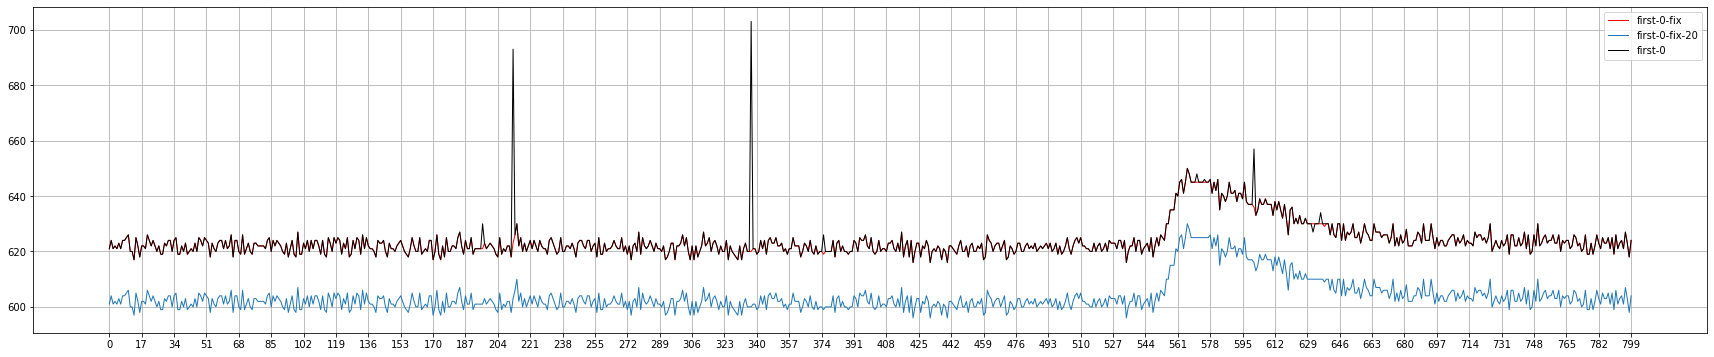

In [160]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30,6]

clipsize=800
fig= plt.figure()
ax=fig.add_subplot(1,1,1)

ax.set_xticks( np.arange(0, clipsize, 17))
# axis settings: URL https://stackoverflow.com/questions/24943991/change-grid-interval-and-specify-tick-labels-in-matplotlib


# find outliers
def reject_outliers(data, m=2):
  return data[abs(data- np.mean(data)) < m* np.std(data)]

def fix_outliers(data, m=3,span=3):
  ret = np.copy(data)
  outl = abs(ret- np.mean(ret)) > m* np.std(ret)
  for idx in range(len(ret)):
    if idx >span and (len(data) - idx > span):    # within 5 data points
      otherMean =  (np.sum(ret[idx-span: idx+span+1]) - ret[idx])/(span*2)
      otherMax = max(np.max(ret[idx-span:idx]), np.max(ret[idx+1:idx+3]))
      otherMin = min(np.min(ret[idx-span:idx]), np.min(ret[idx+1:idx+3]))

      otherRange = otherMax - otherMin
      
      if abs(ret[idx] - otherMean) > m* otherRange:
        print('idx=', idx, 'arr=', data[idx-span: idx+span+1], 'otherMean=', otherMean, 'otherMax', otherMax, 'otherMin', otherMin, 'otherRange=', otherRange, 'fix=', ret[idx],'->', otherMean)
        ret[idx] = otherMean
  return ret

print()
fixed = fix_outliers(sigAll[0,:clipsize])
#print(np.vstack((sigAll[0,:clipsize],fixed)).T) 

ax.plot(np.arange(clipsize), fixed, color='r', linewidth=1, label = 'first-0-fix')
ax.plot(np.arange(clipsize), fixed-20, linewidth=1, label = 'first-0-fix-20')

ax.plot(np.arange(clipsize), sigAll[0, :clipsize], color='k', linewidth=1, label = 'first-0')
#ax.plot(np.arange(clipsize), sigAll[0, -clipsize:], label = 'last-0')
#ax.plot(np.arange(clipsize), sigAll[1, :clipsize], label = 'first-1')
#ax.plot(np.arange(clipsize), sigAll[1, -clipsize:], label = 'last-1')
#ax.plot(np.arange(clipsize), sigAll[2, :clipsize], label = 'first-2')
#ax.plot(np.arange(clipsize), sigAll[2, -clipsize:], label = 'last-2')
ax.legend()
ax.grid()
plt.show()

In [ ]:
import numpy as np
def despike(yi, th=1.e-3):
  ''' Remove spike from array yi, the spike area is where the difference between  the neigboring points is higher than th.'''
  y = np.copy(yi) # use y = y1 if it is OK to modify input array
  n = len(y)
  x = np.arange(n)
  c = np.argmax(y)
  d = abs(np.diff(y))
  try:
    l = c - 1 - np.where(d[c-1::-1]<th)[0][0]
    r = c + np.where(d[c:]<th)[0][0] + 1
  except: # no spike, return unaltered array
    return y
  # for fit, use area twice wider then the spike
  if (r-l) <= 3:
    l -= 1
    r += 1
  s = int(round((r-l)/2.))
  lx = l - s
  rx = r + s
  # make a gap at spike area
  xgapped = np.concatenate((x[lx:l],x[r:rx]))
  ygapped = np.concatenate((y[lx:l],y[r:rx]))
  # quadratic fit of the gapped array
  z = np.polyfit(xgapped,ygapped,2)
  p = np.poly1d(z)
  y[l:r] = p(x[l:r])
  return y-20